In [4]:
import pandas as pd
import os
import sys
import xlwt
import matplotlib.pyplot as plt

if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
    
from os import listdir
from os.path import isfile, join

In [43]:
class EhShasBiPoprogat:
    
    def __init__(self):
        text_file = open("kick_names.txt", "r", encoding='utf-8')
        self.names = text_file.read().split("\n")
        text_file = open("SameAttacks.txt", "r", encoding='utf-8')
        
        data = text_file.read()
        data = StringIO(data)

        self.df_same = pd.read_csv(data, sep=" ")
        self.df_same = self.df_same.apply(lambda x: x.str.lower())
        
        
    def is_shit(self, s):
        arr = s.split('_')
        arr = [x for x in arr if x.isdigit()]
        if len(arr)==0:
            return True
        if s.startswith("Shadow_Agile_Helmet_3"):
            return True
        return arr[-1]=='1'
    
    def is_move(self, s):
        return not s in self.names
    
    def is_not_move(self, s):
        return s in self.names
    
    def drop_shit(self, df):
        df = df[df["source"].map(self.is_shit)]
        df = df[~df["source"].str.startswith("lying_kick")]
        df = df[~df["source"].str.startswith("throw_forward_active")]
        df = df[~df["source"].str.startswith("throw_simple")]
        df = df.append(pd.DataFrame(data = {"source" : "legs", "amount" : df[df["source"].map(self.is_not_move)]["amount"].sum()} , index=[0]))
        df = df[~df["source"].apply(lambda x: any([x.startswith(name) for name in self.names]))]
        df = df[~df["source"].str.endswith("long")]
        df = df[~df["source"].str.startswith("dual_swords_heavy_slash")]
        df = df[~df["source"].apply(lambda x: any([x.startswith(name) for name in self.df_same["AddName"]]))]
        df = df[df.amount != 0]
        return df
    
    def operate_file(self, f, padding, worksheet, byHero):
        if byHero:
            file = "actionsDmg/byHero/above3000" + "/" + f
        else:
            file = "actionsDmg/byMatchup/above3000" + "/" + f
        fp = open(file, encoding='utf-8')

        data = fp.read()
        data = StringIO(data)

        dftmp = pd.read_csv(data, sep=" ")
        dfb = dftmp.loc["[B]"].reset_index(inplace=True, drop=True)
        dfbs = dftmp.loc["[BS]"].reset_index(inplace=True, drop=True)
        dfs = dftmp.loc["[S]"].reset_index(inplace=True, drop=True)
        df = dftmp.loc[dftmp.index.difference(["[B]", "[BS]", "[S]"])]
        df['amount'] = df['source']
        df['source'] = df.index
        df.reset_index(inplace=True, drop=True)
        df = df[~df["amount"].str.startswith("animation]")]
        df = df.astype({"amount": float})

        dfbuf = df
        for index, row in df.iterrows():
            add = 0
            tmp = self.df_same[self.df_same['AddName'].str.fullmatch(row['source'])]["MainName"]
            if not tmp.empty:
                add = dfbuf[dfbuf["source"].str.fullmatch(row['source'])].amount.values[0]
                dfbuf.loc[df.source == tmp.astype("string").values[0], 'amount'] += add
            if not row['source'] in df_same.values:
                dfbuf.at[index, 'amount'] = df.groupby(df["source"].str.startswith(row['source'][:-1]))["amount"].sum()[True]
        
        lying_kick_sum = df.groupby(df["source"].str.startswith("lying_kick"))["amount"].sum()[True]
        throws = df[(df.source == "throw_forward_active") | (df.source == "throw_simple")]["amount"].sum()
        df = self.drop_shit(dfbuf)
        df = df.append(pd.DataFrame([['lying_kick',lying_kick_sum], ['throws', throws]],columns=['source','amount'])).reset_index(drop=True)
        df.sort_values(by=['amount'], inplace=True, ascending=False)
        df.reset_index(inplace=True, drop=True)
        df
        plt.barh(df["source"], df["amount"])
        plt.title(label=f)
        plt.savefig("trash/" + f[:-4] + '.png', bbox_inches="tight")
        worksheet.insert_image('C' + str(padding), 'trash/'+ f[:-4] + '.png')
        plt.show()
        

        
        

Bulwark.txt


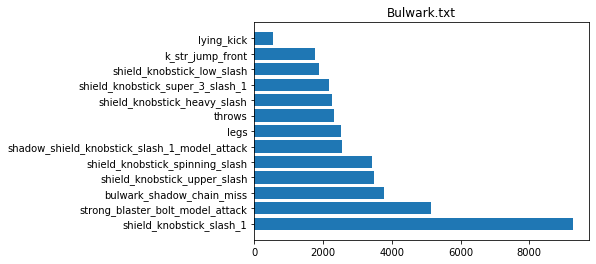

BulwarkBulwark.txt


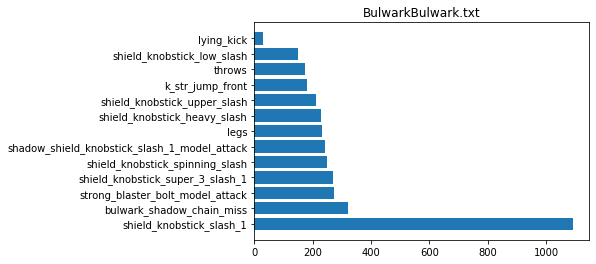

BulwarkEmperor.txt


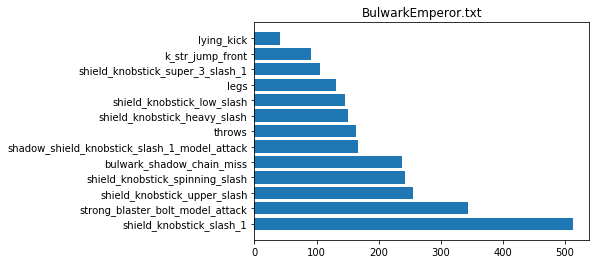

BulwarkFeldsher.txt


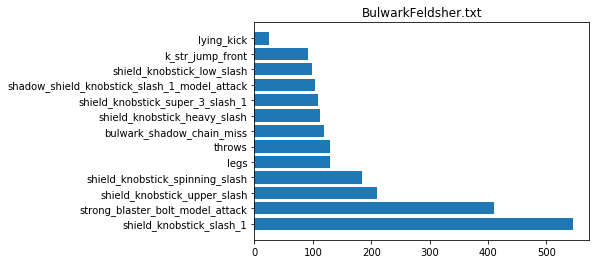

BulwarkFireguard.txt


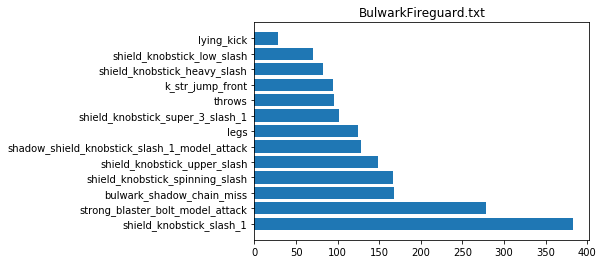

BulwarkHelga.txt


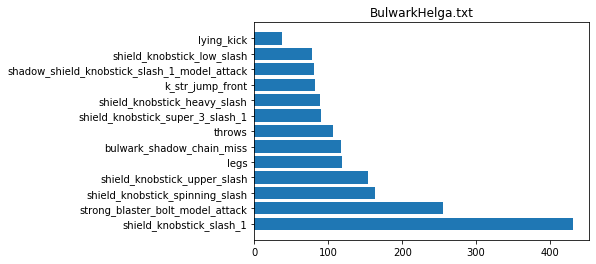

BulwarkHongJoo.txt


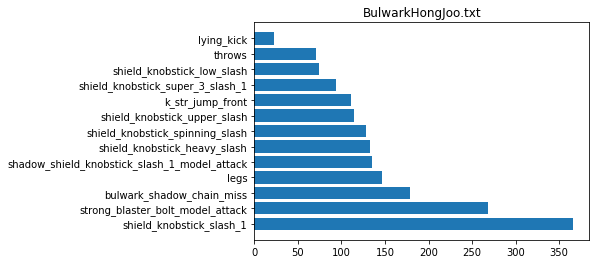

BulwarkIronclad.txt


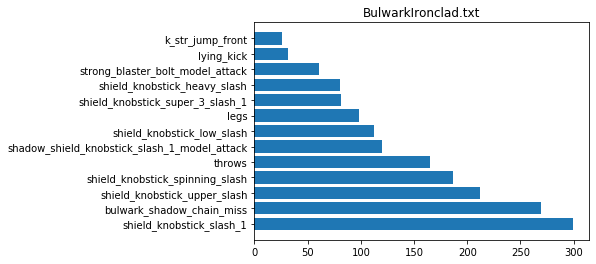

BulwarkJet.txt


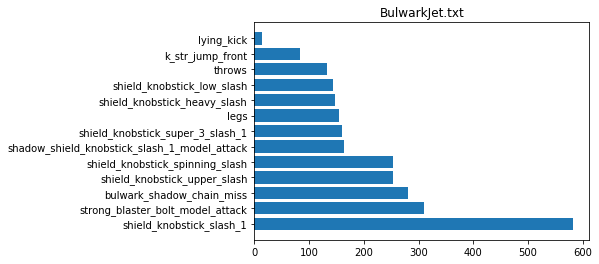

BulwarkKibo.txt


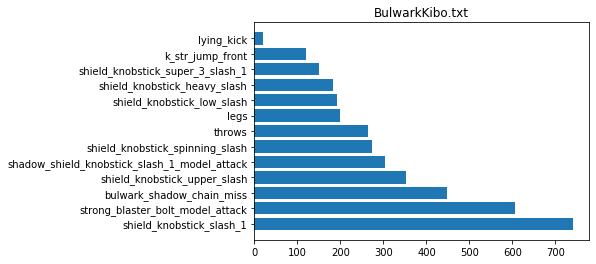

BulwarkLing.txt


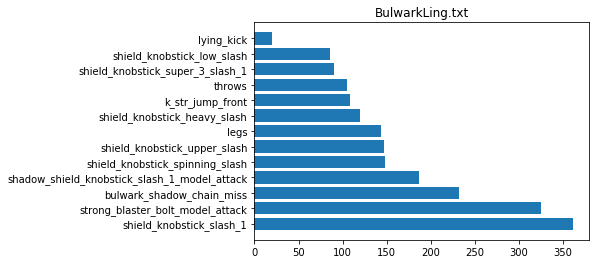

BulwarkLiquidator.txt


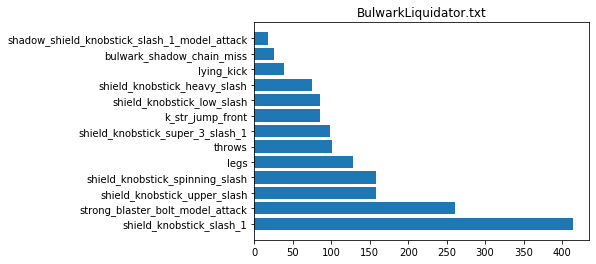

BulwarkLynx.txt


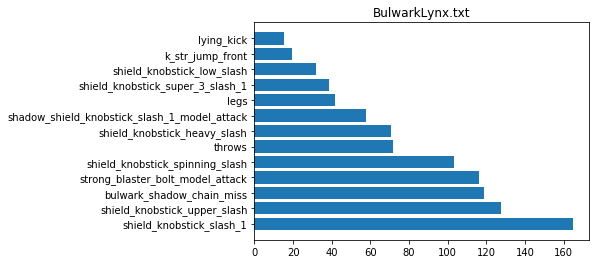

BulwarkMarcus.txt


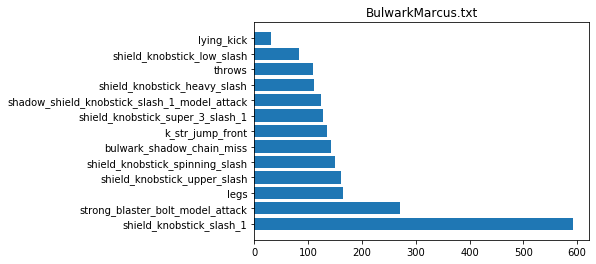

BulwarkMidnight.txt


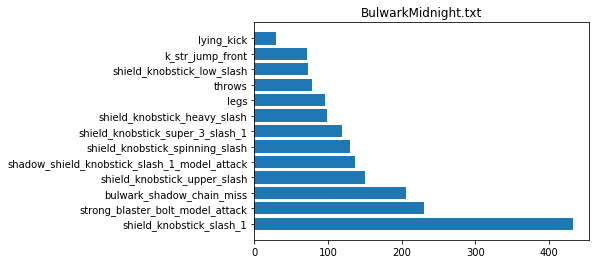

BulwarkMonk.txt


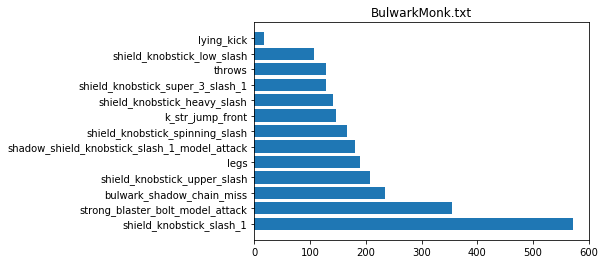

BulwarkMonkey_King.txt


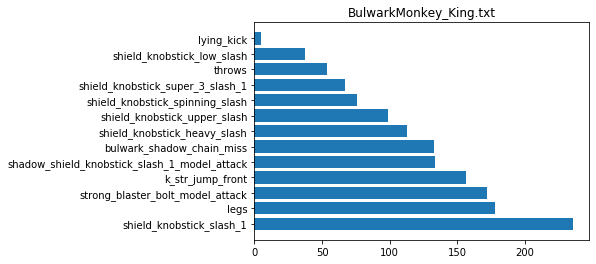

BulwarkSarge.txt


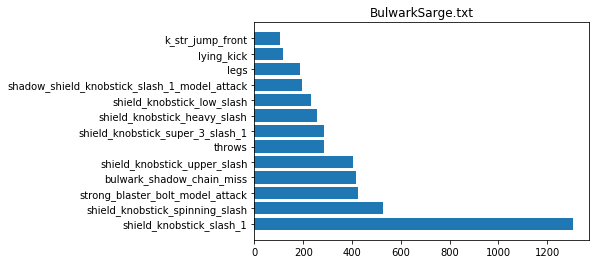

BulwarkYukka.txt


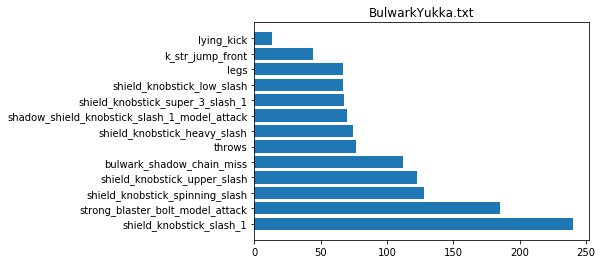

EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
FeldsherYukka.txt
FireguardBulwark.txt
FireguardEmperor.txt
FireguardFeldsher.txt
FireguardFireguard.txt
FireguardHelga.txt
FireguardHongJoo.txt
FireguardIronclad.txt
FireguardJet.txt
FireguardKibo.txt
FireguardLing.txt
FireguardLiquidator.txt
FireguardLynx.txt
FireguardMarcus.txt
FireguardMidnight.txt
FireguardMonk.txt
FireguardMonkey_

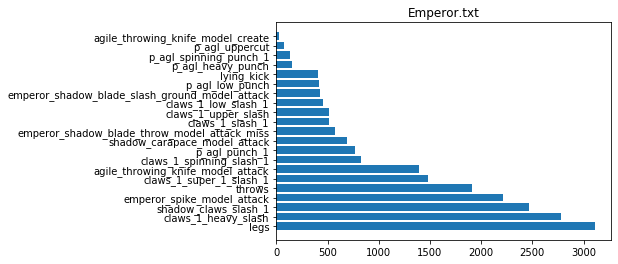

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt


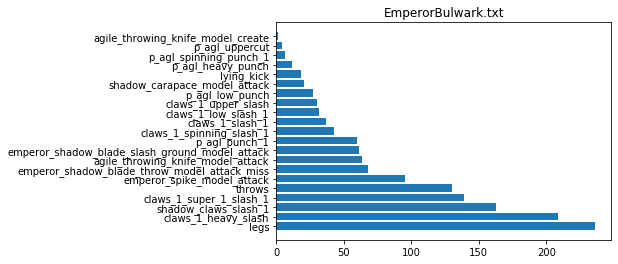

EmperorEmperor.txt


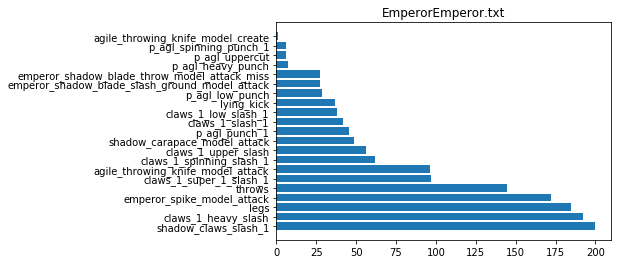

EmperorFeldsher.txt


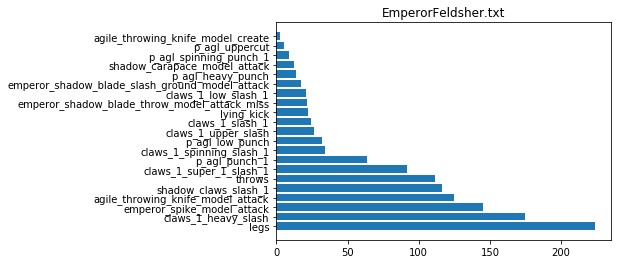

EmperorFireguard.txt


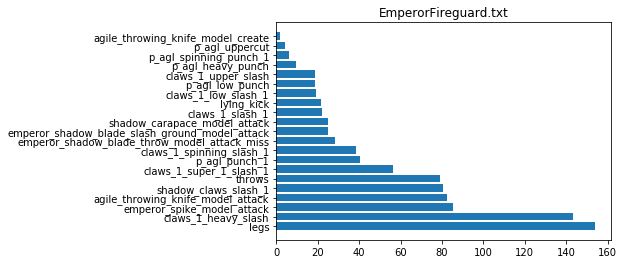

EmperorHelga.txt


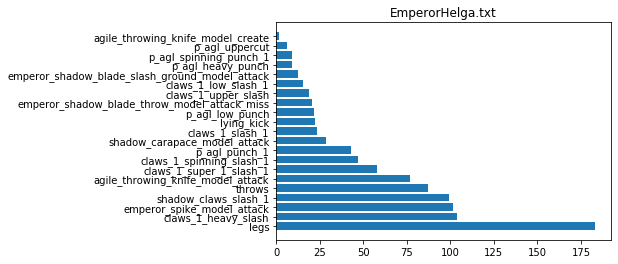

EmperorHongJoo.txt


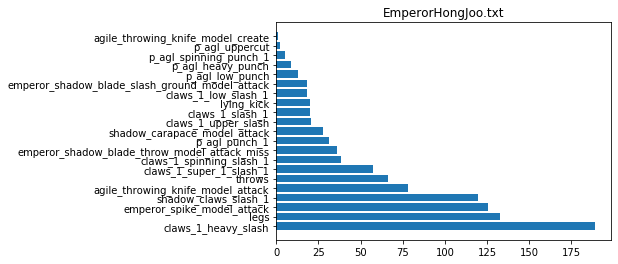

EmperorIronclad.txt


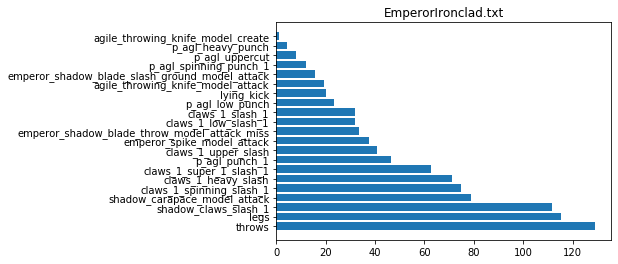

EmperorJet.txt


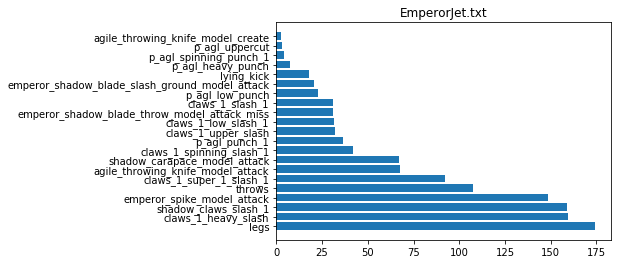

EmperorKibo.txt


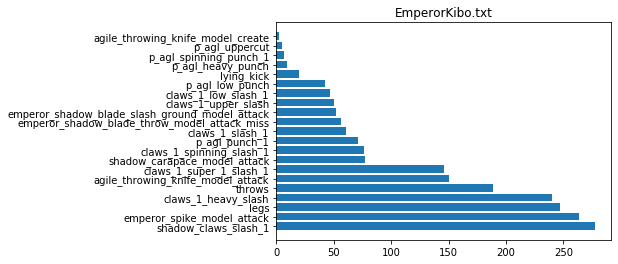

EmperorLing.txt


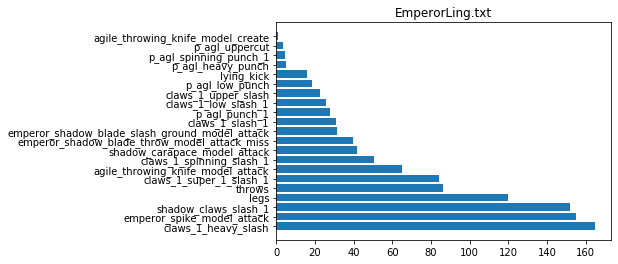

EmperorLiquidator.txt


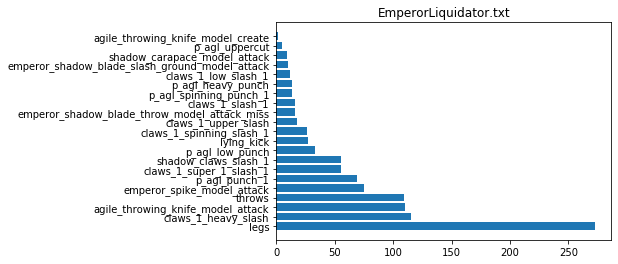

EmperorLynx.txt


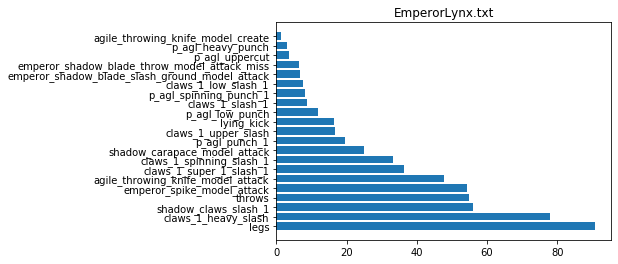

EmperorMarcus.txt


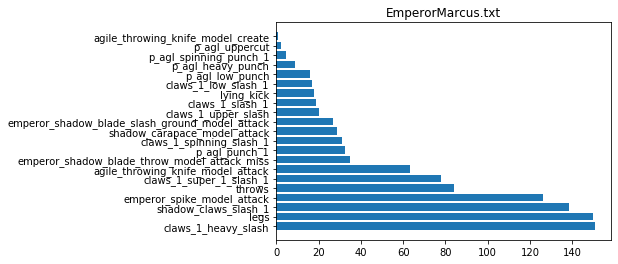

EmperorMidnight.txt


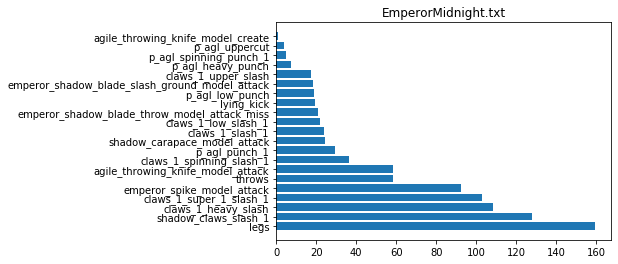

EmperorMonk.txt


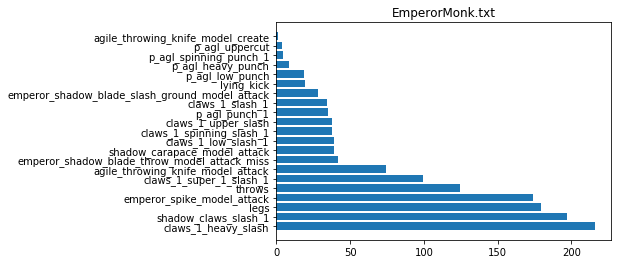

EmperorMonkey_King.txt


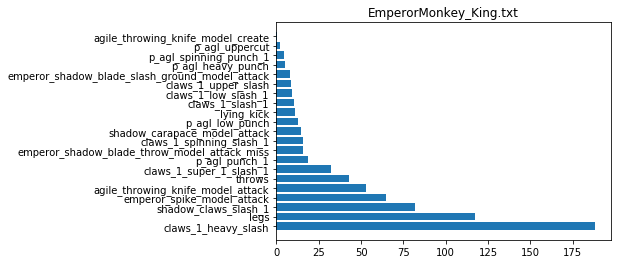

EmperorSarge.txt


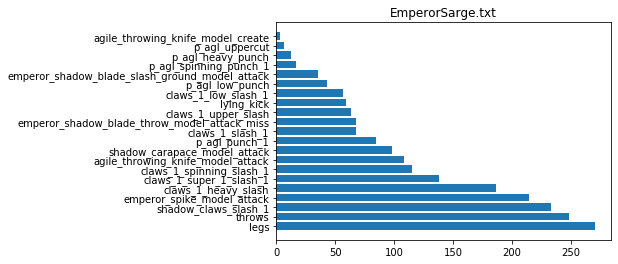

EmperorYukka.txt


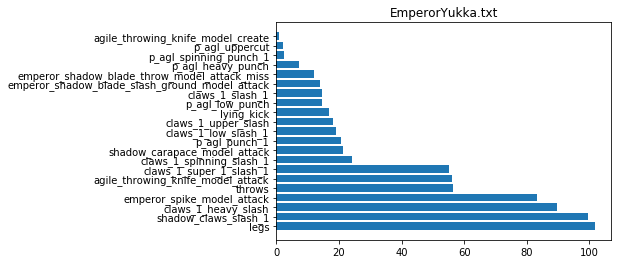

FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
FeldsherYukka.txt
FireguardBulwark.txt
FireguardEmperor.txt
FireguardFeldsher.txt
FireguardFireguard.txt
FireguardHelga.txt
FireguardHongJoo.txt
FireguardIronclad.txt
FireguardJet.txt
FireguardKibo.txt
FireguardLing.txt
FireguardLiquidator.txt
FireguardLynx.txt
FireguardMarcus.txt
FireguardMidnight.txt
FireguardMonk.txt
FireguardMonkey_King.txt
FireguardSarge.txt
FireguardYukka.txt
HelgaBulwark.txt
HelgaEmperor.txt
HelgaFeldsher.txt
HelgaFireguard.txt
HelgaHelga.txt
HelgaHongJoo.txt
HelgaIronclad.txt
HelgaJet.txt
HelgaKibo.txt
HelgaLing.txt
HelgaLiquidator.txt
HelgaLynx.txt
HelgaMarcus.txt
HelgaMidnight.txt
HelgaMonk.txt
HelgaMonkey_King.txt
HelgaSarge.txt
Helg

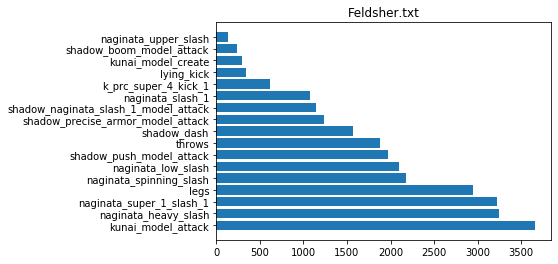

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt


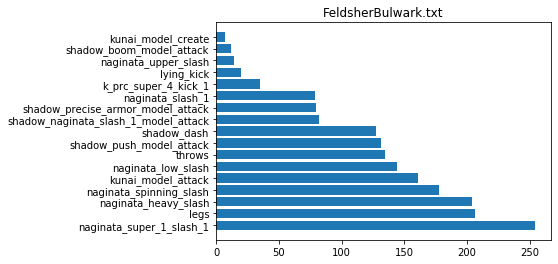

FeldsherEmperor.txt


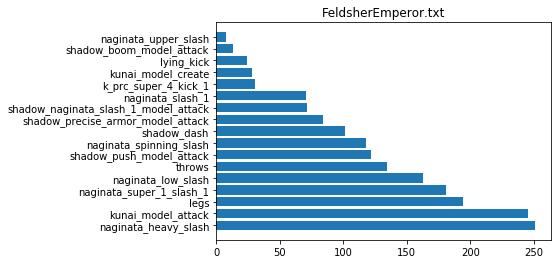

FeldsherFeldsher.txt


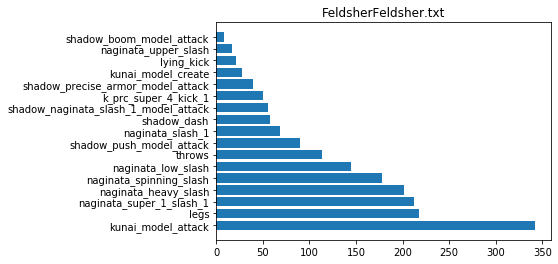

FeldsherFireguard.txt


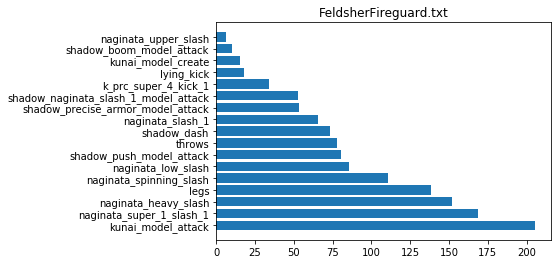

FeldsherHelga.txt


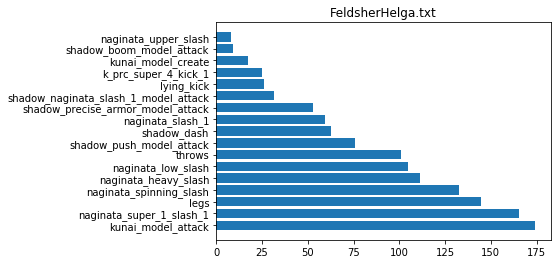

FeldsherHongJoo.txt


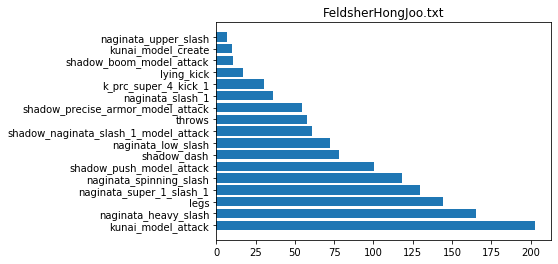

FeldsherIronclad.txt


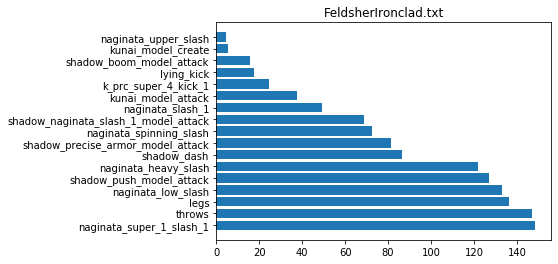

FeldsherJet.txt


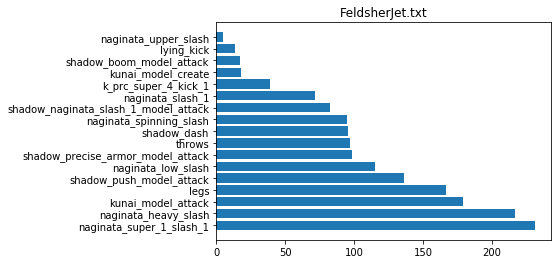

FeldsherKibo.txt


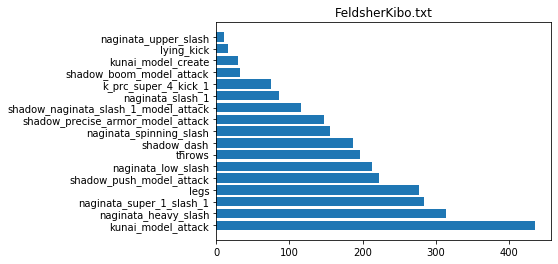

FeldsherLing.txt


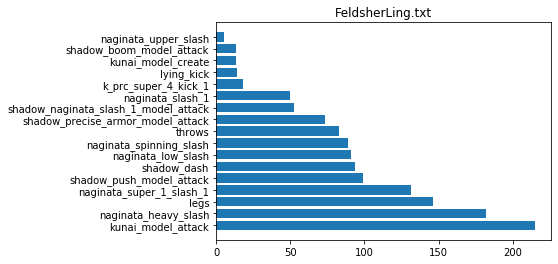

FeldsherLiquidator.txt


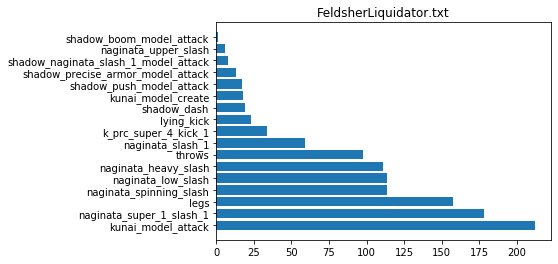

FeldsherLynx.txt


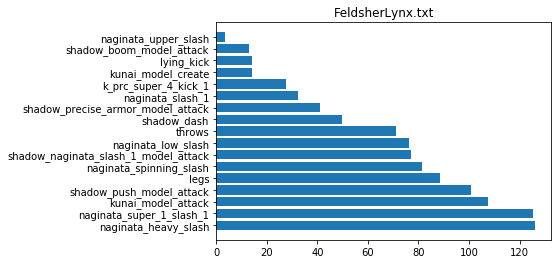

FeldsherMarcus.txt


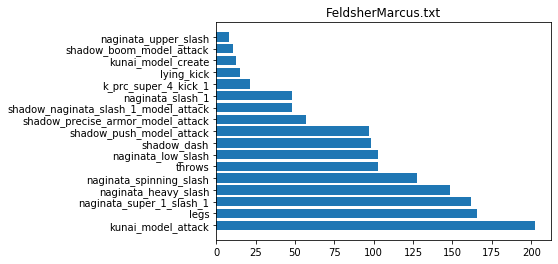

FeldsherMidnight.txt


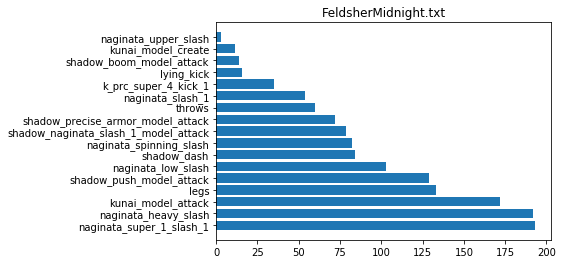

FeldsherMonk.txt


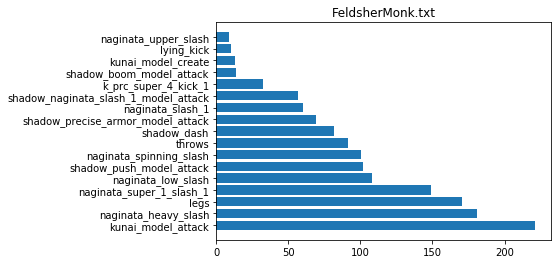

FeldsherMonkey_King.txt


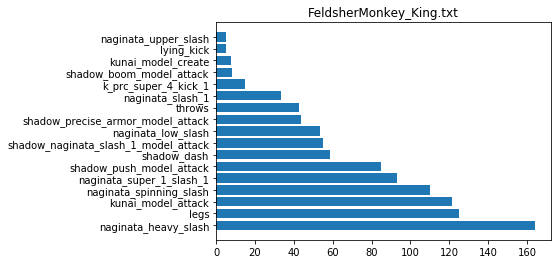

FeldsherSarge.txt


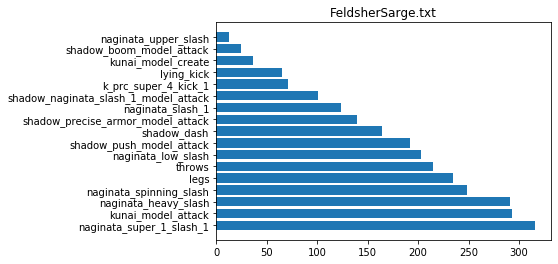

FeldsherYukka.txt


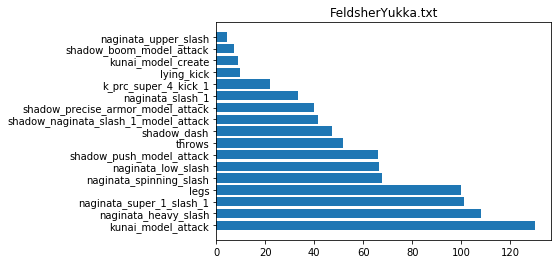

FireguardBulwark.txt
FireguardEmperor.txt
FireguardFeldsher.txt
FireguardFireguard.txt
FireguardHelga.txt
FireguardHongJoo.txt
FireguardIronclad.txt
FireguardJet.txt
FireguardKibo.txt
FireguardLing.txt
FireguardLiquidator.txt
FireguardLynx.txt
FireguardMarcus.txt
FireguardMidnight.txt
FireguardMonk.txt
FireguardMonkey_King.txt
FireguardSarge.txt
FireguardYukka.txt
HelgaBulwark.txt
HelgaEmperor.txt
HelgaFeldsher.txt
HelgaFireguard.txt
HelgaHelga.txt
HelgaHongJoo.txt
HelgaIronclad.txt
HelgaJet.txt
HelgaKibo.txt
HelgaLing.txt
HelgaLiquidator.txt
HelgaLynx.txt
HelgaMarcus.txt
HelgaMidnight.txt
HelgaMonk.txt
HelgaMonkey_King.txt
HelgaSarge.txt
HelgaYukka.txt
HongJooBulwark.txt
HongJooEmperor.txt
HongJooFeldsher.txt
HongJooFireguard.txt
HongJooHelga.txt
HongJooHongJoo.txt
HongJooIronclad.txt
HongJooJet.txt
HongJooKibo.txt
HongJooLing.txt
HongJooLiquidator.txt
HongJooLynx.txt
HongJooMarcus.txt
HongJooMidnight.txt
HongJooMonk.txt
HongJooMonkey_King.txt
HongJooSarge.txt
HongJooYukka.txt
Ironcla

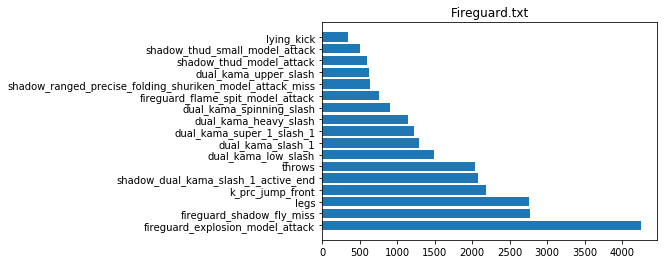

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

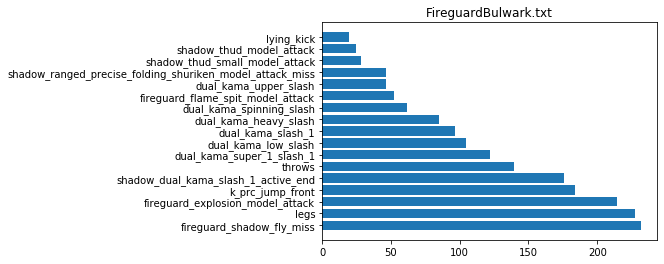

FireguardEmperor.txt


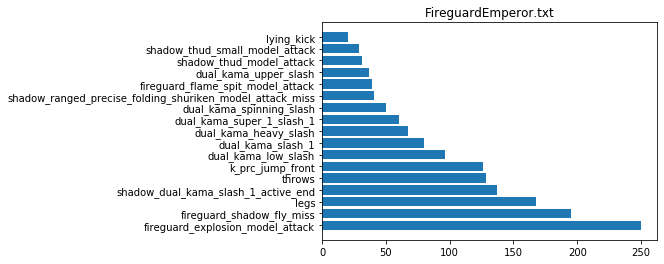

FireguardFeldsher.txt


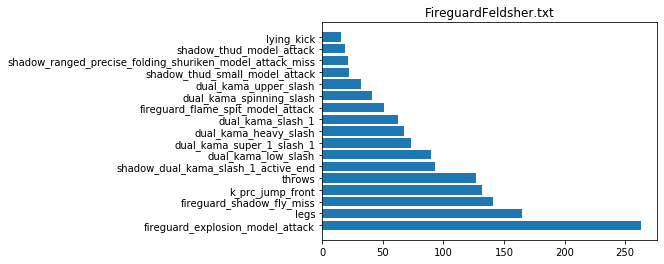

FireguardFireguard.txt


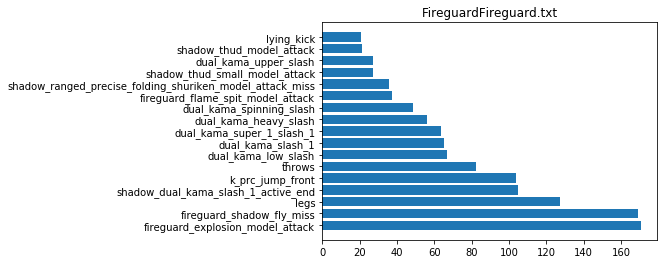

FireguardHelga.txt


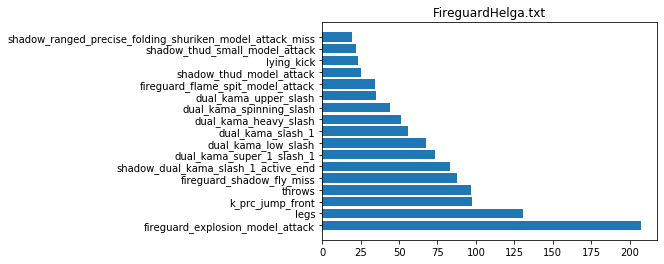

FireguardHongJoo.txt


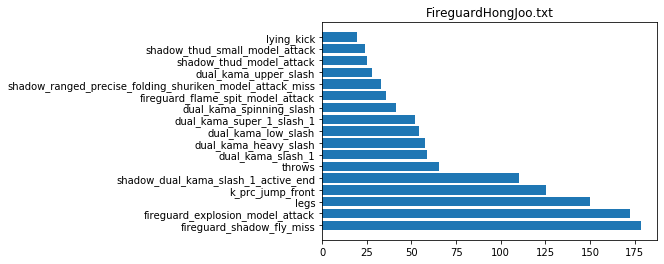

FireguardIronclad.txt


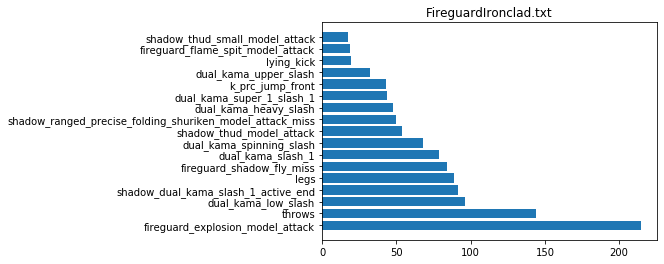

FireguardJet.txt


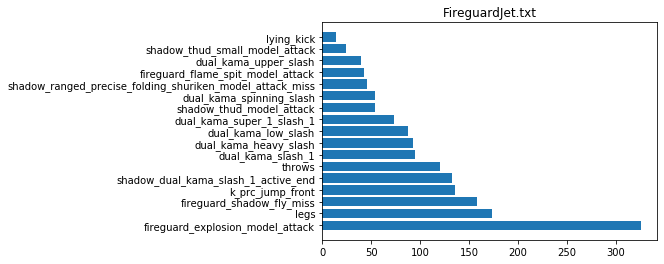

FireguardKibo.txt


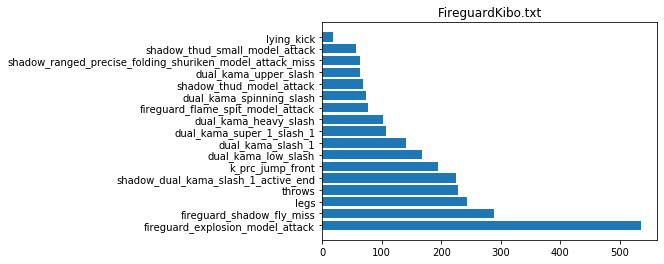

FireguardLing.txt


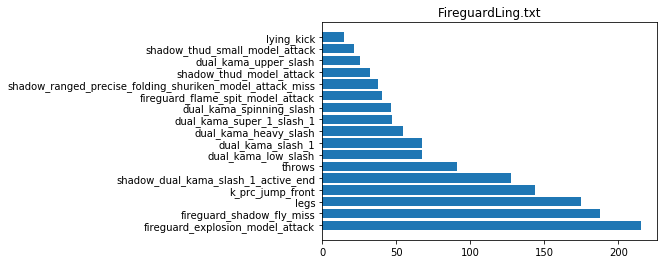

FireguardLiquidator.txt


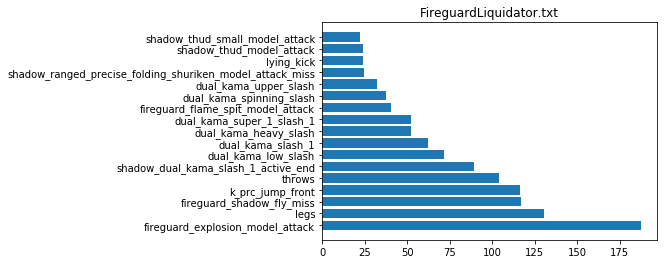

FireguardLynx.txt


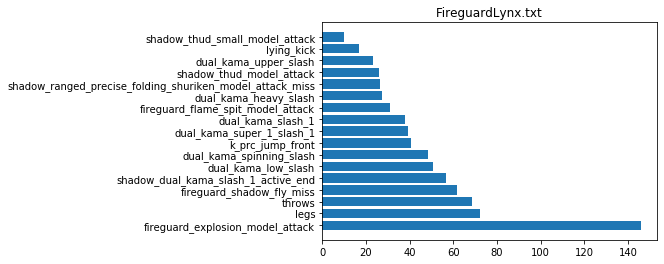

FireguardMarcus.txt


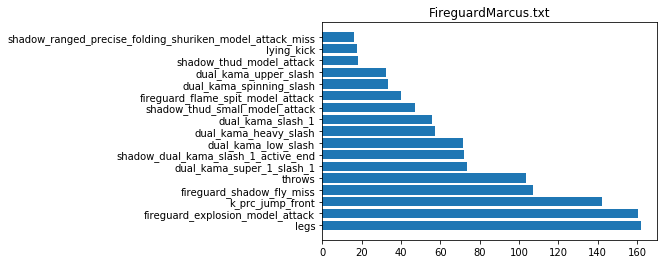

FireguardMidnight.txt


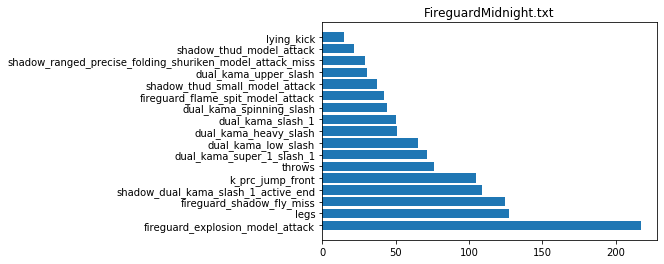

FireguardMonk.txt


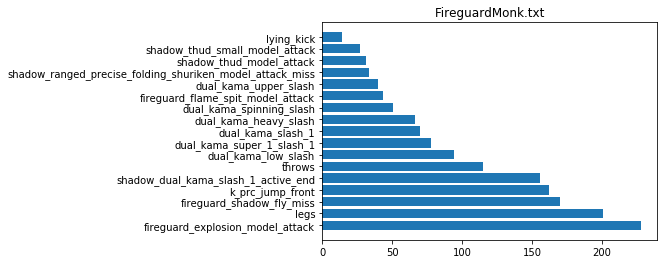

FireguardMonkey_King.txt


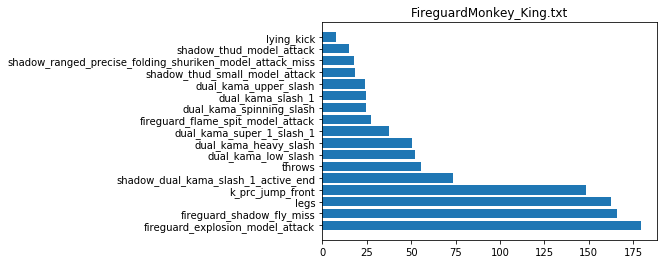

FireguardSarge.txt


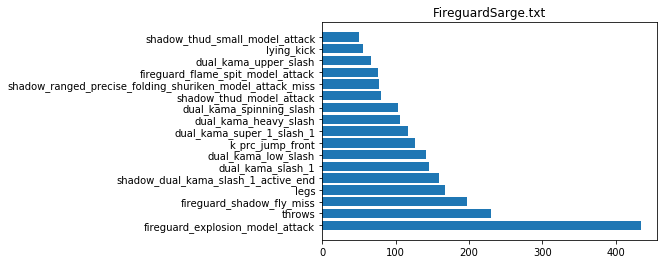

FireguardYukka.txt


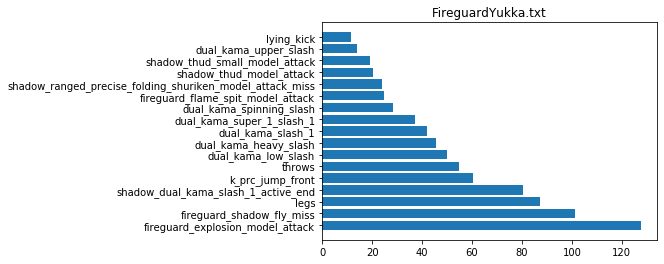

HelgaBulwark.txt
HelgaEmperor.txt
HelgaFeldsher.txt
HelgaFireguard.txt
HelgaHelga.txt
HelgaHongJoo.txt
HelgaIronclad.txt
HelgaJet.txt
HelgaKibo.txt
HelgaLing.txt
HelgaLiquidator.txt
HelgaLynx.txt
HelgaMarcus.txt
HelgaMidnight.txt
HelgaMonk.txt
HelgaMonkey_King.txt
HelgaSarge.txt
HelgaYukka.txt
HongJooBulwark.txt
HongJooEmperor.txt
HongJooFeldsher.txt
HongJooFireguard.txt
HongJooHelga.txt
HongJooHongJoo.txt
HongJooIronclad.txt
HongJooJet.txt
HongJooKibo.txt
HongJooLing.txt
HongJooLiquidator.txt
HongJooLynx.txt
HongJooMarcus.txt
HongJooMidnight.txt
HongJooMonk.txt
HongJooMonkey_King.txt
HongJooSarge.txt
HongJooYukka.txt
IroncladBulwark.txt
IroncladEmperor.txt
IroncladFeldsher.txt
IroncladFireguard.txt
IroncladHelga.txt
IroncladHongJoo.txt
IroncladIronclad.txt
IroncladJet.txt
IroncladKibo.txt
IroncladLing.txt
IroncladLiquidator.txt
IroncladLynx.txt
IroncladMarcus.txt
IroncladMidnight.txt
IroncladMonk.txt
IroncladMonkey_King.txt
IroncladSarge.txt
IroncladYukka.txt
JetBulwark.txt
JetEmperor

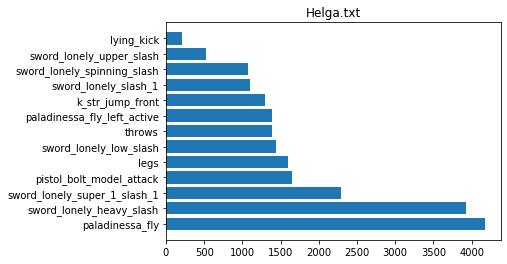

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

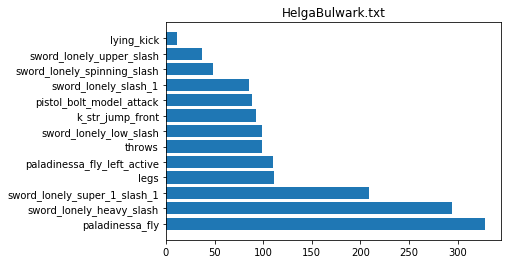

HelgaEmperor.txt


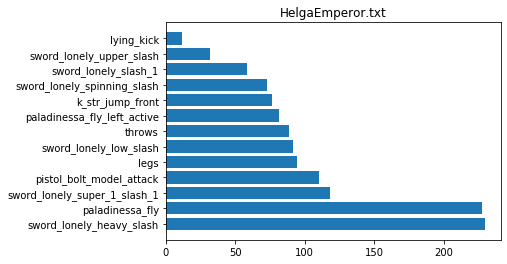

HelgaFeldsher.txt


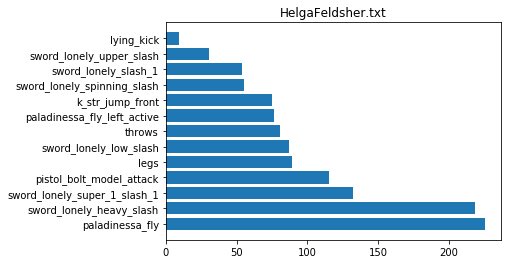

HelgaFireguard.txt


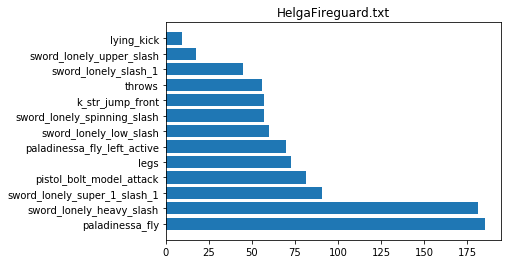

HelgaHelga.txt


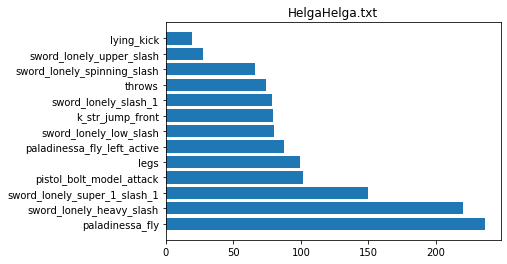

HelgaHongJoo.txt


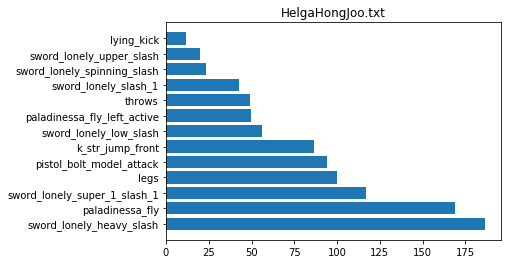

HelgaIronclad.txt


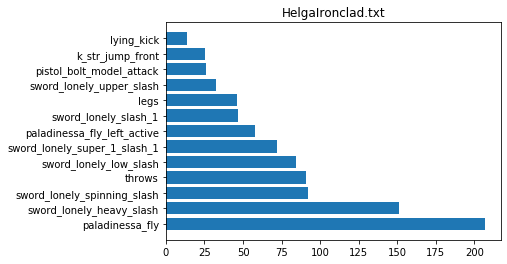

HelgaJet.txt


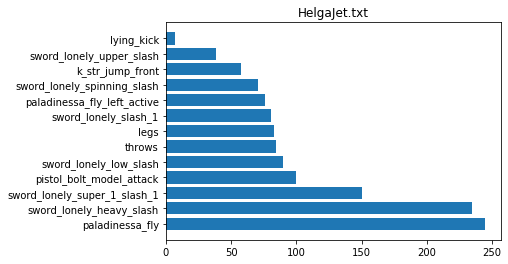

HelgaKibo.txt


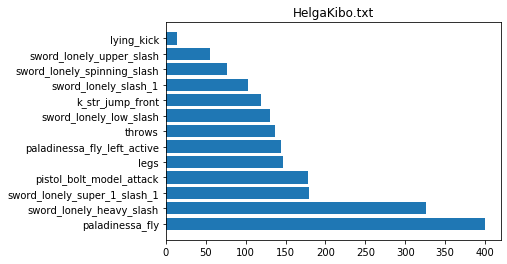

HelgaLing.txt


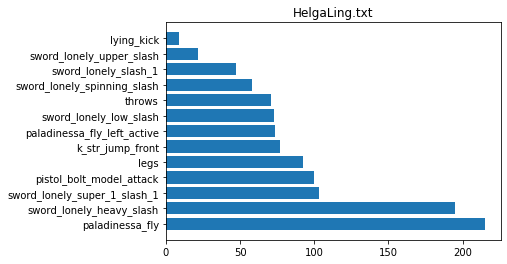

HelgaLiquidator.txt


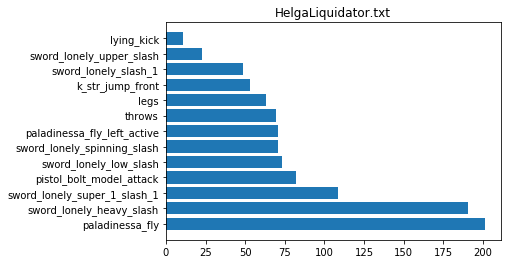

HelgaLynx.txt


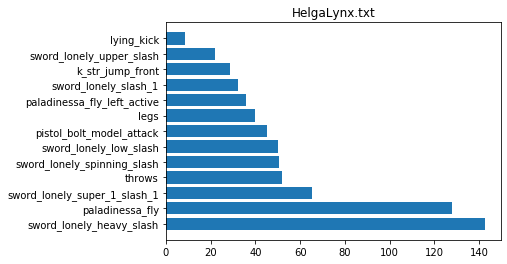

HelgaMarcus.txt


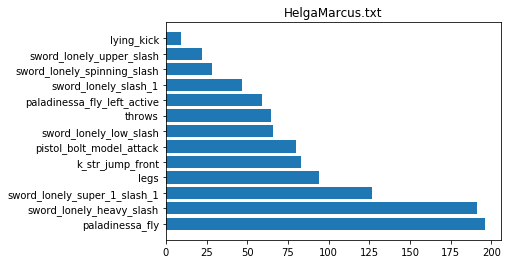

HelgaMidnight.txt


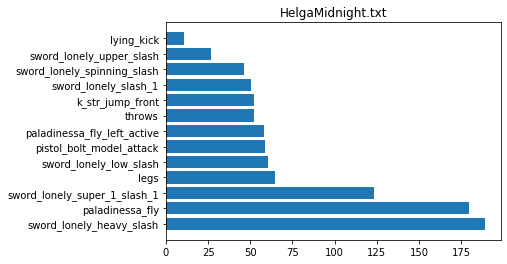

HelgaMonk.txt


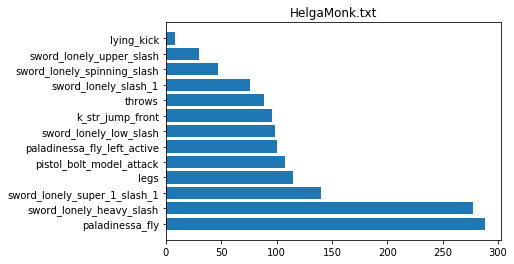

HelgaMonkey_King.txt


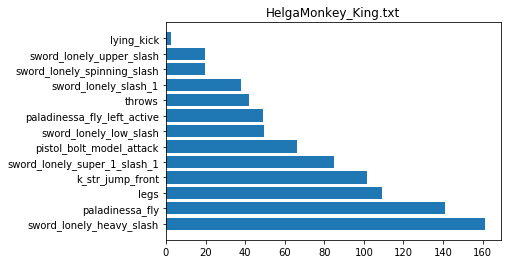

HelgaSarge.txt


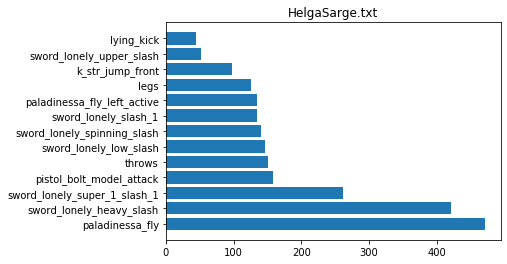

HelgaYukka.txt


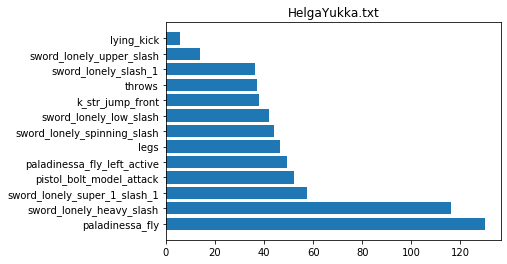

HongJooBulwark.txt
HongJooEmperor.txt
HongJooFeldsher.txt
HongJooFireguard.txt
HongJooHelga.txt
HongJooHongJoo.txt
HongJooIronclad.txt
HongJooJet.txt
HongJooKibo.txt
HongJooLing.txt
HongJooLiquidator.txt
HongJooLynx.txt
HongJooMarcus.txt
HongJooMidnight.txt
HongJooMonk.txt
HongJooMonkey_King.txt
HongJooSarge.txt
HongJooYukka.txt
IroncladBulwark.txt
IroncladEmperor.txt
IroncladFeldsher.txt
IroncladFireguard.txt
IroncladHelga.txt
IroncladHongJoo.txt
IroncladIronclad.txt
IroncladJet.txt
IroncladKibo.txt
IroncladLing.txt
IroncladLiquidator.txt
IroncladLynx.txt
IroncladMarcus.txt
IroncladMidnight.txt
IroncladMonk.txt
IroncladMonkey_King.txt
IroncladSarge.txt
IroncladYukka.txt
JetBulwark.txt
JetEmperor.txt
JetFeldsher.txt
JetFireguard.txt
JetHelga.txt
JetHongJoo.txt
JetIronclad.txt
JetJet.txt
JetKibo.txt
JetLing.txt
JetLiquidator.txt
JetLynx.txt
JetMarcus.txt
JetMidnight.txt
JetMonk.txt
JetMonkey_King.txt
JetSarge.txt
JetYukka.txt
KiboBulwark.txt
KiboEmperor.txt
KiboFeldsher.txt
KiboFireguar

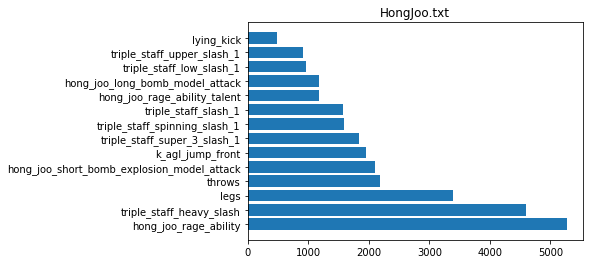

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

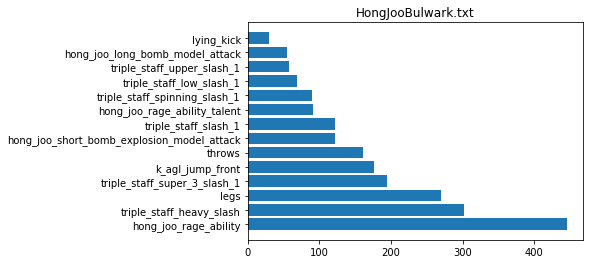

HongJooEmperor.txt


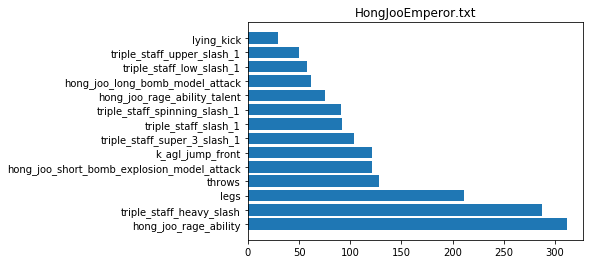

HongJooFeldsher.txt


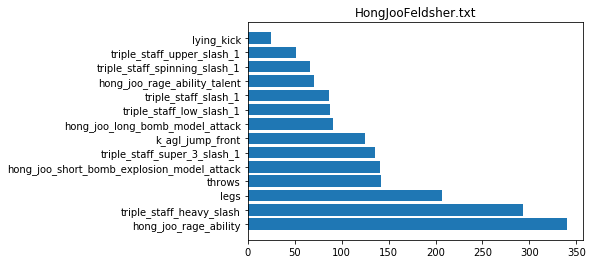

HongJooFireguard.txt


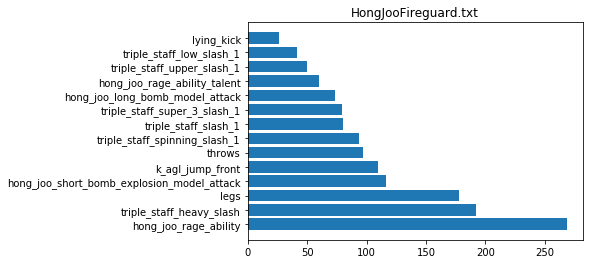

HongJooHelga.txt


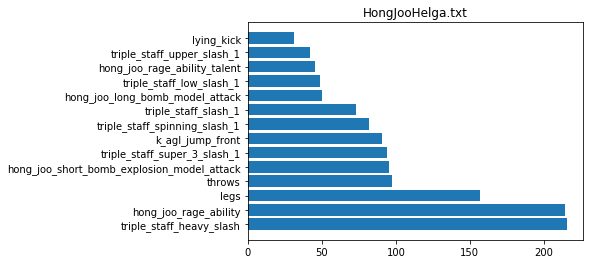

HongJooHongJoo.txt


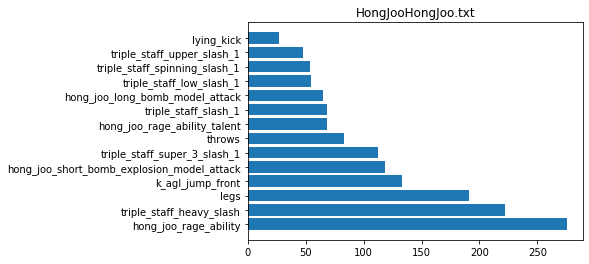

HongJooIronclad.txt


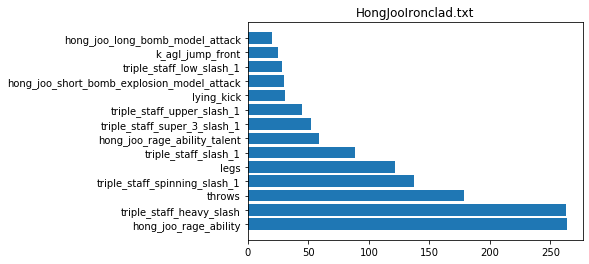

HongJooJet.txt


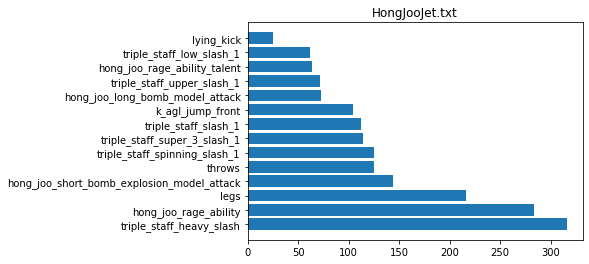

HongJooKibo.txt


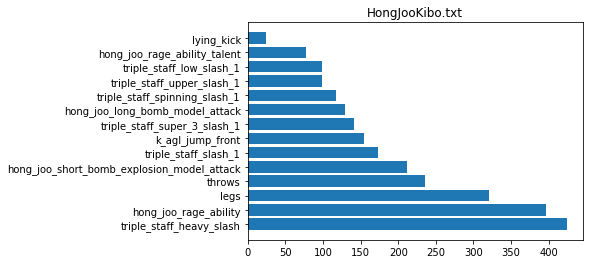

HongJooLing.txt


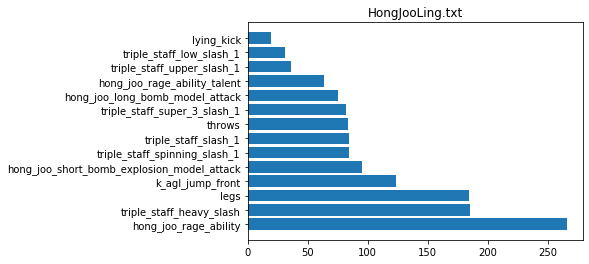

HongJooLiquidator.txt


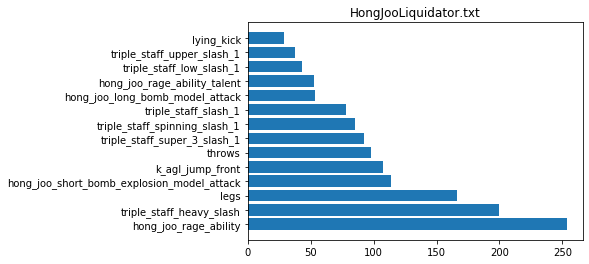

HongJooLynx.txt


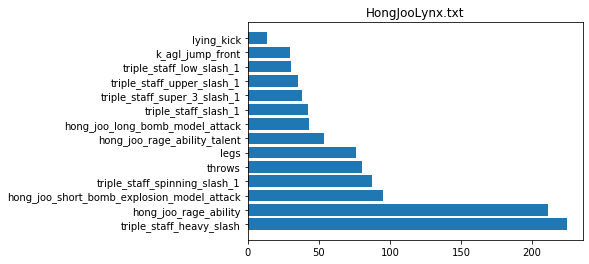

HongJooMarcus.txt


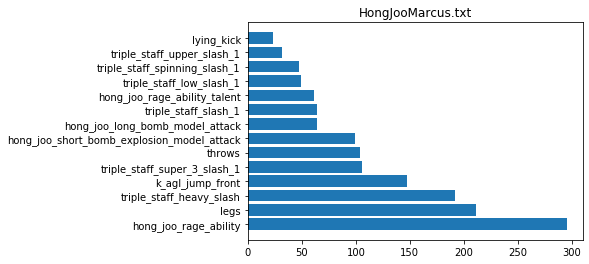

HongJooMidnight.txt


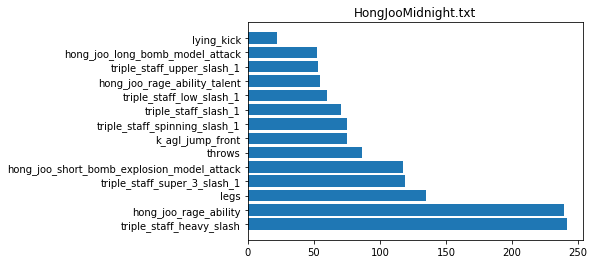

HongJooMonk.txt


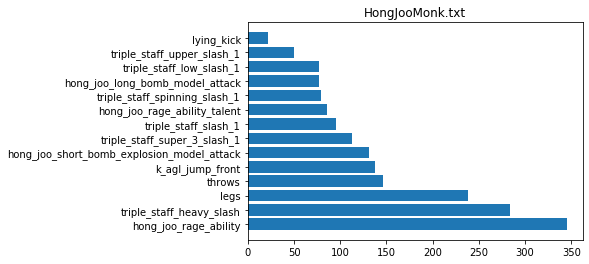

HongJooMonkey_King.txt


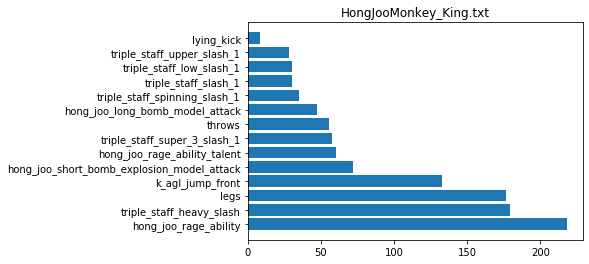

HongJooSarge.txt


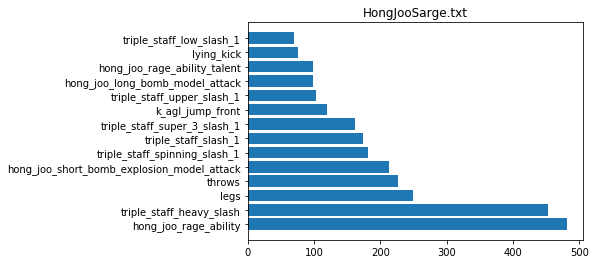

HongJooYukka.txt


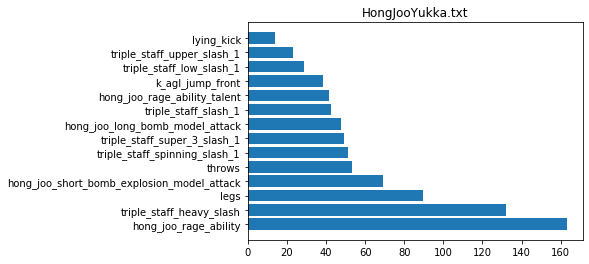

IroncladBulwark.txt
IroncladEmperor.txt
IroncladFeldsher.txt
IroncladFireguard.txt
IroncladHelga.txt
IroncladHongJoo.txt
IroncladIronclad.txt
IroncladJet.txt
IroncladKibo.txt
IroncladLing.txt
IroncladLiquidator.txt
IroncladLynx.txt
IroncladMarcus.txt
IroncladMidnight.txt
IroncladMonk.txt
IroncladMonkey_King.txt
IroncladSarge.txt
IroncladYukka.txt
JetBulwark.txt
JetEmperor.txt
JetFeldsher.txt
JetFireguard.txt
JetHelga.txt
JetHongJoo.txt
JetIronclad.txt
JetJet.txt
JetKibo.txt
JetLing.txt
JetLiquidator.txt
JetLynx.txt
JetMarcus.txt
JetMidnight.txt
JetMonk.txt
JetMonkey_King.txt
JetSarge.txt
JetYukka.txt
KiboBulwark.txt
KiboEmperor.txt
KiboFeldsher.txt
KiboFireguard.txt
KiboHelga.txt
KiboHongJoo.txt
KiboIronclad.txt
KiboJet.txt
KiboKibo.txt
KiboLing.txt
KiboLiquidator.txt
KiboLynx.txt
KiboMarcus.txt
KiboMidnight.txt
KiboMonk.txt
KiboMonkey_King.txt
KiboSarge.txt
KiboYukka.txt
LingBulwark.txt
LingEmperor.txt
LingFeldsher.txt
LingFireguard.txt
LingHelga.txt
LingHongJoo.txt
LingIronclad.txt
L

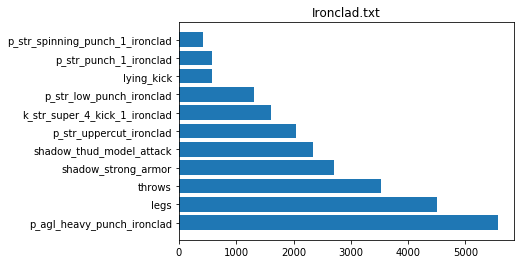

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

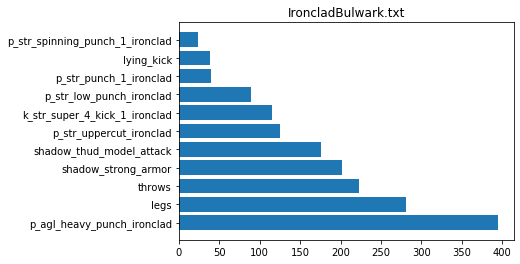

IroncladEmperor.txt


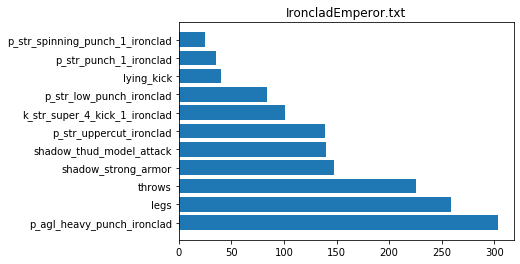

IroncladFeldsher.txt


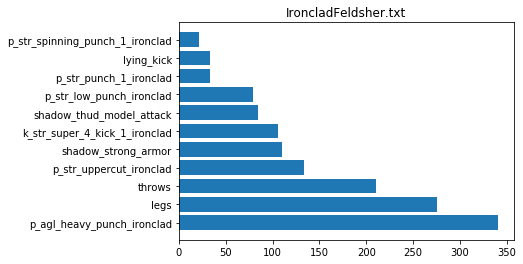

IroncladFireguard.txt


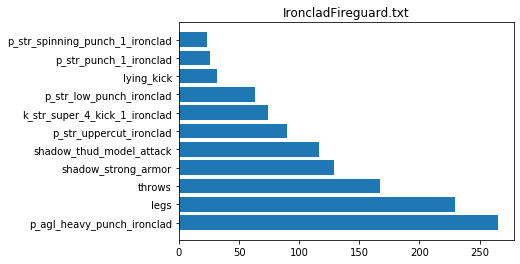

IroncladHelga.txt


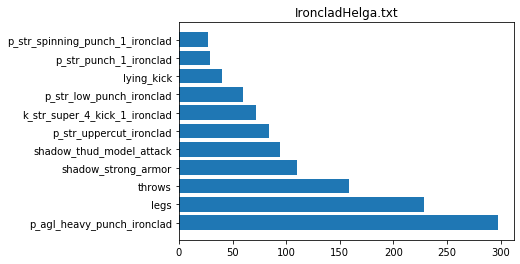

IroncladHongJoo.txt


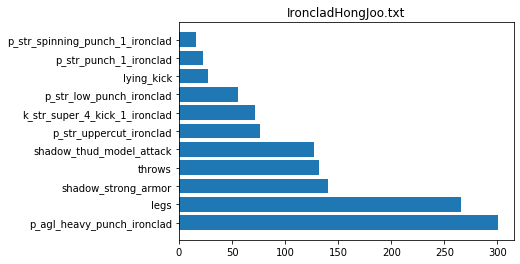

IroncladIronclad.txt


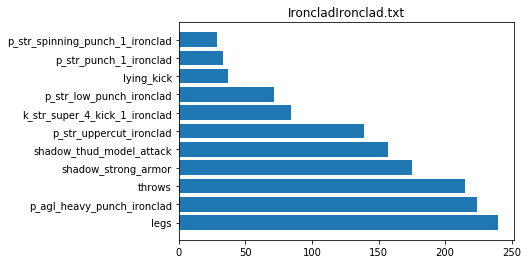

IroncladJet.txt


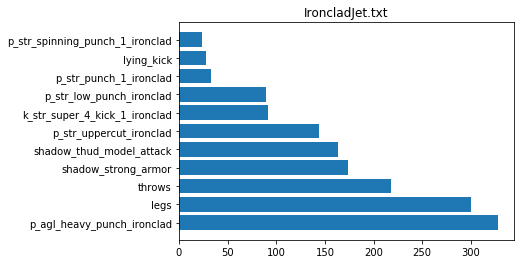

IroncladKibo.txt


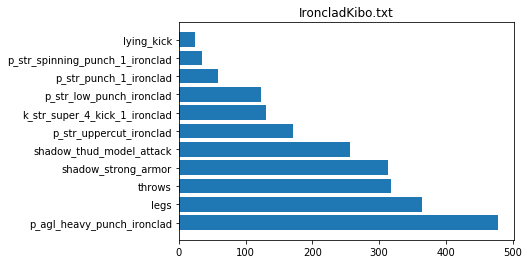

IroncladLing.txt


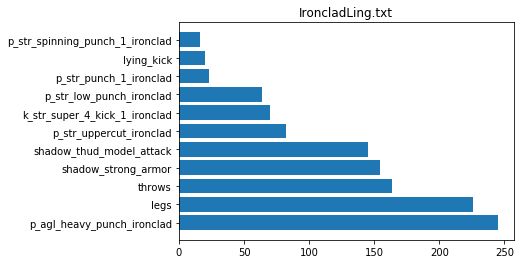

IroncladLiquidator.txt


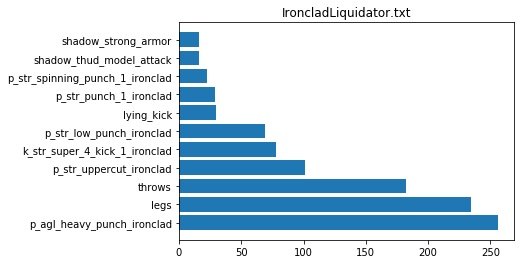

IroncladLynx.txt


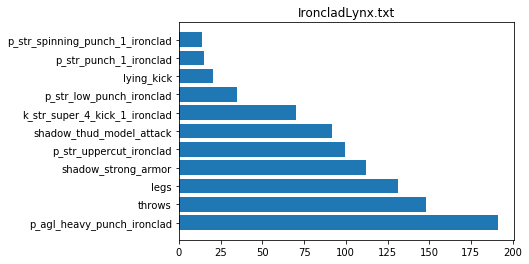

IroncladMarcus.txt


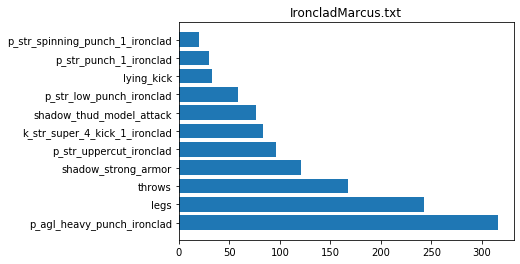

IroncladMidnight.txt


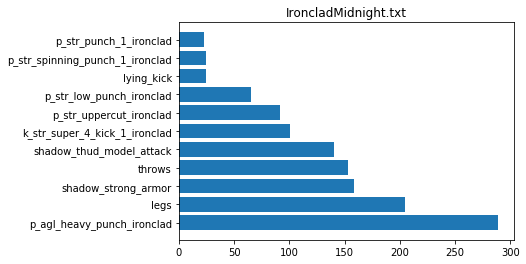

IroncladMonk.txt


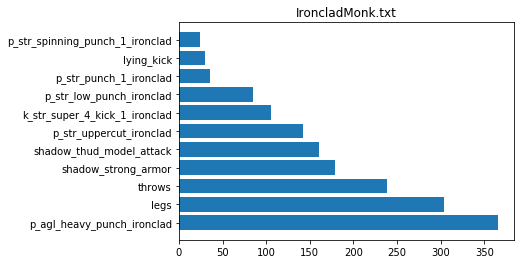

IroncladMonkey_King.txt


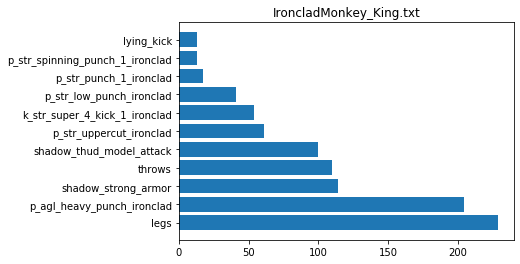

IroncladSarge.txt


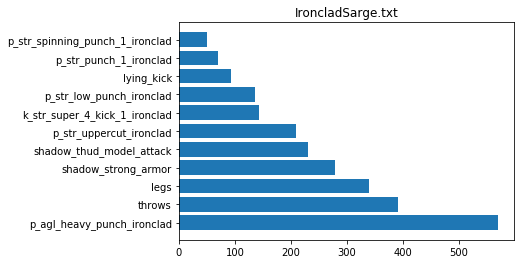

IroncladYukka.txt


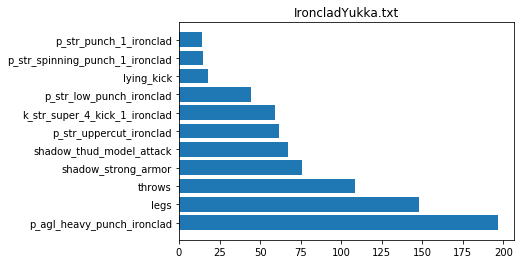

JetBulwark.txt
JetEmperor.txt
JetFeldsher.txt
JetFireguard.txt
JetHelga.txt
JetHongJoo.txt
JetIronclad.txt
JetJet.txt
JetKibo.txt
JetLing.txt
JetLiquidator.txt
JetLynx.txt
JetMarcus.txt
JetMidnight.txt
JetMonk.txt
JetMonkey_King.txt
JetSarge.txt
JetYukka.txt
KiboBulwark.txt
KiboEmperor.txt
KiboFeldsher.txt
KiboFireguard.txt
KiboHelga.txt
KiboHongJoo.txt
KiboIronclad.txt
KiboJet.txt
KiboKibo.txt
KiboLing.txt
KiboLiquidator.txt
KiboLynx.txt
KiboMarcus.txt
KiboMidnight.txt
KiboMonk.txt
KiboMonkey_King.txt
KiboSarge.txt
KiboYukka.txt
LingBulwark.txt
LingEmperor.txt
LingFeldsher.txt
LingFireguard.txt
LingHelga.txt
LingHongJoo.txt
LingIronclad.txt
LingJet.txt
LingKibo.txt
LingLing.txt
LingLiquidator.txt
LingLynx.txt
LingMarcus.txt
LingMidnight.txt
LingMonk.txt
LingMonkey_King.txt
LingSarge.txt
LingYukka.txt
LiquidatorBulwark.txt
LiquidatorEmperor.txt
LiquidatorFeldsher.txt
LiquidatorFireguard.txt
LiquidatorHelga.txt
LiquidatorHongJoo.txt
LiquidatorIronclad.txt
LiquidatorJet.txt
LiquidatorKib

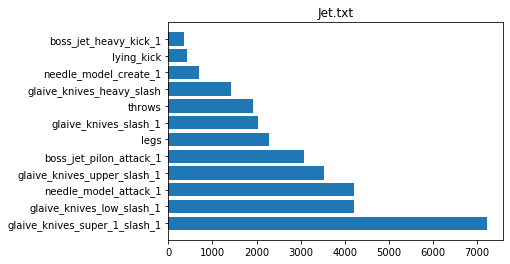

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

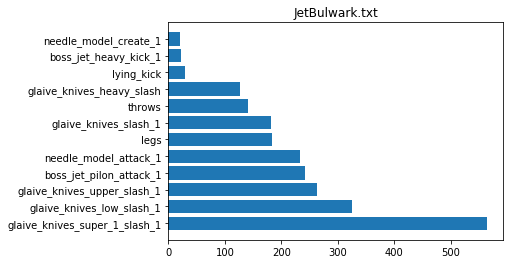

JetEmperor.txt


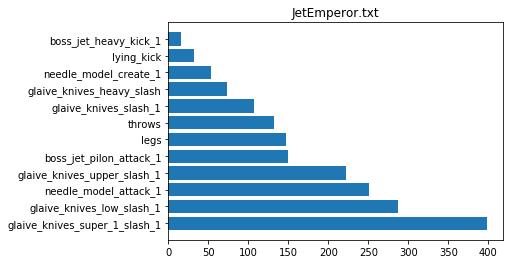

JetFeldsher.txt


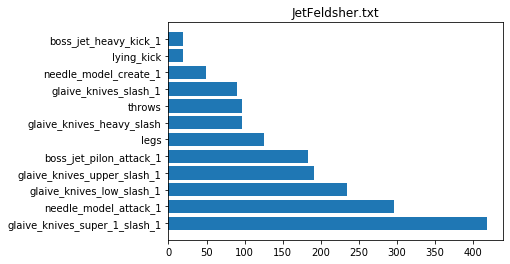

JetFireguard.txt


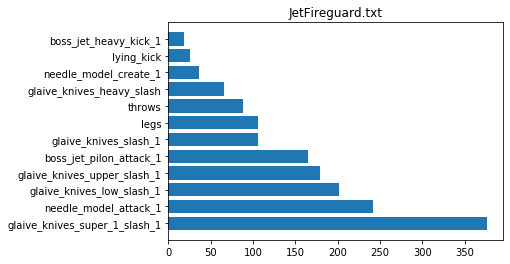

JetHelga.txt


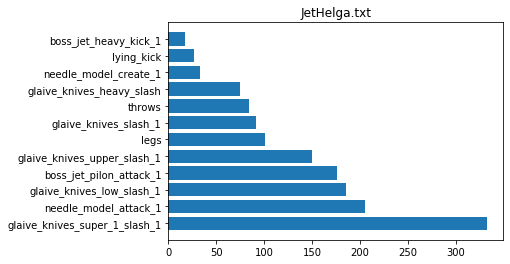

JetHongJoo.txt


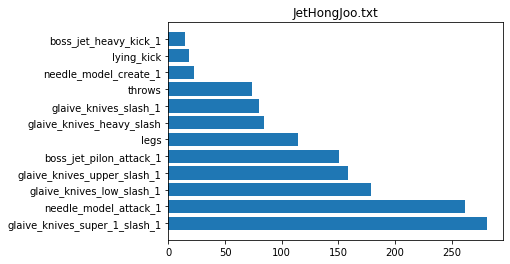

JetIronclad.txt


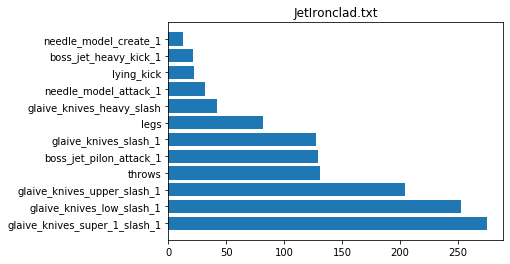

JetJet.txt


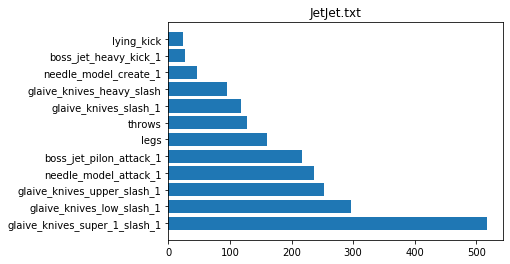

JetKibo.txt


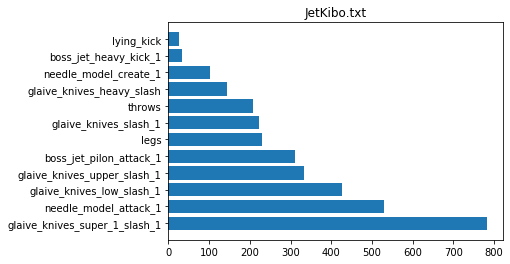

JetLing.txt


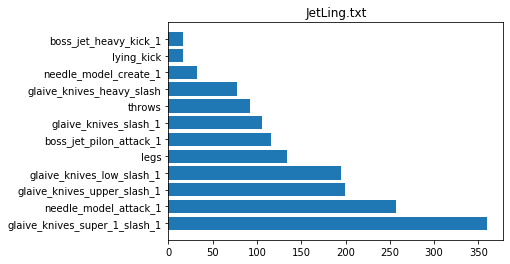

JetLiquidator.txt


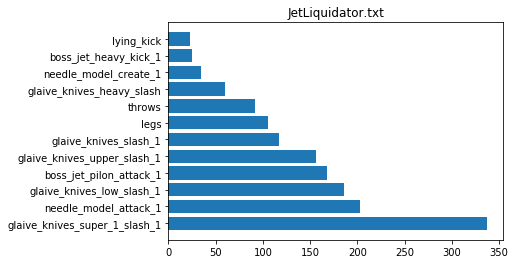

JetLynx.txt


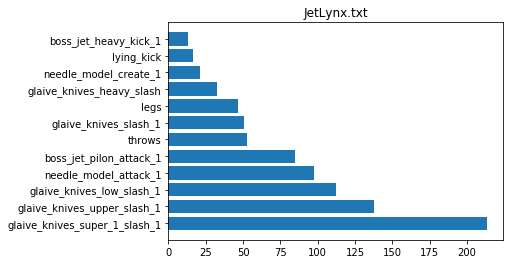

JetMarcus.txt


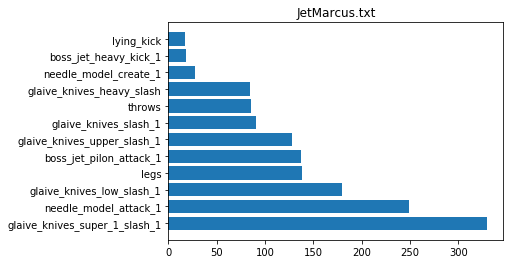

JetMidnight.txt


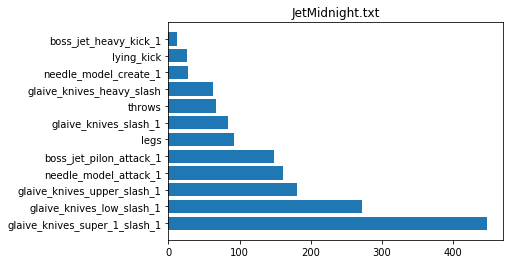

JetMonk.txt


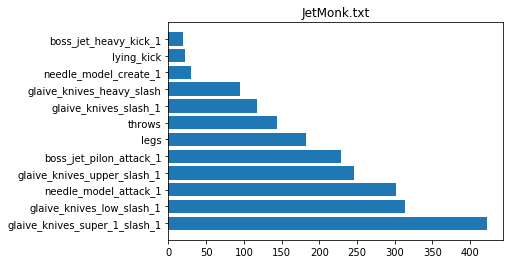

JetMonkey_King.txt


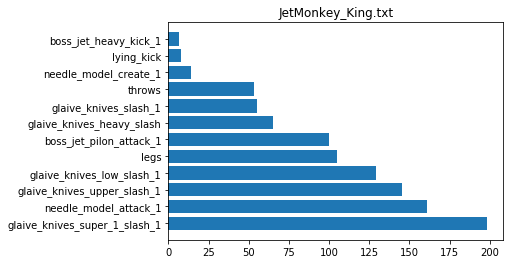

JetSarge.txt


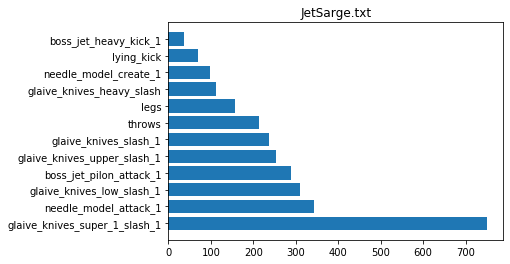

JetYukka.txt


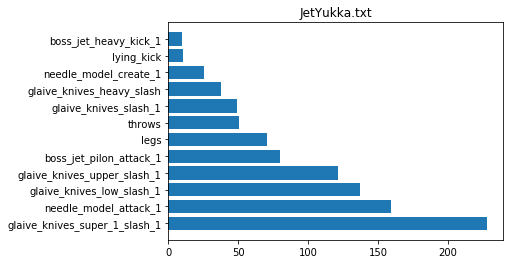

KiboBulwark.txt
KiboEmperor.txt
KiboFeldsher.txt
KiboFireguard.txt
KiboHelga.txt
KiboHongJoo.txt
KiboIronclad.txt
KiboJet.txt
KiboKibo.txt
KiboLing.txt
KiboLiquidator.txt
KiboLynx.txt
KiboMarcus.txt
KiboMidnight.txt
KiboMonk.txt
KiboMonkey_King.txt
KiboSarge.txt
KiboYukka.txt
LingBulwark.txt
LingEmperor.txt
LingFeldsher.txt
LingFireguard.txt
LingHelga.txt
LingHongJoo.txt
LingIronclad.txt
LingJet.txt
LingKibo.txt
LingLing.txt
LingLiquidator.txt
LingLynx.txt
LingMarcus.txt
LingMidnight.txt
LingMonk.txt
LingMonkey_King.txt
LingSarge.txt
LingYukka.txt
LiquidatorBulwark.txt
LiquidatorEmperor.txt
LiquidatorFeldsher.txt
LiquidatorFireguard.txt
LiquidatorHelga.txt
LiquidatorHongJoo.txt
LiquidatorIronclad.txt
LiquidatorJet.txt
LiquidatorKibo.txt
LiquidatorLing.txt
LiquidatorLiquidator.txt
LiquidatorLynx.txt
LiquidatorMarcus.txt
LiquidatorMidnight.txt
LiquidatorMonk.txt
LiquidatorMonkey_King.txt
LiquidatorSarge.txt
LiquidatorYukka.txt
LynxBulwark.txt
LynxEmperor.txt
LynxFeldsher.txt
LynxFireguar

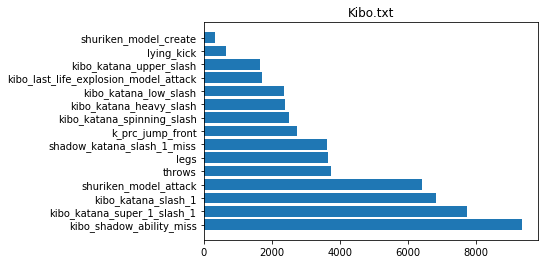

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

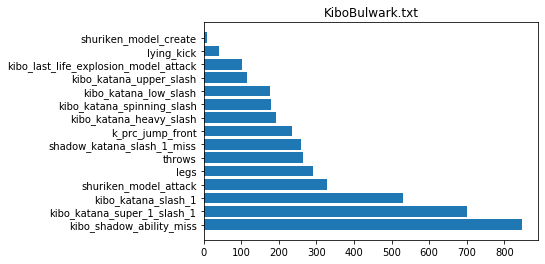

KiboEmperor.txt


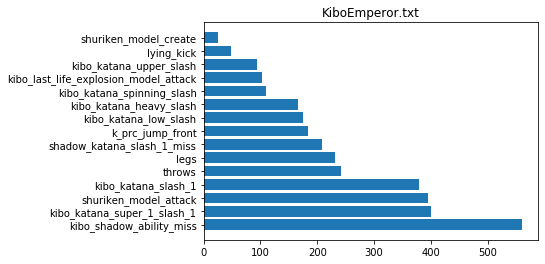

KiboFeldsher.txt


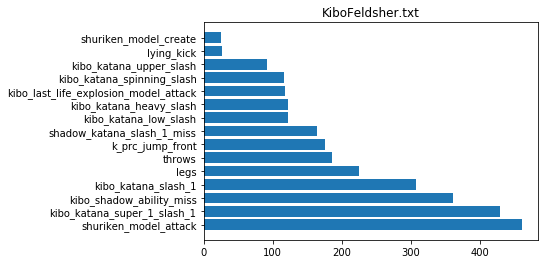

KiboFireguard.txt


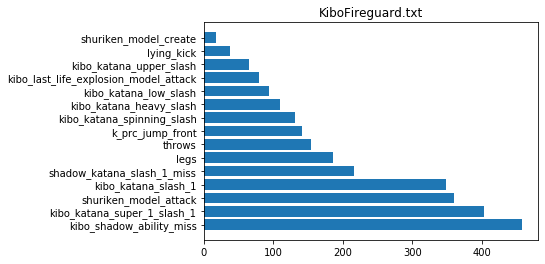

KiboHelga.txt


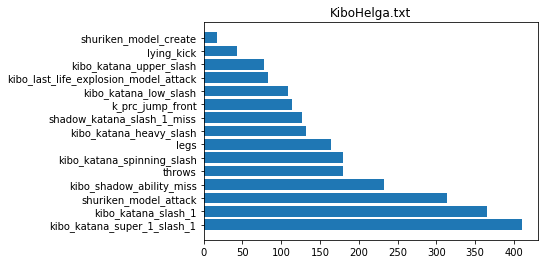

KiboHongJoo.txt


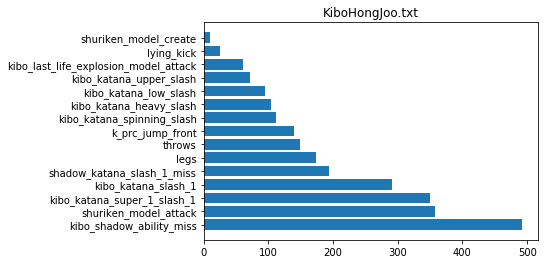

KiboIronclad.txt


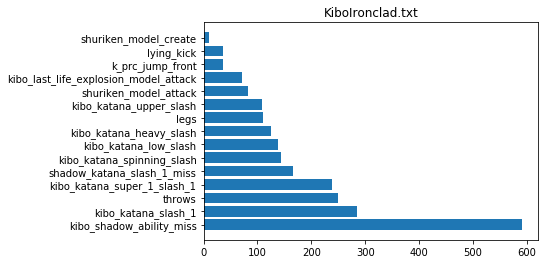

KiboJet.txt


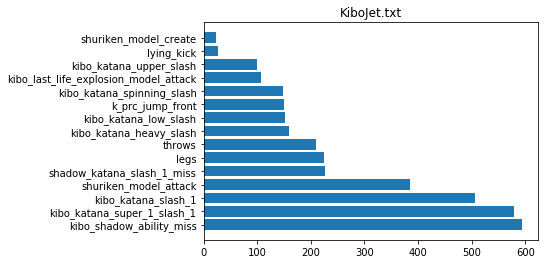

KiboKibo.txt


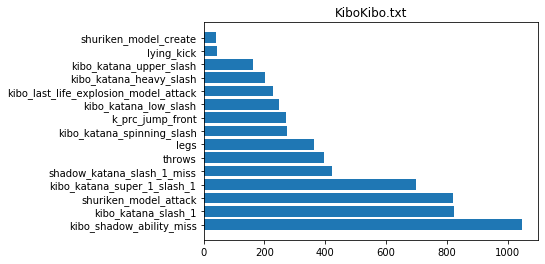

KiboLing.txt


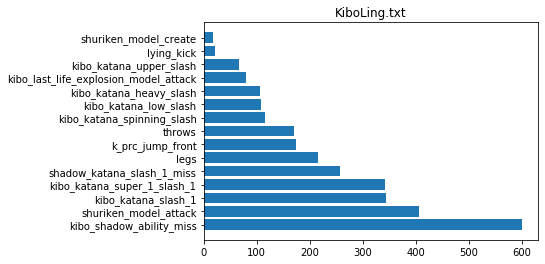

KiboLiquidator.txt


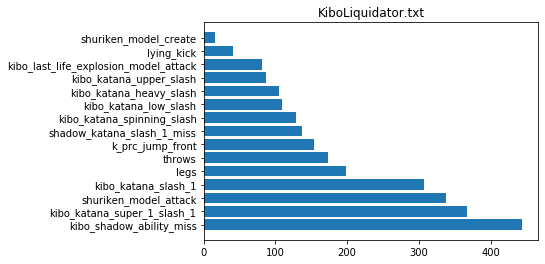

KiboLynx.txt


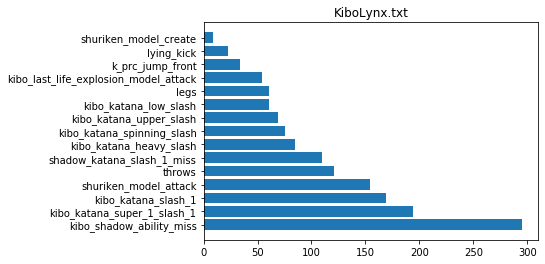

KiboMarcus.txt


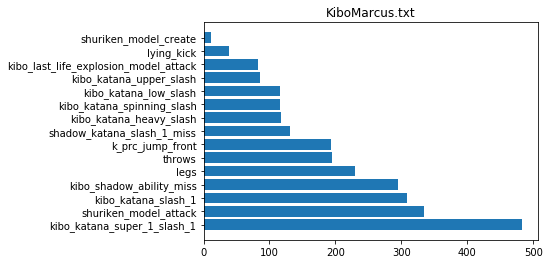

KiboMidnight.txt


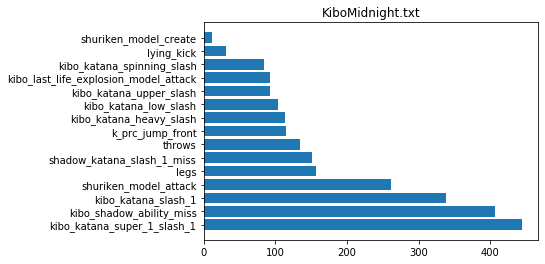

KiboMonk.txt


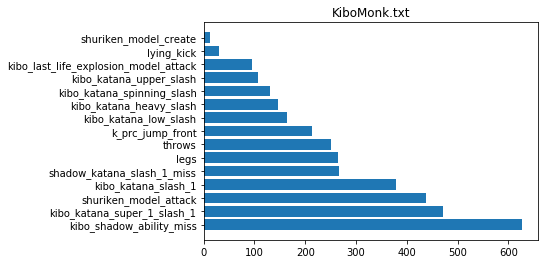

KiboMonkey_King.txt


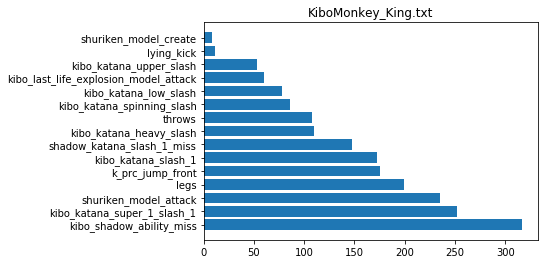

KiboSarge.txt


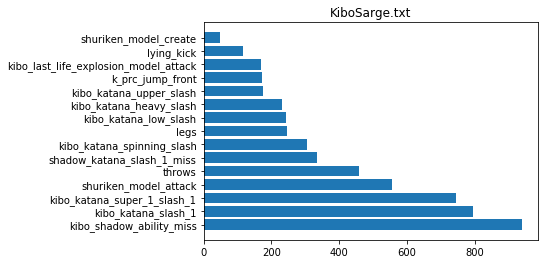

KiboYukka.txt


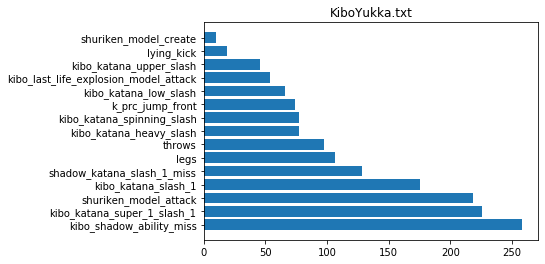

LingBulwark.txt
LingEmperor.txt
LingFeldsher.txt
LingFireguard.txt
LingHelga.txt
LingHongJoo.txt
LingIronclad.txt
LingJet.txt
LingKibo.txt
LingLing.txt
LingLiquidator.txt
LingLynx.txt
LingMarcus.txt
LingMidnight.txt
LingMonk.txt
LingMonkey_King.txt
LingSarge.txt
LingYukka.txt
LiquidatorBulwark.txt
LiquidatorEmperor.txt
LiquidatorFeldsher.txt
LiquidatorFireguard.txt
LiquidatorHelga.txt
LiquidatorHongJoo.txt
LiquidatorIronclad.txt
LiquidatorJet.txt
LiquidatorKibo.txt
LiquidatorLing.txt
LiquidatorLiquidator.txt
LiquidatorLynx.txt
LiquidatorMarcus.txt
LiquidatorMidnight.txt
LiquidatorMonk.txt
LiquidatorMonkey_King.txt
LiquidatorSarge.txt
LiquidatorYukka.txt
LynxBulwark.txt
LynxEmperor.txt
LynxFeldsher.txt
LynxFireguard.txt
LynxHelga.txt
LynxHongJoo.txt
LynxIronclad.txt
LynxJet.txt
LynxKibo.txt
LynxLing.txt
LynxLiquidator.txt
LynxLynx.txt
LynxMarcus.txt
LynxMidnight.txt
LynxMonk.txt
LynxMonkey_King.txt
LynxSarge.txt
LynxYukka.txt
MarcusBulwark.txt
MarcusEmperor.txt
MarcusFeldsher.txt
Marcus

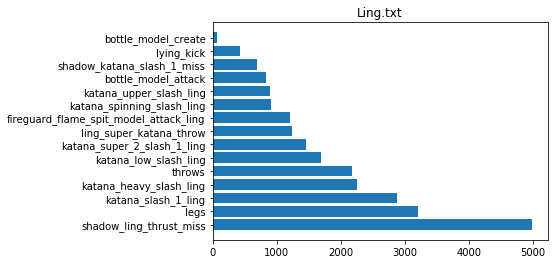

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

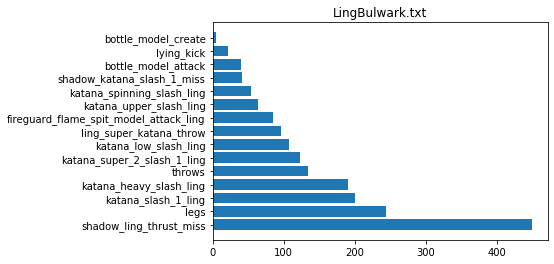

LingEmperor.txt


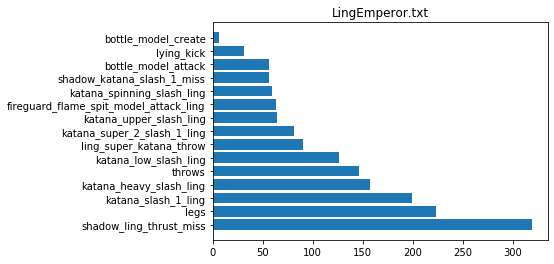

LingFeldsher.txt


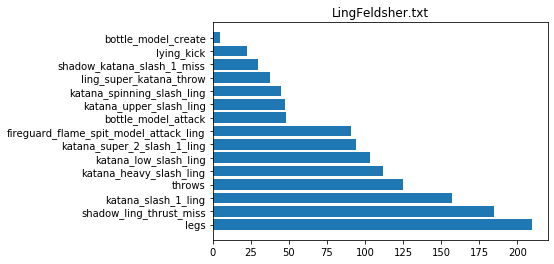

LingFireguard.txt


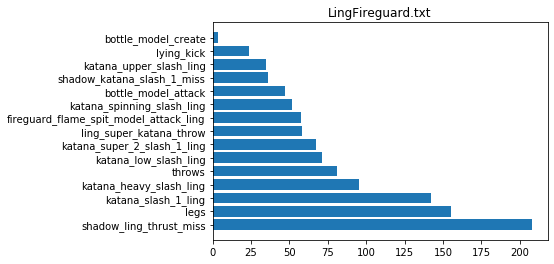

LingHelga.txt


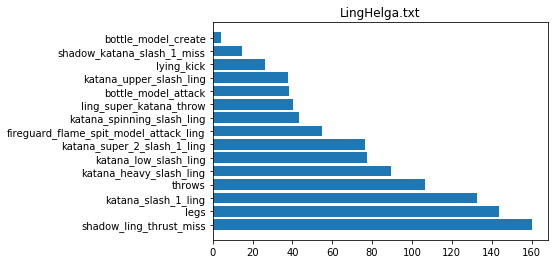

LingHongJoo.txt


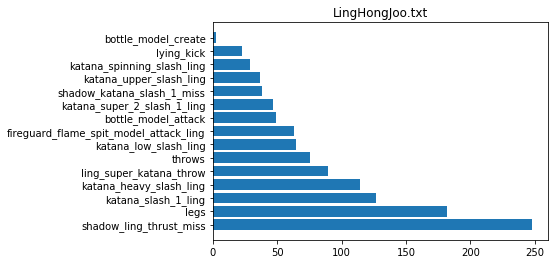

LingIronclad.txt


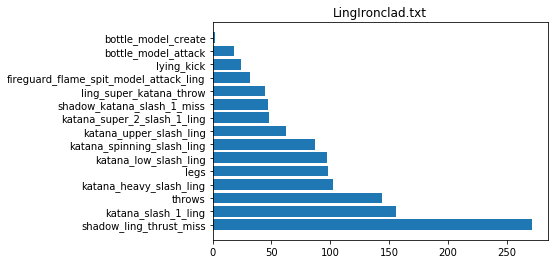

LingJet.txt


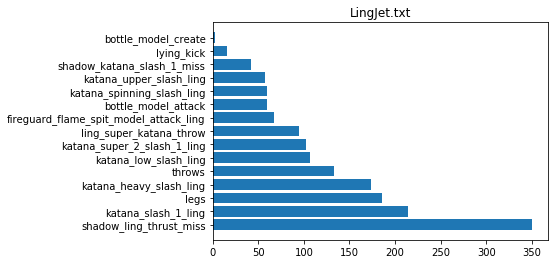

LingKibo.txt


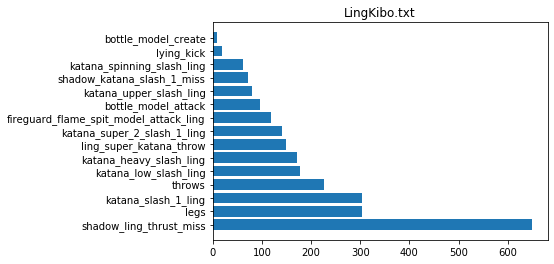

LingLing.txt


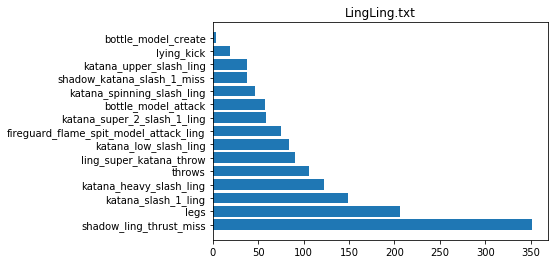

LingLiquidator.txt


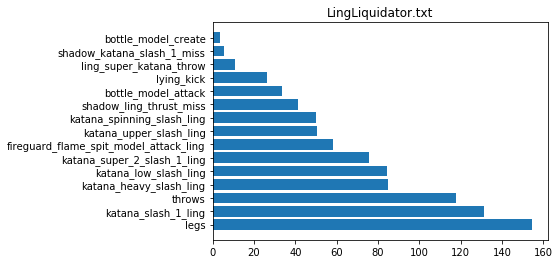

LingLynx.txt


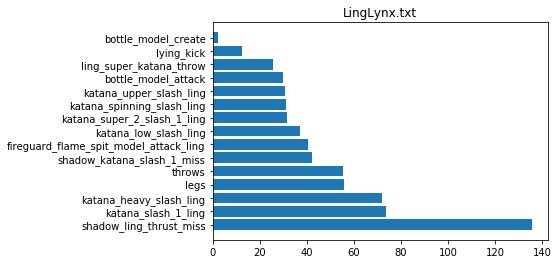

LingMarcus.txt


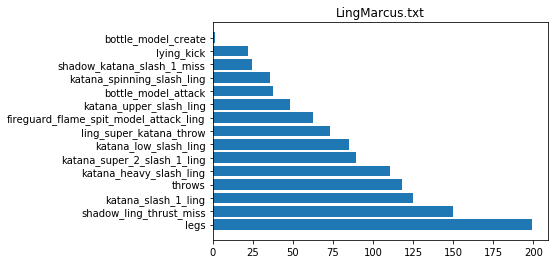

LingMidnight.txt


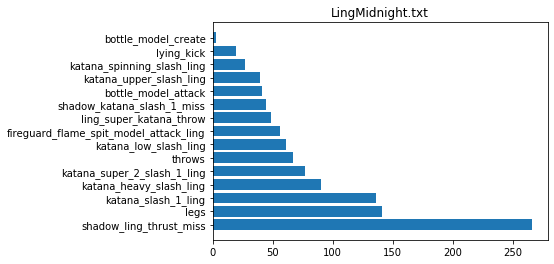

LingMonk.txt


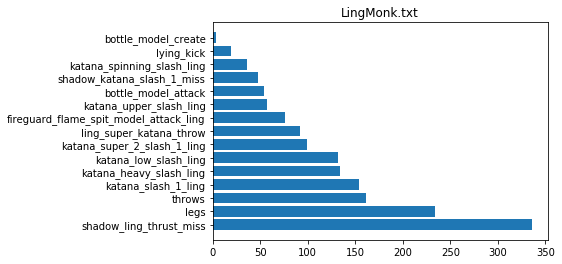

LingMonkey_King.txt


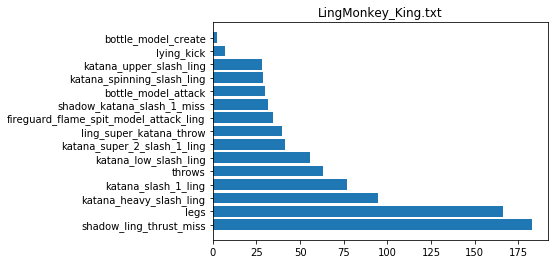

LingSarge.txt


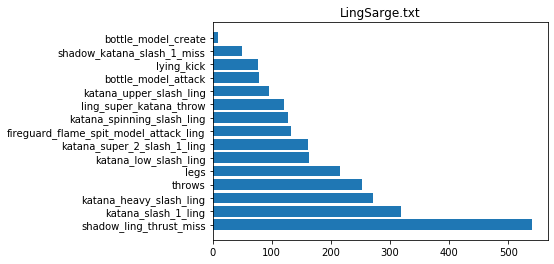

LingYukka.txt


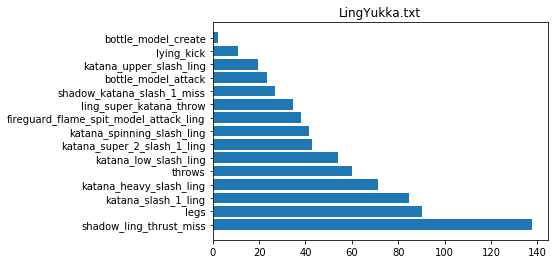

LiquidatorBulwark.txt
LiquidatorEmperor.txt
LiquidatorFeldsher.txt
LiquidatorFireguard.txt
LiquidatorHelga.txt
LiquidatorHongJoo.txt
LiquidatorIronclad.txt
LiquidatorJet.txt
LiquidatorKibo.txt
LiquidatorLing.txt
LiquidatorLiquidator.txt
LiquidatorLynx.txt
LiquidatorMarcus.txt
LiquidatorMidnight.txt
LiquidatorMonk.txt
LiquidatorMonkey_King.txt
LiquidatorSarge.txt
LiquidatorYukka.txt
LynxBulwark.txt
LynxEmperor.txt
LynxFeldsher.txt
LynxFireguard.txt
LynxHelga.txt
LynxHongJoo.txt
LynxIronclad.txt
LynxJet.txt
LynxKibo.txt
LynxLing.txt
LynxLiquidator.txt
LynxLynx.txt
LynxMarcus.txt
LynxMidnight.txt
LynxMonk.txt
LynxMonkey_King.txt
LynxSarge.txt
LynxYukka.txt
MarcusBulwark.txt
MarcusEmperor.txt
MarcusFeldsher.txt
MarcusFireguard.txt
MarcusHelga.txt
MarcusHongJoo.txt
MarcusIronclad.txt
MarcusJet.txt
MarcusKibo.txt
MarcusLing.txt
MarcusLiquidator.txt
MarcusLynx.txt
MarcusMarcus.txt
MarcusMidnight.txt
MarcusMonk.txt
MarcusMonkey_King.txt
MarcusSarge.txt
MarcusYukka.txt
MidnightBulwark.txt
Midni

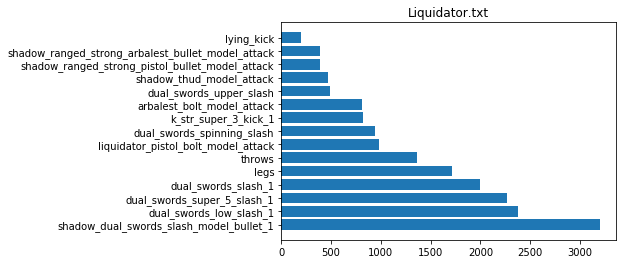

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

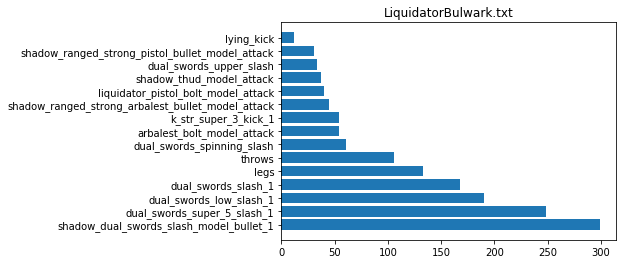

LiquidatorEmperor.txt


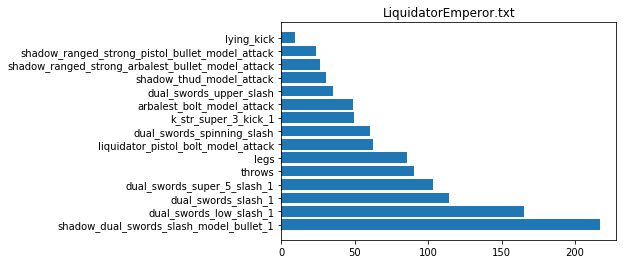

LiquidatorFeldsher.txt


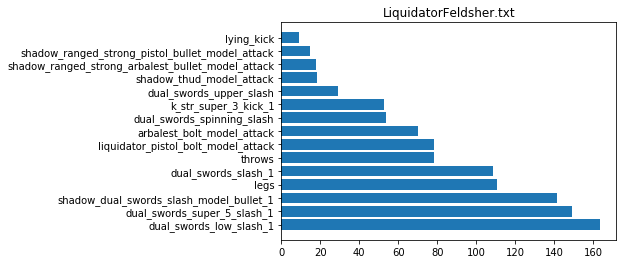

LiquidatorFireguard.txt


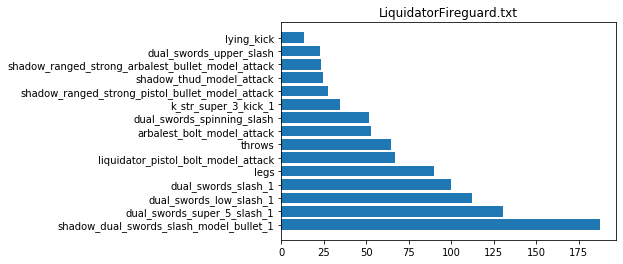

LiquidatorHelga.txt


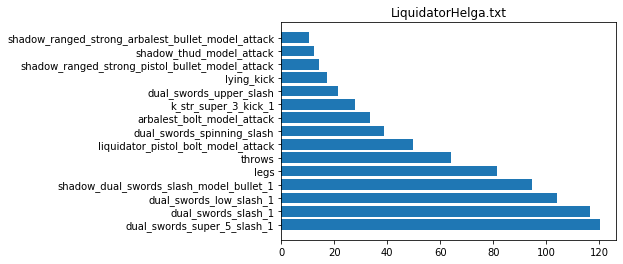

LiquidatorHongJoo.txt


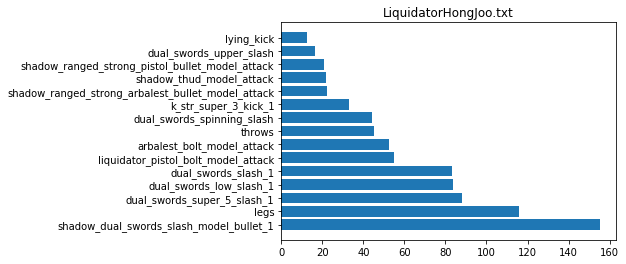

LiquidatorIronclad.txt


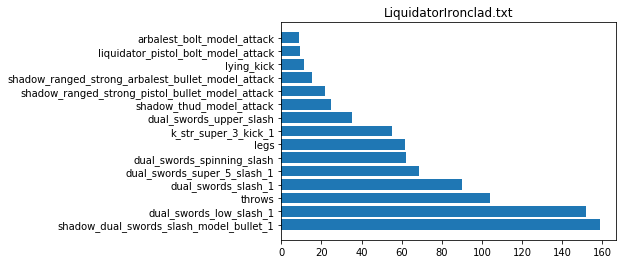

LiquidatorJet.txt


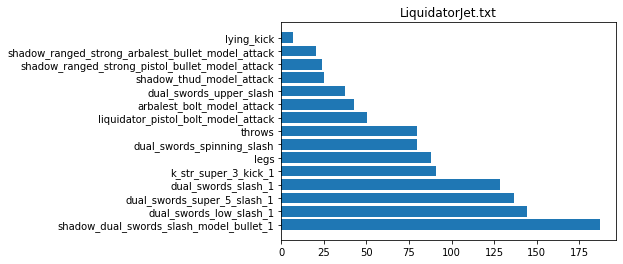

LiquidatorKibo.txt


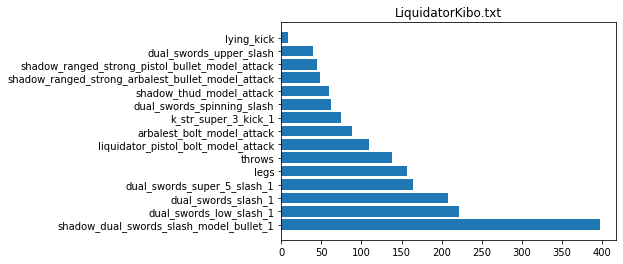

LiquidatorLing.txt


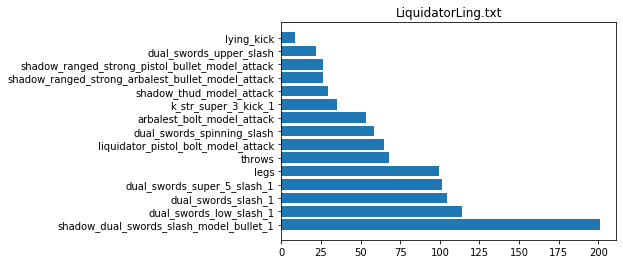

LiquidatorLiquidator.txt


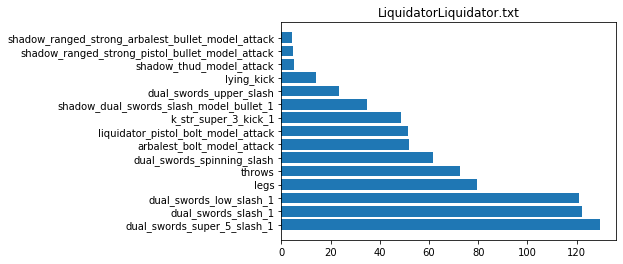

LiquidatorLynx.txt


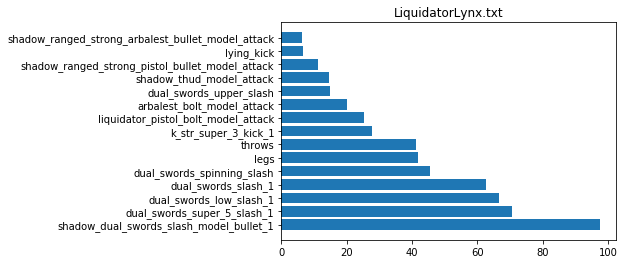

LiquidatorMarcus.txt


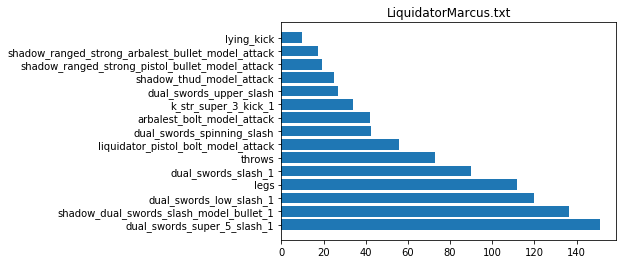

LiquidatorMidnight.txt


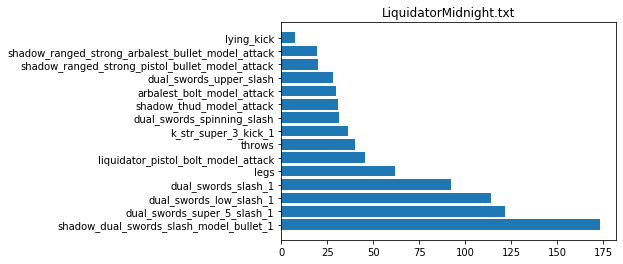

LiquidatorMonk.txt


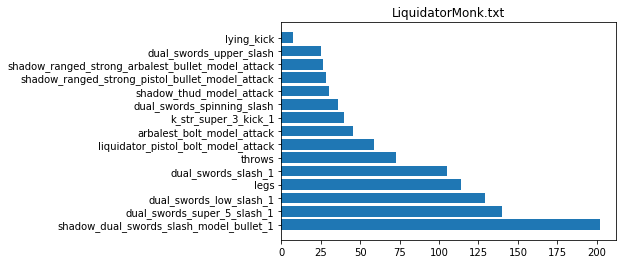

LiquidatorMonkey_King.txt


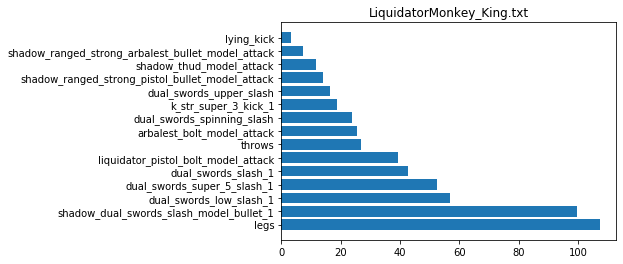

LiquidatorSarge.txt


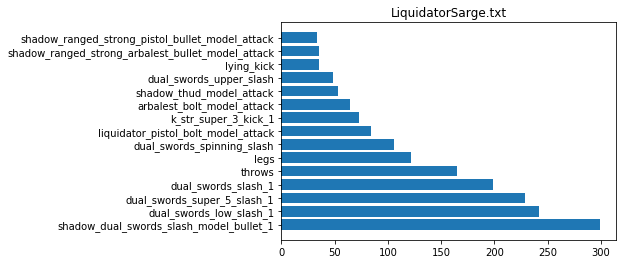

LiquidatorYukka.txt


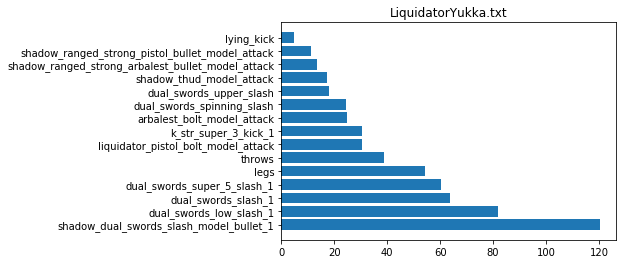

LynxBulwark.txt
LynxEmperor.txt
LynxFeldsher.txt
LynxFireguard.txt
LynxHelga.txt
LynxHongJoo.txt
LynxIronclad.txt
LynxJet.txt
LynxKibo.txt
LynxLing.txt
LynxLiquidator.txt
LynxLynx.txt
LynxMarcus.txt
LynxMidnight.txt
LynxMonk.txt
LynxMonkey_King.txt
LynxSarge.txt
LynxYukka.txt
MarcusBulwark.txt
MarcusEmperor.txt
MarcusFeldsher.txt
MarcusFireguard.txt
MarcusHelga.txt
MarcusHongJoo.txt
MarcusIronclad.txt
MarcusJet.txt
MarcusKibo.txt
MarcusLing.txt
MarcusLiquidator.txt
MarcusLynx.txt
MarcusMarcus.txt
MarcusMidnight.txt
MarcusMonk.txt
MarcusMonkey_King.txt
MarcusSarge.txt
MarcusYukka.txt
MidnightBulwark.txt
MidnightEmperor.txt
MidnightFeldsher.txt
MidnightFireguard.txt
MidnightHelga.txt
MidnightHongJoo.txt
MidnightIronclad.txt
MidnightJet.txt
MidnightKibo.txt
MidnightLing.txt
MidnightLiquidator.txt
MidnightLynx.txt
MidnightMarcus.txt
MidnightMidnight.txt
MidnightMonk.txt
MidnightMonkey_King.txt
MidnightSarge.txt
MidnightYukka.txt
MonkBulwark.txt
MonkEmperor.txt
Monkey_KingBulwark.txt
Monkey

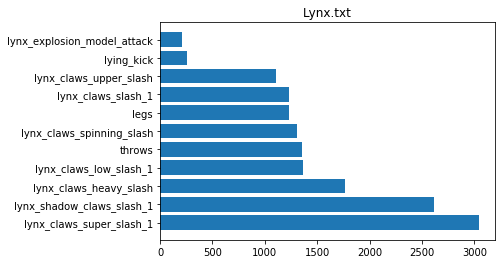

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

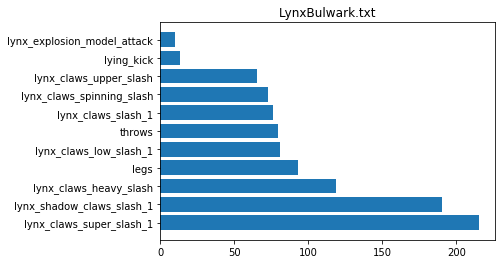

LynxEmperor.txt


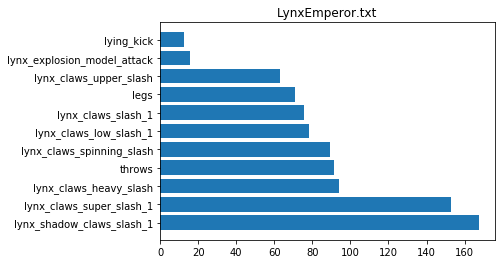

LynxFeldsher.txt


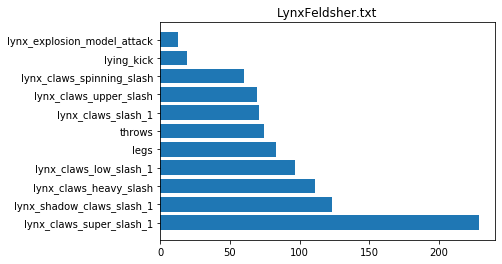

LynxFireguard.txt


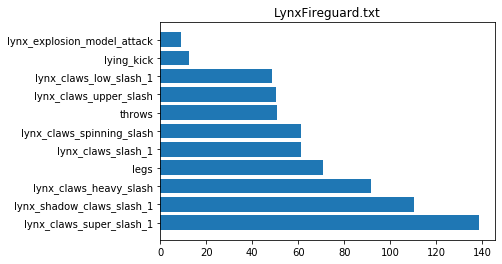

LynxHelga.txt


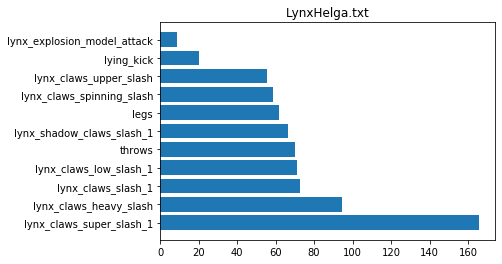

LynxHongJoo.txt


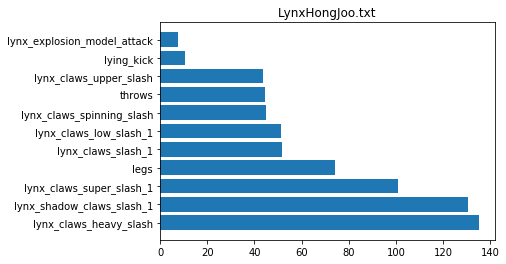

LynxIronclad.txt


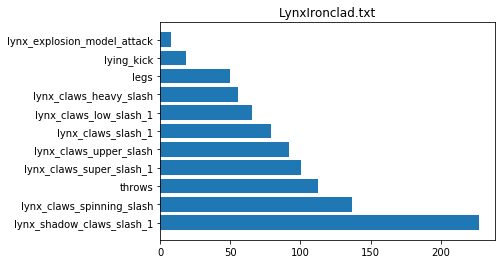

LynxJet.txt


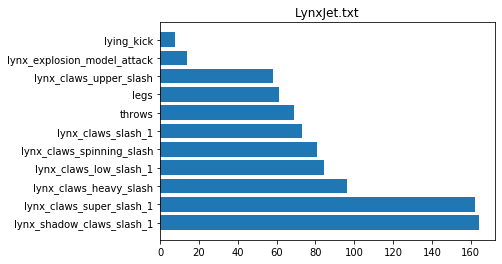

LynxKibo.txt


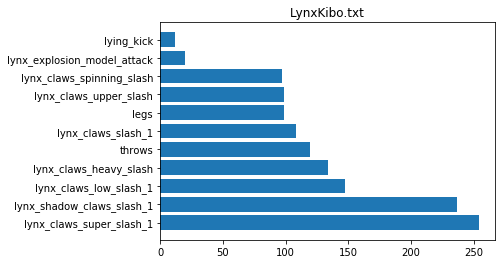

LynxLing.txt


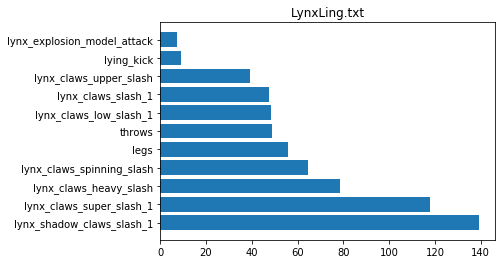

LynxLiquidator.txt


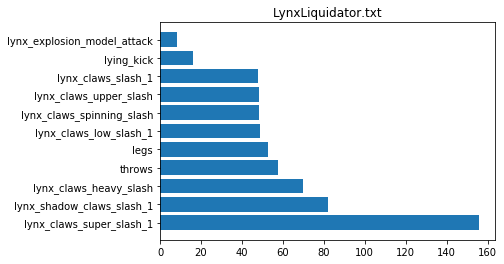

LynxLynx.txt


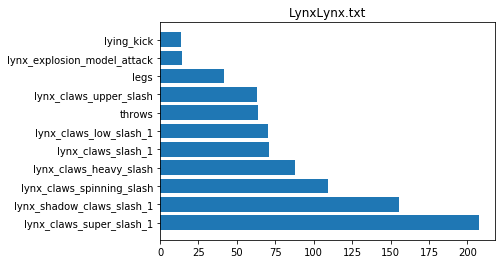

LynxMarcus.txt


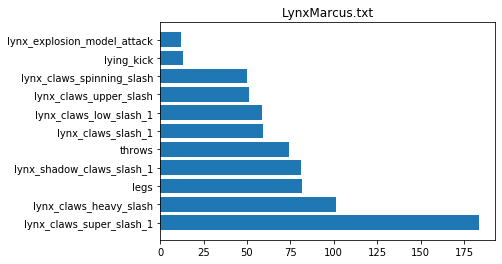

LynxMidnight.txt


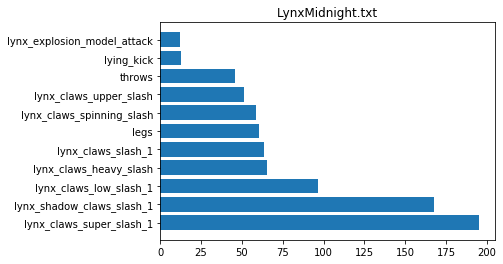

LynxMonk.txt


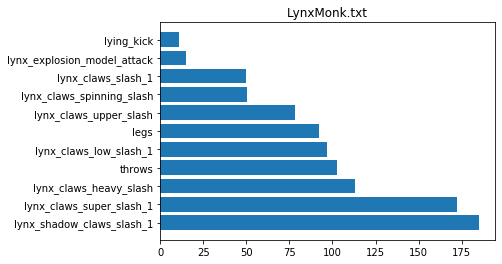

LynxMonkey_King.txt


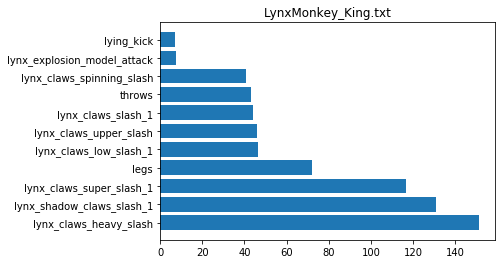

LynxSarge.txt


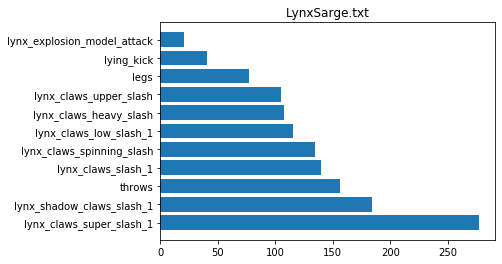

LynxYukka.txt


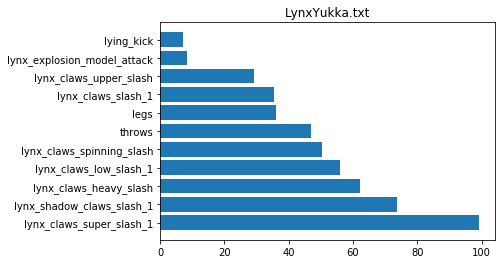

MarcusBulwark.txt
MarcusEmperor.txt
MarcusFeldsher.txt
MarcusFireguard.txt
MarcusHelga.txt
MarcusHongJoo.txt
MarcusIronclad.txt
MarcusJet.txt
MarcusKibo.txt
MarcusLing.txt
MarcusLiquidator.txt
MarcusLynx.txt
MarcusMarcus.txt
MarcusMidnight.txt
MarcusMonk.txt
MarcusMonkey_King.txt
MarcusSarge.txt
MarcusYukka.txt
MidnightBulwark.txt
MidnightEmperor.txt
MidnightFeldsher.txt
MidnightFireguard.txt
MidnightHelga.txt
MidnightHongJoo.txt
MidnightIronclad.txt
MidnightJet.txt
MidnightKibo.txt
MidnightLing.txt
MidnightLiquidator.txt
MidnightLynx.txt
MidnightMarcus.txt
MidnightMidnight.txt
MidnightMonk.txt
MidnightMonkey_King.txt
MidnightSarge.txt
MidnightYukka.txt
MonkBulwark.txt
MonkEmperor.txt
Monkey_KingBulwark.txt
Monkey_KingEmperor.txt
Monkey_KingFeldsher.txt
Monkey_KingFireguard.txt
Monkey_KingHelga.txt
Monkey_KingHongJoo.txt
Monkey_KingIronclad.txt
Monkey_KingJet.txt
Monkey_KingKibo.txt
Monkey_KingLing.txt
Monkey_KingLiquidator.txt
Monkey_KingLynx.txt
Monkey_KingMarcus.txt
Monkey_KingMidni

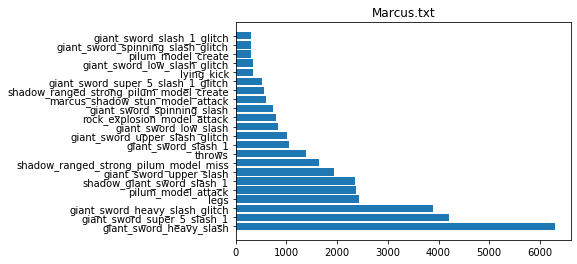

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

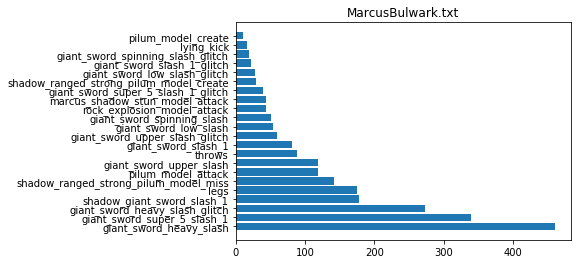

MarcusEmperor.txt


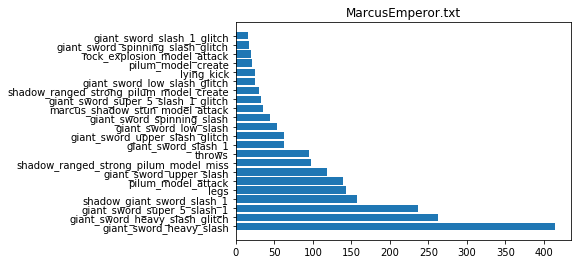

MarcusFeldsher.txt


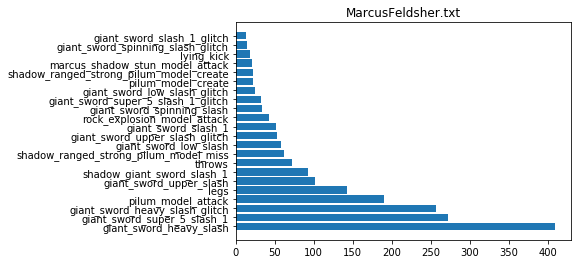

MarcusFireguard.txt


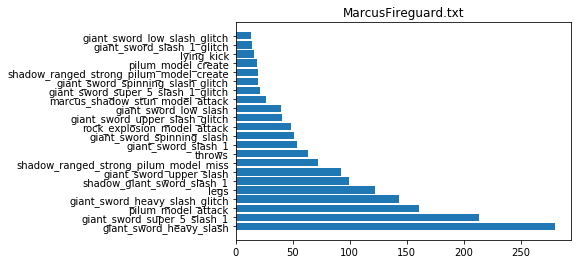

MarcusHelga.txt


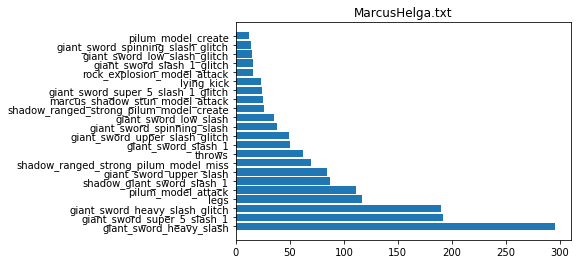

MarcusHongJoo.txt


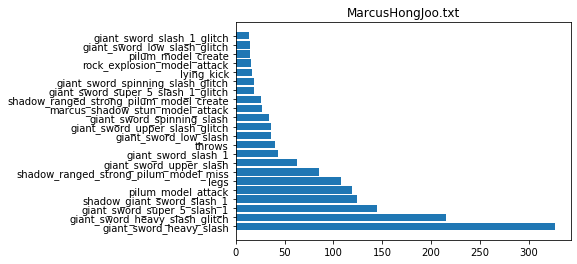

MarcusIronclad.txt


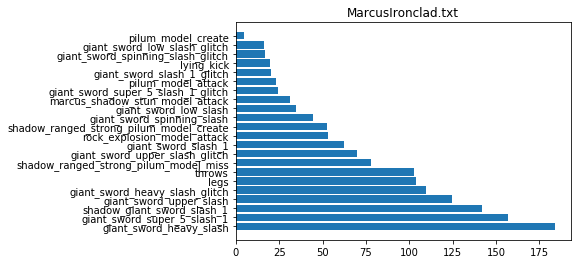

MarcusJet.txt


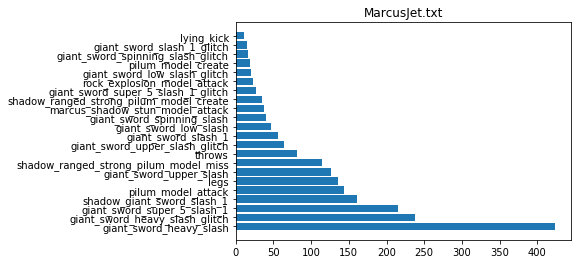

MarcusKibo.txt


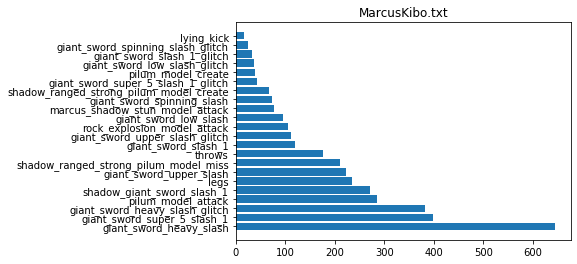

MarcusLing.txt


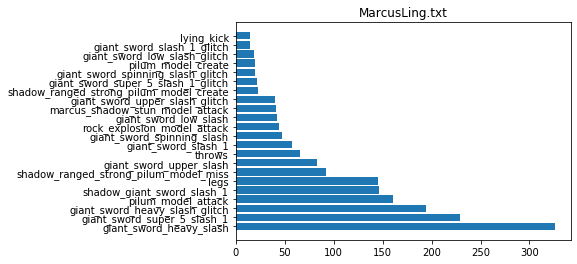

MarcusLiquidator.txt


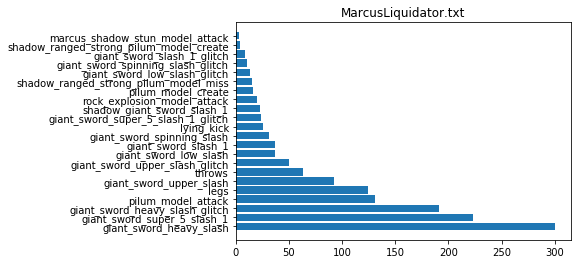

MarcusLynx.txt


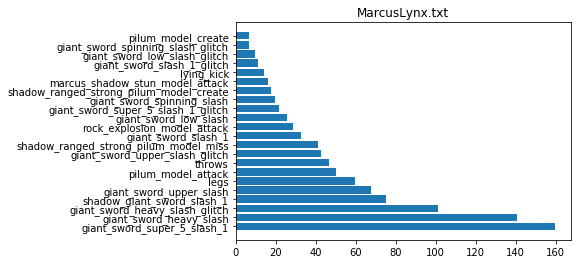

MarcusMarcus.txt


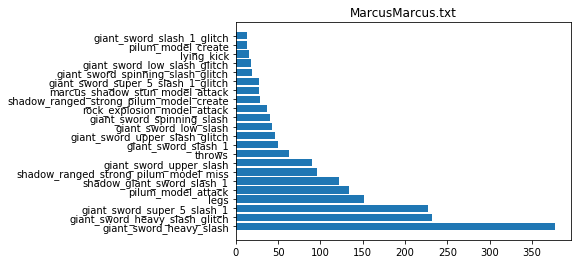

MarcusMidnight.txt


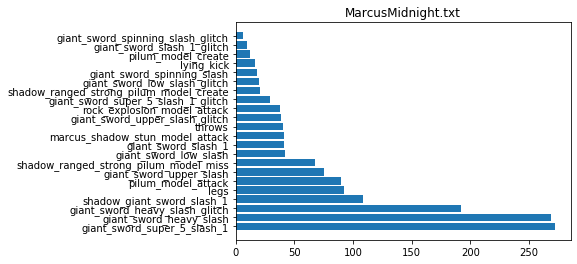

MarcusMonk.txt


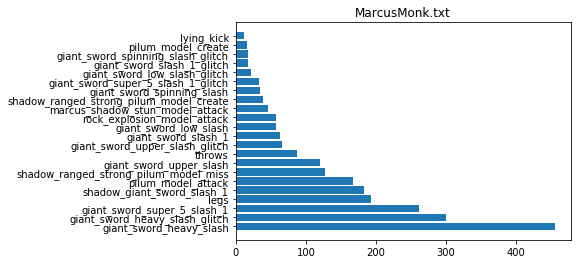

MarcusMonkey_King.txt


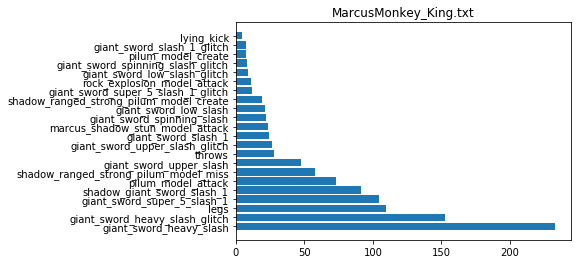

MarcusSarge.txt


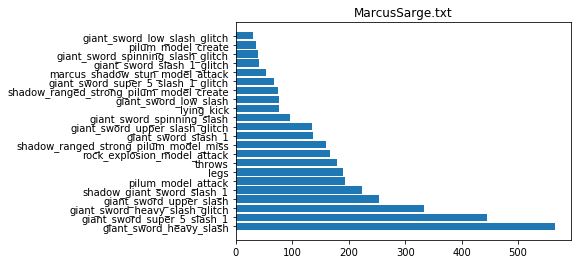

MarcusYukka.txt


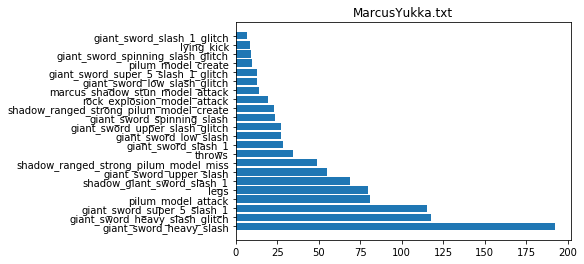

MidnightBulwark.txt
MidnightEmperor.txt
MidnightFeldsher.txt
MidnightFireguard.txt
MidnightHelga.txt
MidnightHongJoo.txt
MidnightIronclad.txt
MidnightJet.txt
MidnightKibo.txt
MidnightLing.txt
MidnightLiquidator.txt
MidnightLynx.txt
MidnightMarcus.txt
MidnightMidnight.txt
MidnightMonk.txt
MidnightMonkey_King.txt
MidnightSarge.txt
MidnightYukka.txt
MonkBulwark.txt
MonkEmperor.txt
Monkey_KingBulwark.txt
Monkey_KingEmperor.txt
Monkey_KingFeldsher.txt
Monkey_KingFireguard.txt
Monkey_KingHelga.txt
Monkey_KingHongJoo.txt
Monkey_KingIronclad.txt
Monkey_KingJet.txt
Monkey_KingKibo.txt
Monkey_KingLing.txt
Monkey_KingLiquidator.txt
Monkey_KingLynx.txt
Monkey_KingMarcus.txt
Monkey_KingMidnight.txt
Monkey_KingMonk.txt
Monkey_KingMonkey_King.txt
Monkey_KingSarge.txt
Monkey_KingYukka.txt
MonkFeldsher.txt
MonkFireguard.txt
MonkHelga.txt
MonkHongJoo.txt
MonkIronclad.txt
MonkJet.txt
MonkKibo.txt
MonkLing.txt
MonkLiquidator.txt
MonkLynx.txt
MonkMarcus.txt
MonkMidnight.txt
MonkMonk.txt
MonkMonkey_King.txt

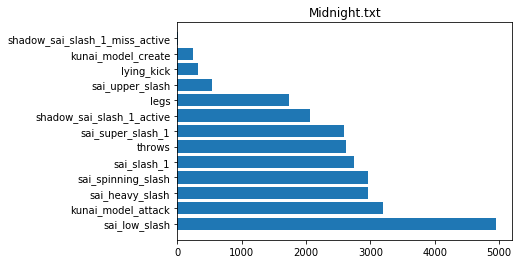

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

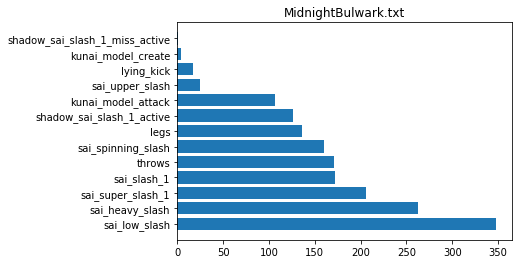

MidnightEmperor.txt


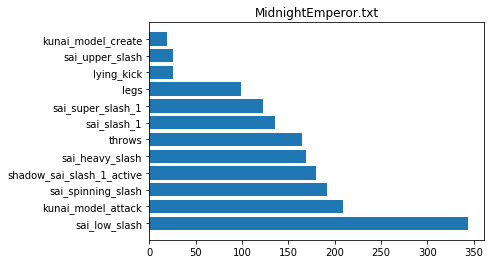

MidnightFeldsher.txt


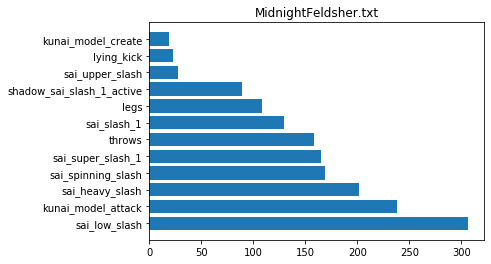

MidnightFireguard.txt


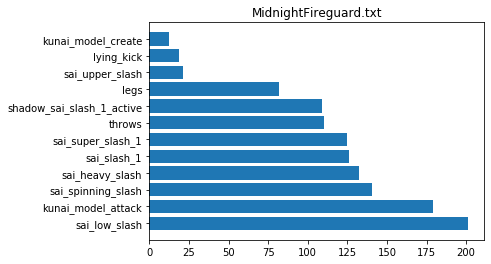

MidnightHelga.txt


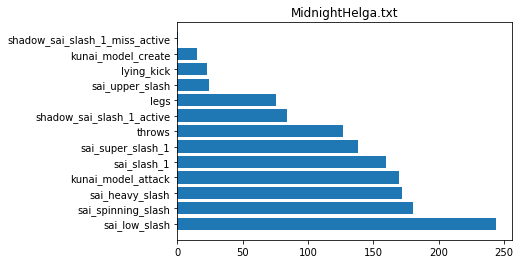

MidnightHongJoo.txt


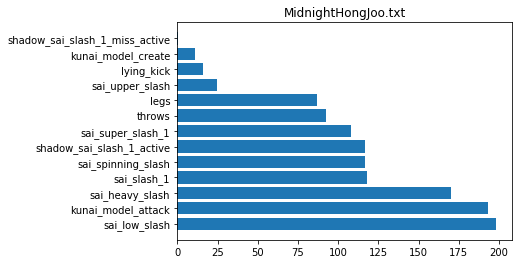

MidnightIronclad.txt


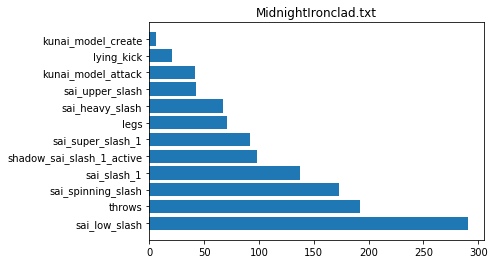

MidnightJet.txt


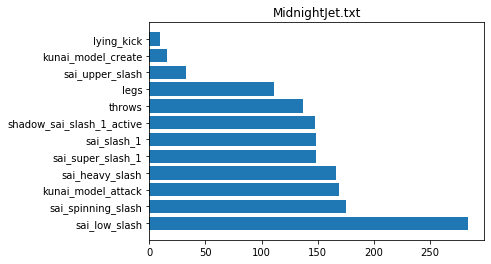

MidnightKibo.txt


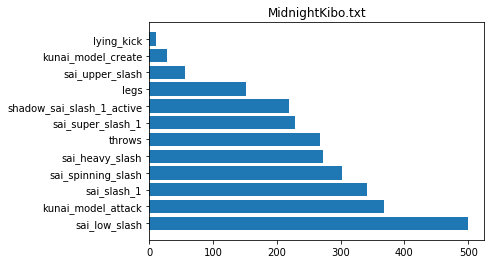

MidnightLing.txt


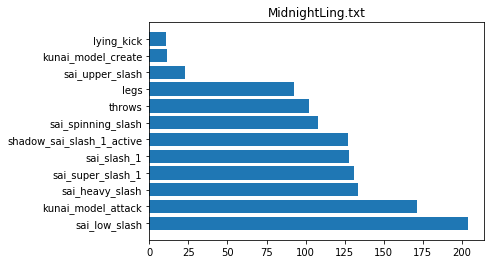

MidnightLiquidator.txt


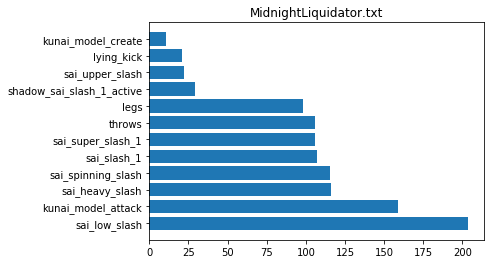

MidnightLynx.txt


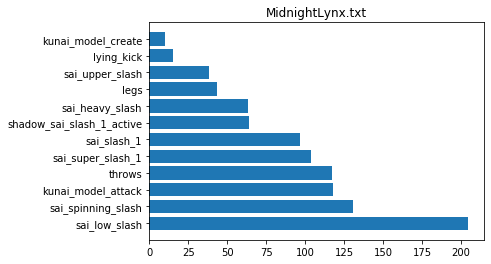

MidnightMarcus.txt


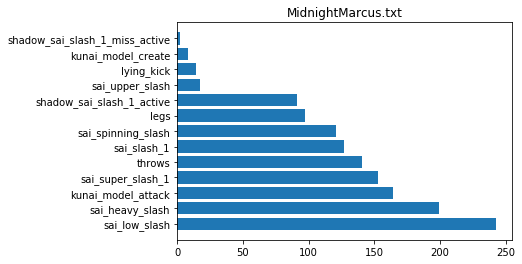

MidnightMidnight.txt


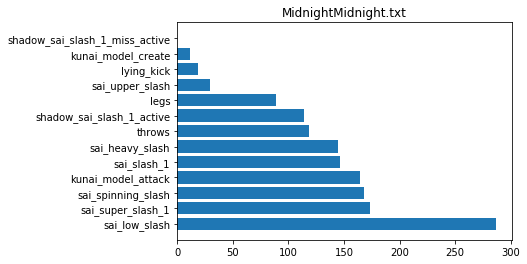

MidnightMonk.txt


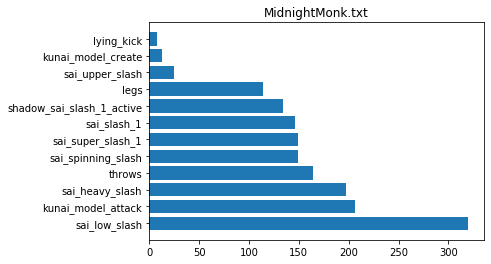

MidnightMonkey_King.txt


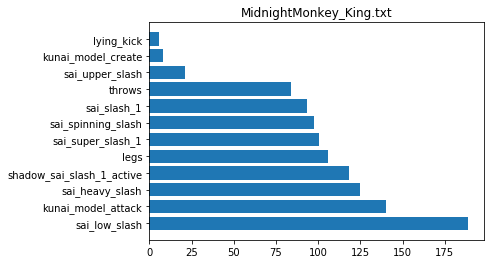

MidnightSarge.txt


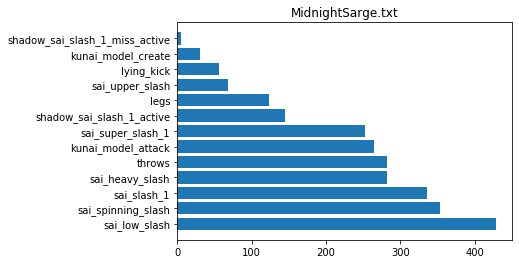

MidnightYukka.txt


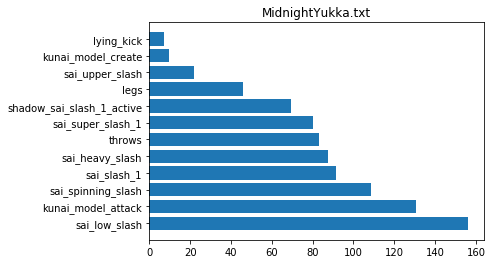

MonkBulwark.txt
MonkEmperor.txt
Monkey_KingBulwark.txt
Monkey_KingEmperor.txt
Monkey_KingFeldsher.txt
Monkey_KingFireguard.txt
Monkey_KingHelga.txt
Monkey_KingHongJoo.txt
Monkey_KingIronclad.txt
Monkey_KingJet.txt
Monkey_KingKibo.txt
Monkey_KingLing.txt
Monkey_KingLiquidator.txt
Monkey_KingLynx.txt
Monkey_KingMarcus.txt
Monkey_KingMidnight.txt
Monkey_KingMonk.txt
Monkey_KingMonkey_King.txt
Monkey_KingSarge.txt
Monkey_KingYukka.txt
MonkFeldsher.txt
MonkFireguard.txt
MonkHelga.txt
MonkHongJoo.txt
MonkIronclad.txt
MonkJet.txt
MonkKibo.txt
MonkLing.txt
MonkLiquidator.txt
MonkLynx.txt
MonkMarcus.txt
MonkMidnight.txt
MonkMonk.txt
MonkMonkey_King.txt
MonkSarge.txt
MonkYukka.txt
SargeBulwark.txt
SargeEmperor.txt
SargeFeldsher.txt
SargeFireguard.txt
SargeHelga.txt
SargeHongJoo.txt
SargeIronclad.txt
SargeJet.txt
SargeKibo.txt
SargeLing.txt
SargeLiquidator.txt
SargeLynx.txt
SargeMarcus.txt
SargeMidnight.txt
SargeMonk.txt
SargeMonkey_King.txt
SargeSarge.txt
SargeYukka.txt
YukkaBulwark.txt
YukkaEmp

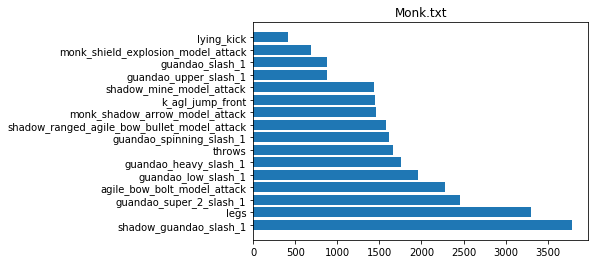

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

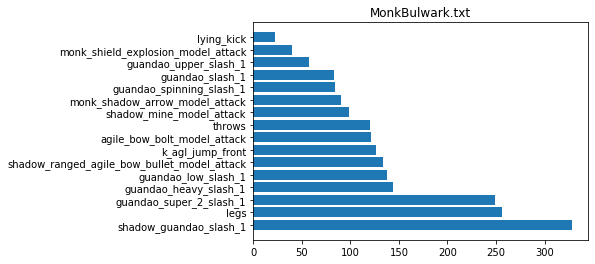

MonkEmperor.txt


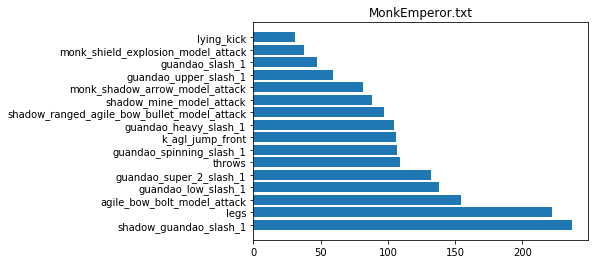

Monkey_KingBulwark.txt


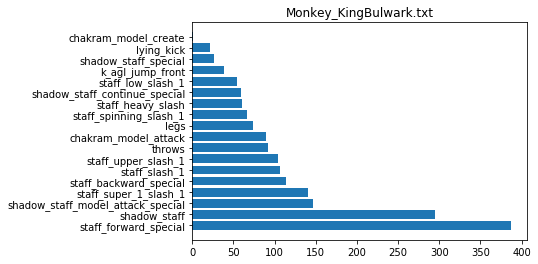

Monkey_KingEmperor.txt


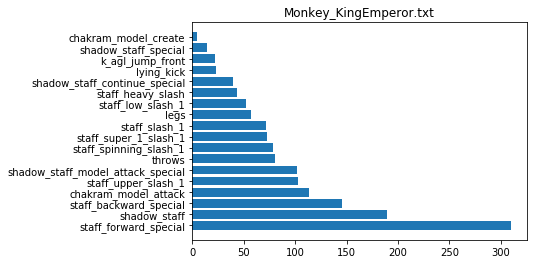

Monkey_KingFeldsher.txt


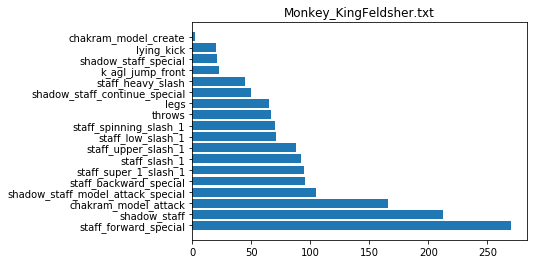

Monkey_KingFireguard.txt


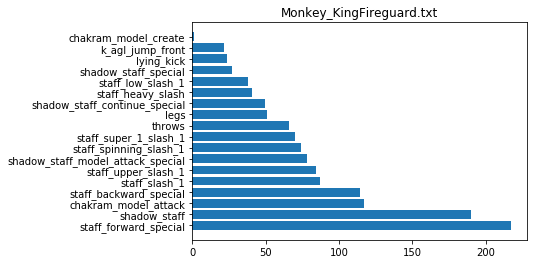

Monkey_KingHelga.txt


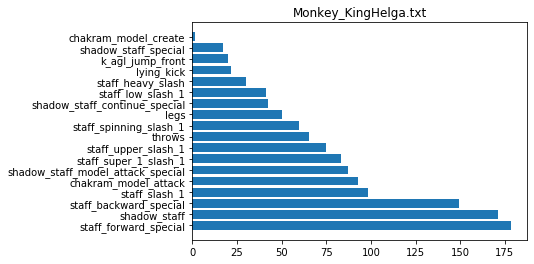

Monkey_KingHongJoo.txt


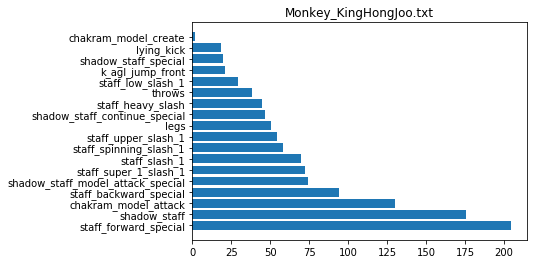

Monkey_KingIronclad.txt


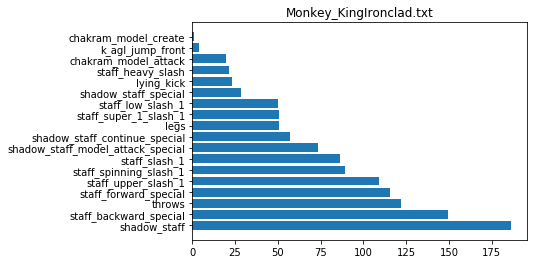

Monkey_KingJet.txt


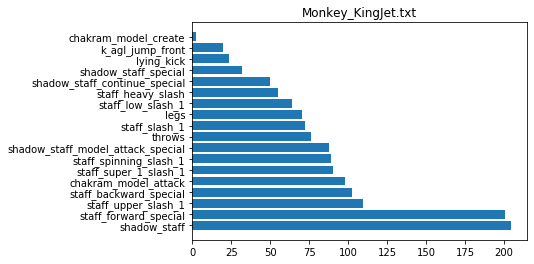

Monkey_KingKibo.txt


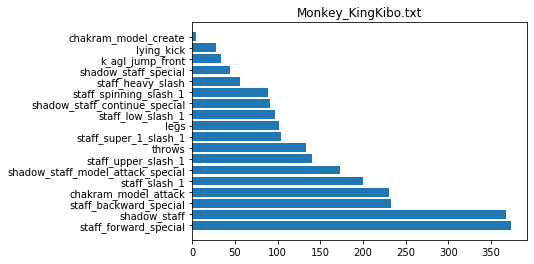

Monkey_KingLing.txt


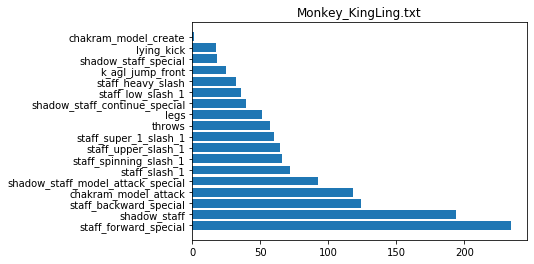

Monkey_KingLiquidator.txt


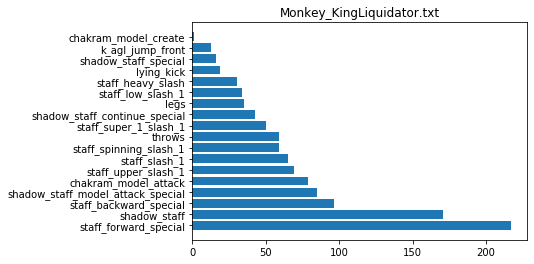

Monkey_KingLynx.txt


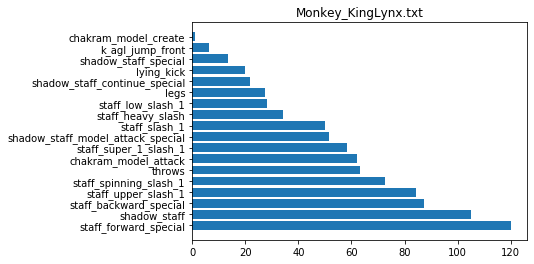

Monkey_KingMarcus.txt


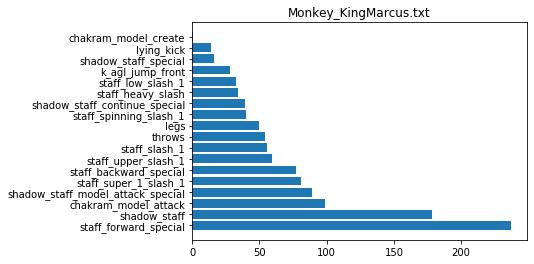

Monkey_KingMidnight.txt


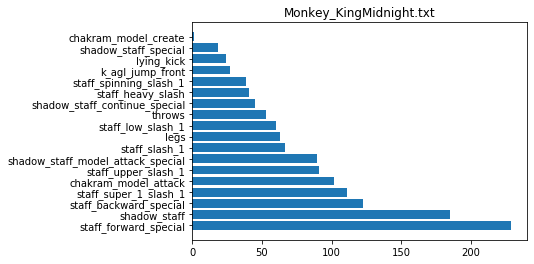

Monkey_KingMonk.txt


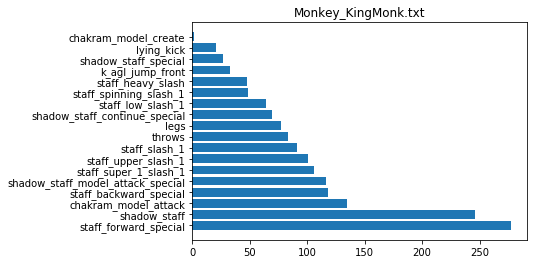

Monkey_KingMonkey_King.txt


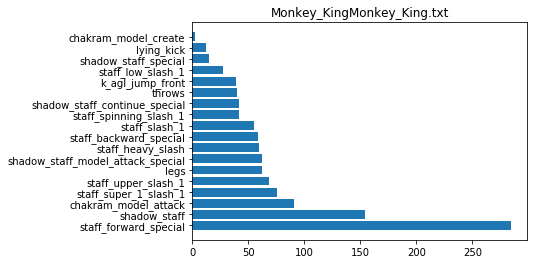

Monkey_KingSarge.txt


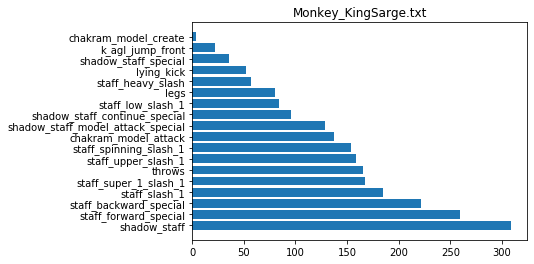

Monkey_KingYukka.txt


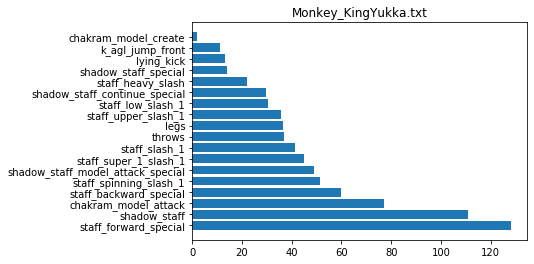

MonkFeldsher.txt


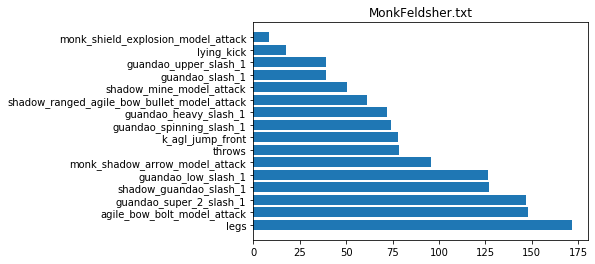

MonkFireguard.txt


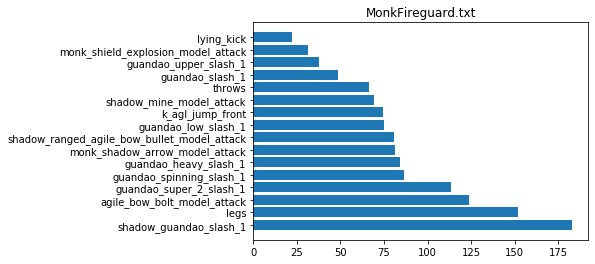

MonkHelga.txt


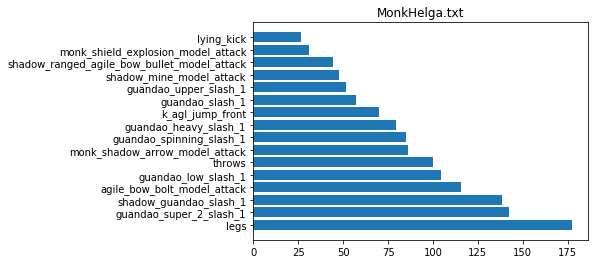

MonkHongJoo.txt


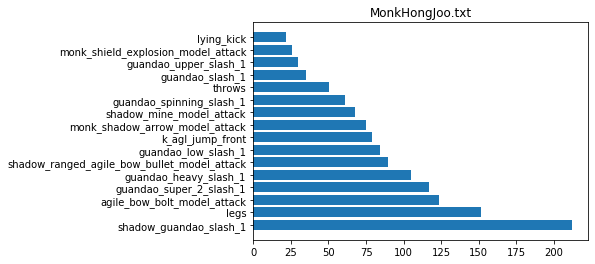

MonkIronclad.txt


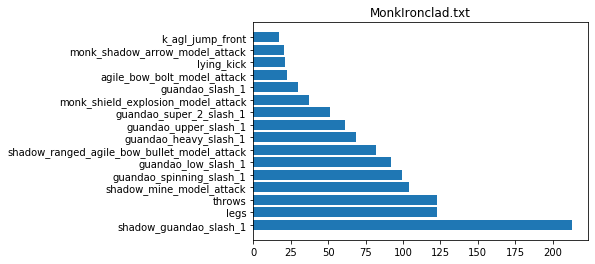

MonkJet.txt


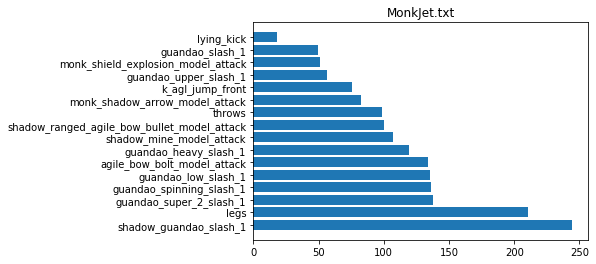

MonkKibo.txt


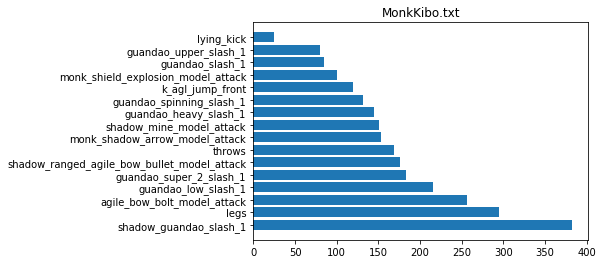

MonkLing.txt


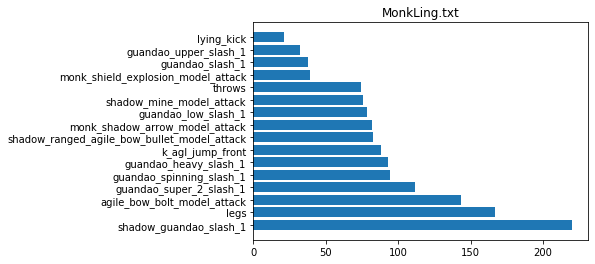

MonkLiquidator.txt


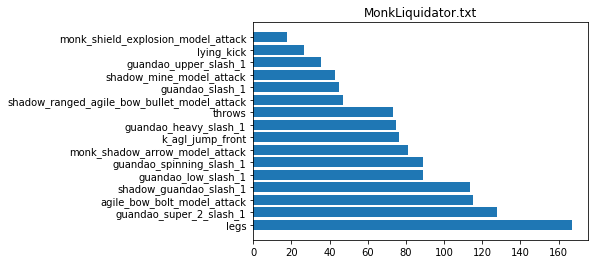

MonkLynx.txt


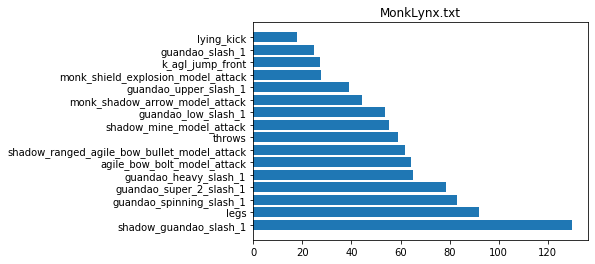

MonkMarcus.txt


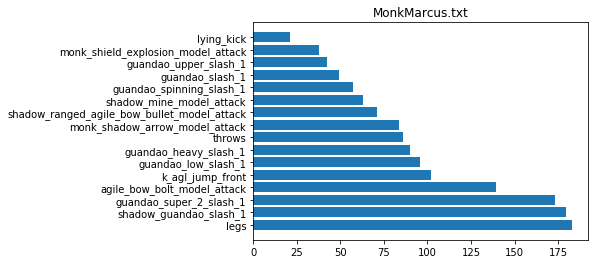

MonkMidnight.txt


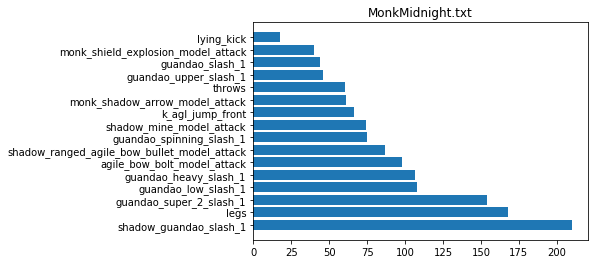

MonkMonk.txt


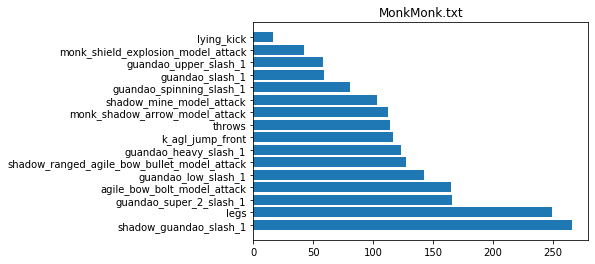

MonkMonkey_King.txt


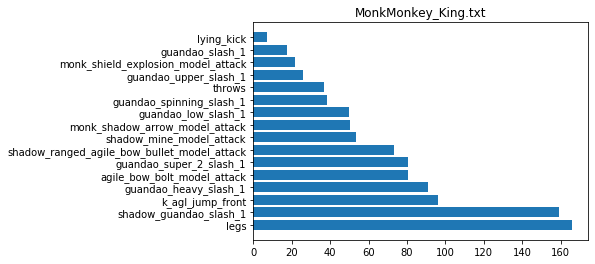

MonkSarge.txt


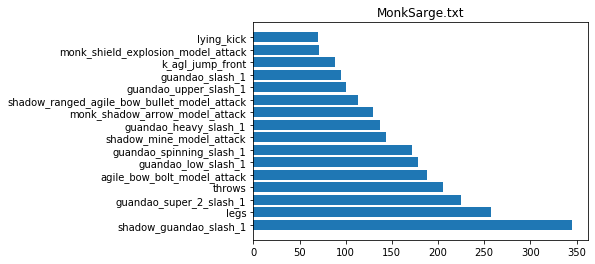

MonkYukka.txt


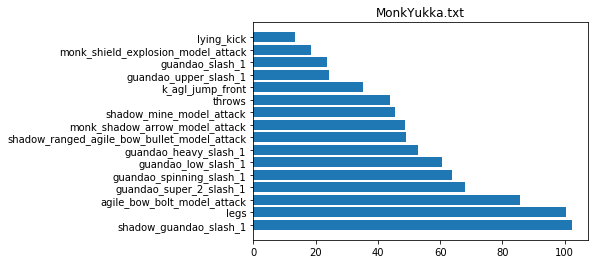

SargeBulwark.txt
SargeEmperor.txt
SargeFeldsher.txt
SargeFireguard.txt
SargeHelga.txt
SargeHongJoo.txt
SargeIronclad.txt
SargeJet.txt
SargeKibo.txt
SargeLing.txt
SargeLiquidator.txt
SargeLynx.txt
SargeMarcus.txt
SargeMidnight.txt
SargeMonk.txt
SargeMonkey_King.txt
SargeSarge.txt
SargeYukka.txt
YukkaBulwark.txt
YukkaEmperor.txt
YukkaFeldsher.txt
YukkaFireguard.txt
YukkaHelga.txt
YukkaHongJoo.txt
YukkaIronclad.txt
YukkaJet.txt
YukkaKibo.txt
YukkaLing.txt
YukkaLiquidator.txt
YukkaLynx.txt
YukkaMarcus.txt
YukkaMidnight.txt
YukkaMonk.txt
YukkaMonkey_King.txt
YukkaSarge.txt
YukkaYukka.txt
Monkey_King.txt


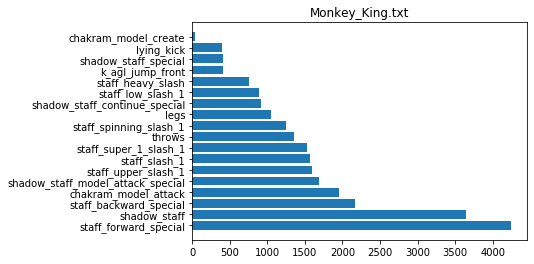

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

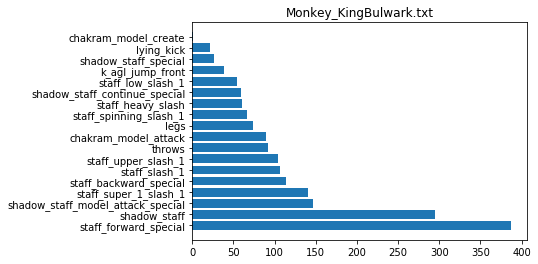

Monkey_KingEmperor.txt


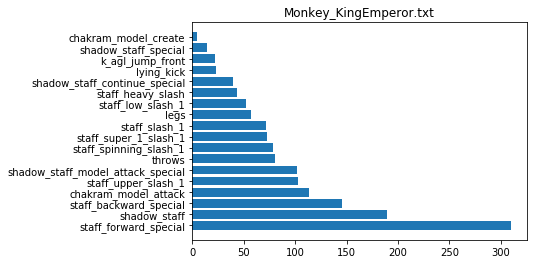

Monkey_KingFeldsher.txt


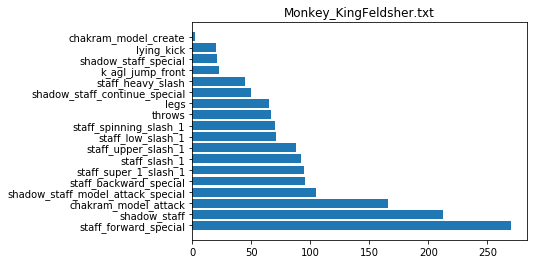

Monkey_KingFireguard.txt


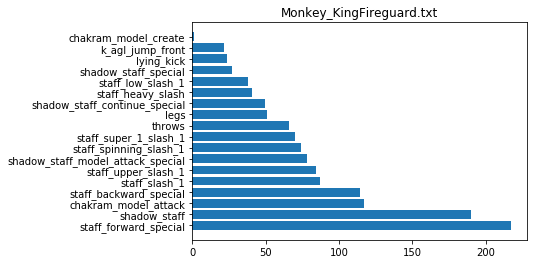

Monkey_KingHelga.txt


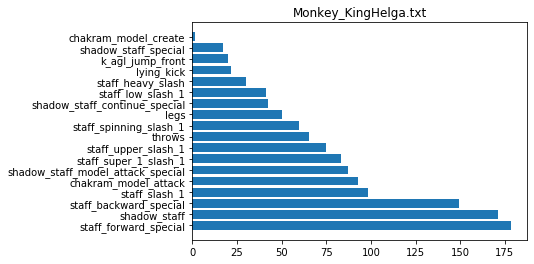

Monkey_KingHongJoo.txt


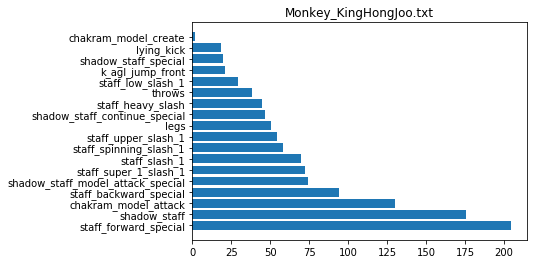

Monkey_KingIronclad.txt


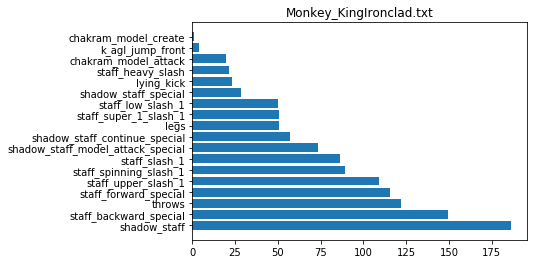

Monkey_KingJet.txt


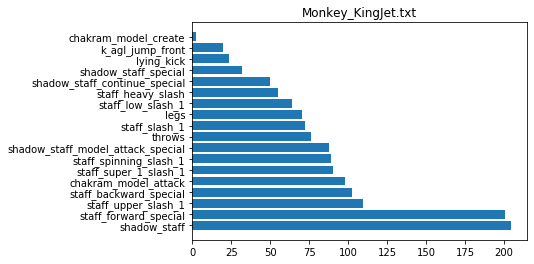

Monkey_KingKibo.txt


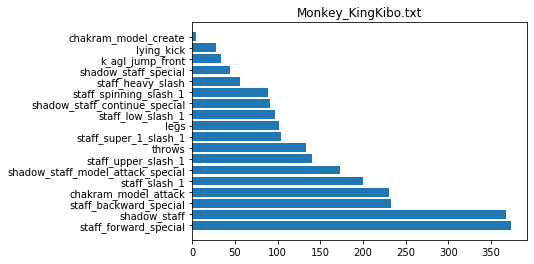

Monkey_KingLing.txt


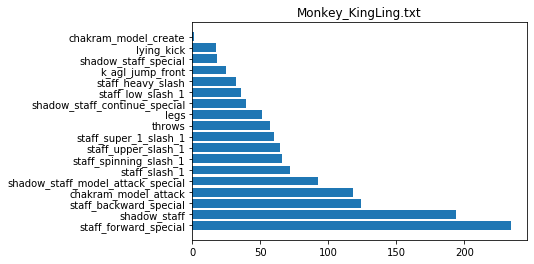

Monkey_KingLiquidator.txt


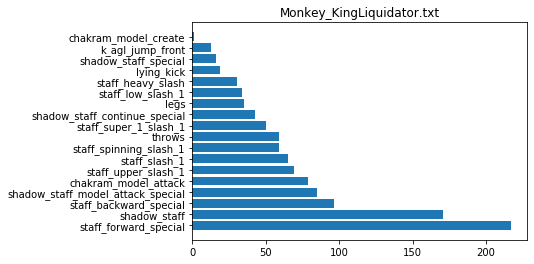

Monkey_KingLynx.txt


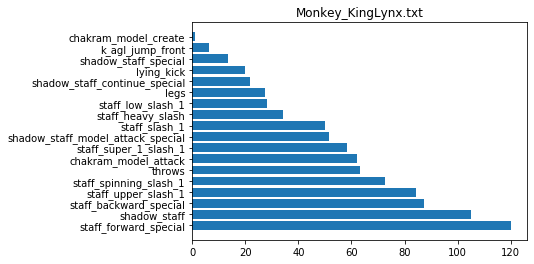

Monkey_KingMarcus.txt


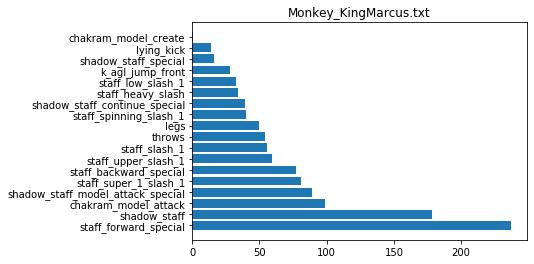

Monkey_KingMidnight.txt


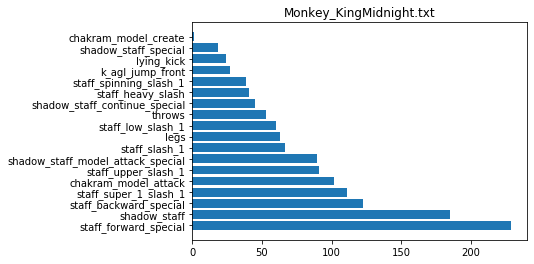

Monkey_KingMonk.txt


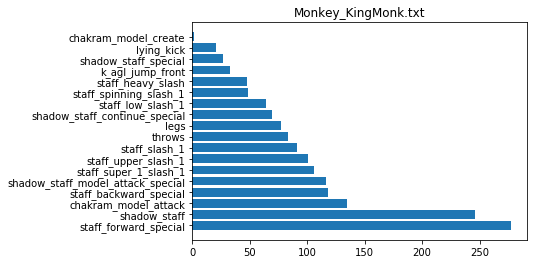

Monkey_KingMonkey_King.txt


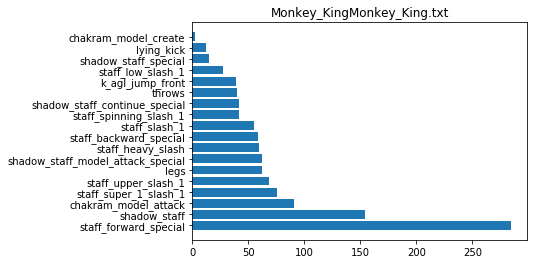

Monkey_KingSarge.txt


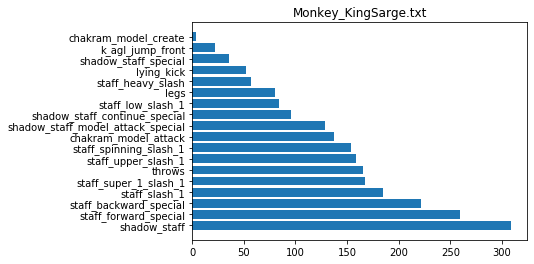

Monkey_KingYukka.txt


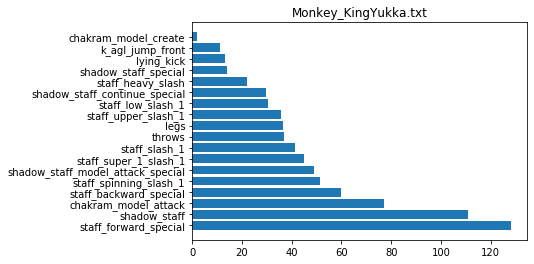

MonkFeldsher.txt
MonkFireguard.txt
MonkHelga.txt
MonkHongJoo.txt
MonkIronclad.txt
MonkJet.txt
MonkKibo.txt
MonkLing.txt
MonkLiquidator.txt
MonkLynx.txt
MonkMarcus.txt
MonkMidnight.txt
MonkMonk.txt
MonkMonkey_King.txt
MonkSarge.txt
MonkYukka.txt
SargeBulwark.txt
SargeEmperor.txt
SargeFeldsher.txt
SargeFireguard.txt
SargeHelga.txt
SargeHongJoo.txt
SargeIronclad.txt
SargeJet.txt
SargeKibo.txt
SargeLing.txt
SargeLiquidator.txt
SargeLynx.txt
SargeMarcus.txt
SargeMidnight.txt
SargeMonk.txt
SargeMonkey_King.txt
SargeSarge.txt
SargeYukka.txt
YukkaBulwark.txt
YukkaEmperor.txt
YukkaFeldsher.txt
YukkaFireguard.txt
YukkaHelga.txt
YukkaHongJoo.txt
YukkaIronclad.txt
YukkaJet.txt
YukkaKibo.txt
YukkaLing.txt
YukkaLiquidator.txt
YukkaLynx.txt
YukkaMarcus.txt
YukkaMidnight.txt
YukkaMonk.txt
YukkaMonkey_King.txt
YukkaSarge.txt
YukkaYukka.txt
Sarge.txt


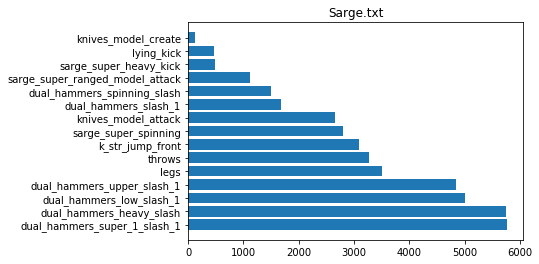

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

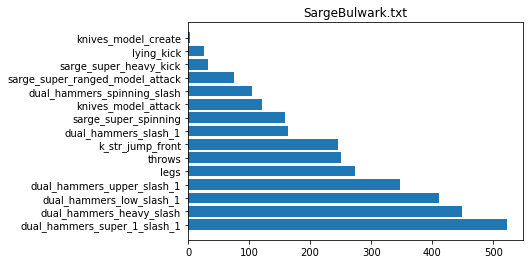

SargeEmperor.txt


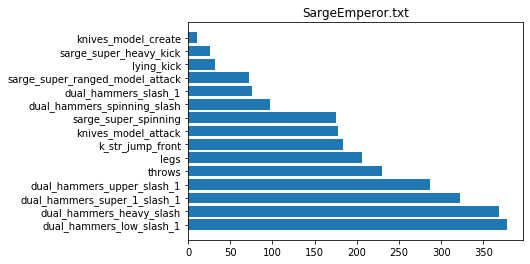

SargeFeldsher.txt


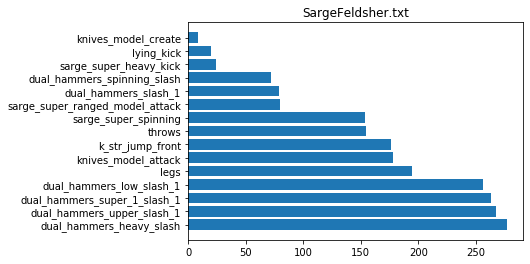

SargeFireguard.txt


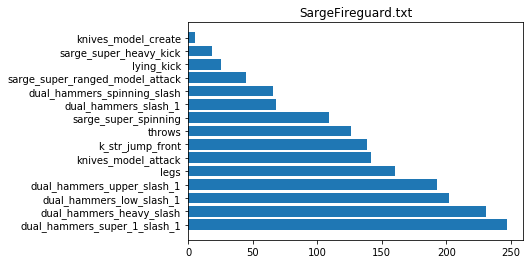

SargeHelga.txt


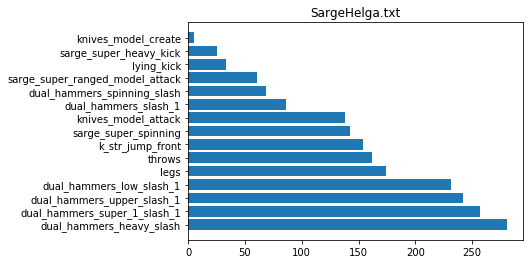

SargeHongJoo.txt


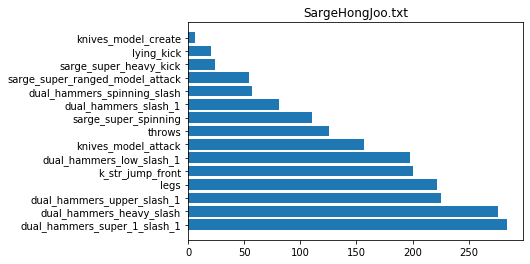

SargeIronclad.txt


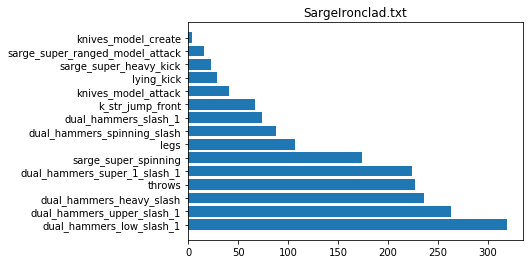

SargeJet.txt


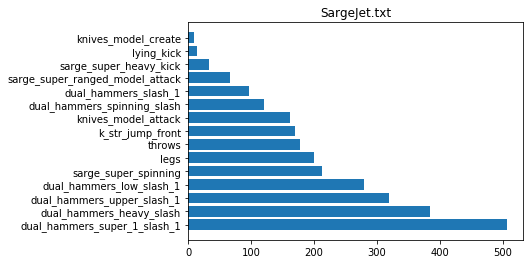

SargeKibo.txt


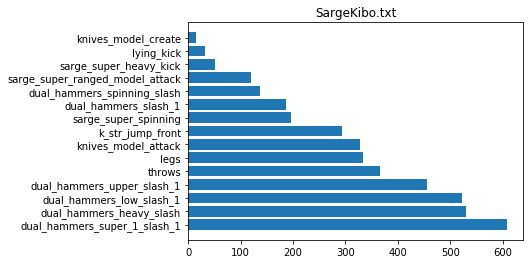

SargeLing.txt


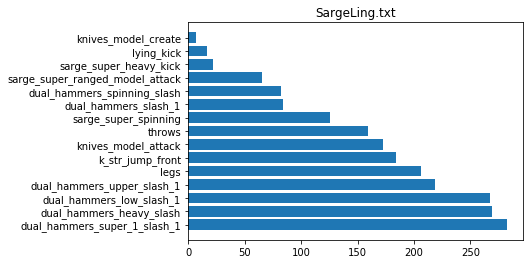

SargeLiquidator.txt


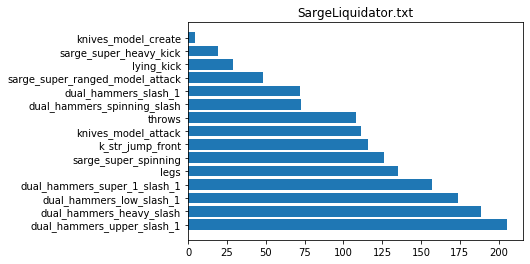

SargeLynx.txt


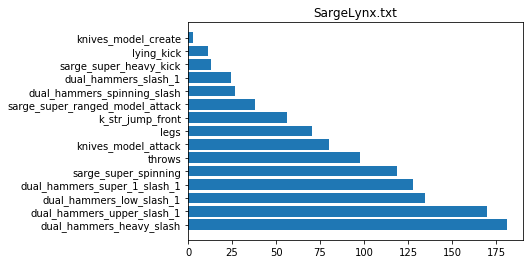

SargeMarcus.txt


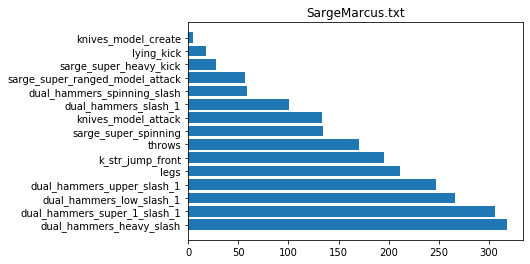

SargeMidnight.txt


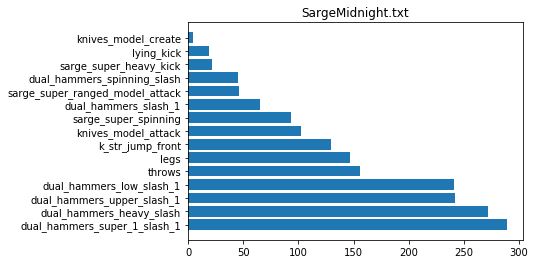

SargeMonk.txt


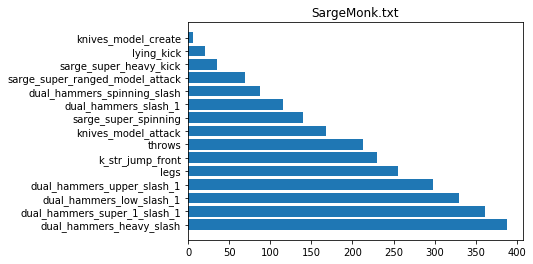

SargeMonkey_King.txt


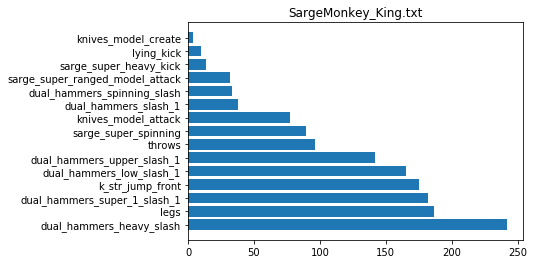

SargeSarge.txt


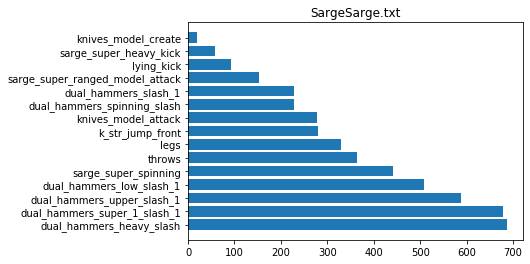

SargeYukka.txt


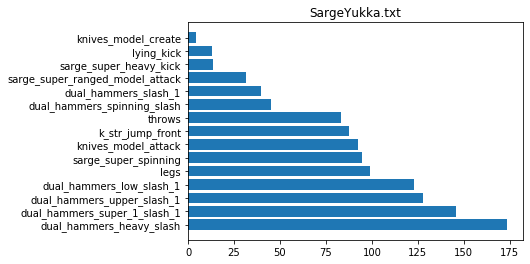

YukkaBulwark.txt
YukkaEmperor.txt
YukkaFeldsher.txt
YukkaFireguard.txt
YukkaHelga.txt
YukkaHongJoo.txt
YukkaIronclad.txt
YukkaJet.txt
YukkaKibo.txt
YukkaLing.txt
YukkaLiquidator.txt
YukkaLynx.txt
YukkaMarcus.txt
YukkaMidnight.txt
YukkaMonk.txt
YukkaMonkey_King.txt
YukkaSarge.txt
YukkaYukka.txt
Yukka.txt


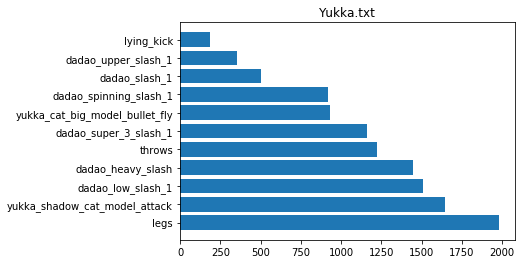

BulwarkBulwark.txt
BulwarkEmperor.txt
BulwarkFeldsher.txt
BulwarkFireguard.txt
BulwarkHelga.txt
BulwarkHongJoo.txt
BulwarkIronclad.txt
BulwarkJet.txt
BulwarkKibo.txt
BulwarkLing.txt
BulwarkLiquidator.txt
BulwarkLynx.txt
BulwarkMarcus.txt
BulwarkMidnight.txt
BulwarkMonk.txt
BulwarkMonkey_King.txt
BulwarkSarge.txt
BulwarkYukka.txt
EmperorBulwark.txt
EmperorEmperor.txt
EmperorFeldsher.txt
EmperorFireguard.txt
EmperorHelga.txt
EmperorHongJoo.txt
EmperorIronclad.txt
EmperorJet.txt
EmperorKibo.txt
EmperorLing.txt
EmperorLiquidator.txt
EmperorLynx.txt
EmperorMarcus.txt
EmperorMidnight.txt
EmperorMonk.txt
EmperorMonkey_King.txt
EmperorSarge.txt
EmperorYukka.txt
FeldsherBulwark.txt
FeldsherEmperor.txt
FeldsherFeldsher.txt
FeldsherFireguard.txt
FeldsherHelga.txt
FeldsherHongJoo.txt
FeldsherIronclad.txt
FeldsherJet.txt
FeldsherKibo.txt
FeldsherLing.txt
FeldsherLiquidator.txt
FeldsherLynx.txt
FeldsherMarcus.txt
FeldsherMidnight.txt
FeldsherMonk.txt
FeldsherMonkey_King.txt
FeldsherSarge.txt
Feldshe

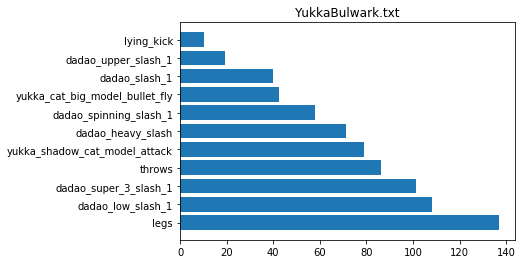

YukkaEmperor.txt


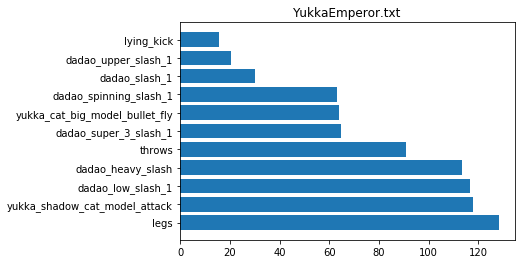

YukkaFeldsher.txt


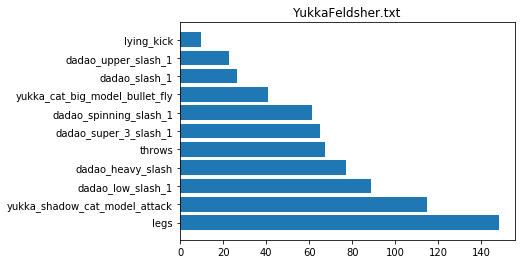

YukkaFireguard.txt


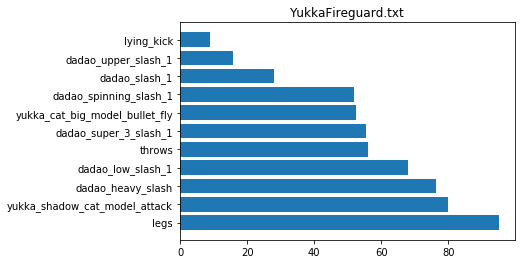

YukkaHelga.txt


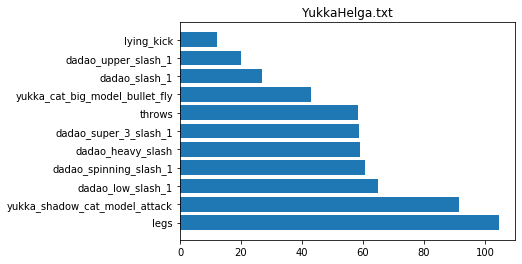

YukkaHongJoo.txt


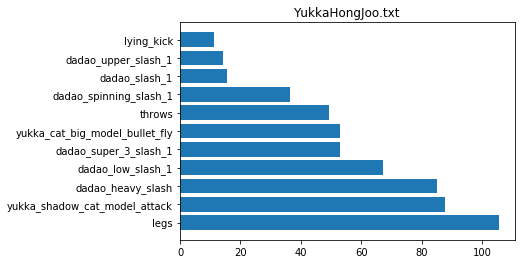

YukkaIronclad.txt


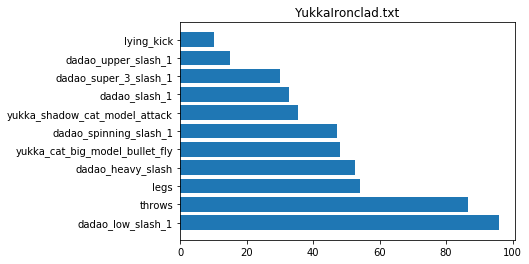

YukkaJet.txt


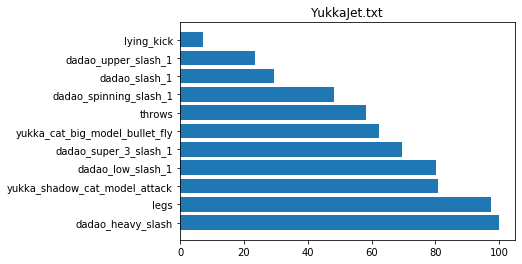

YukkaKibo.txt


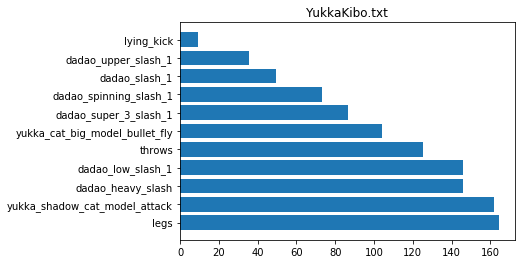

YukkaLing.txt


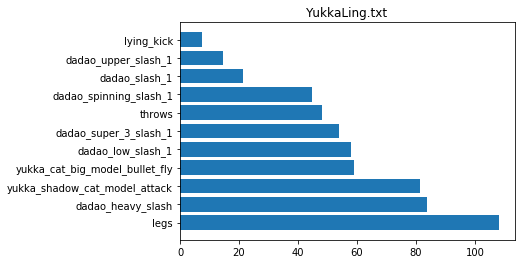

YukkaLiquidator.txt


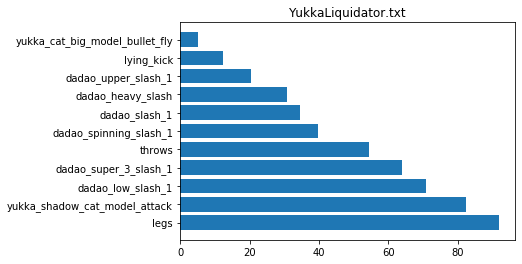

YukkaLynx.txt


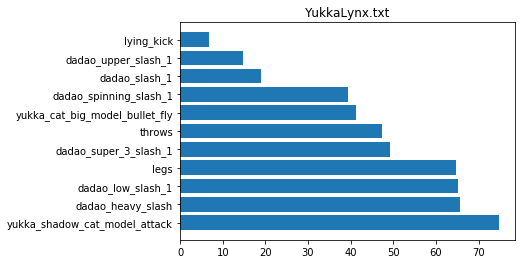

YukkaMarcus.txt


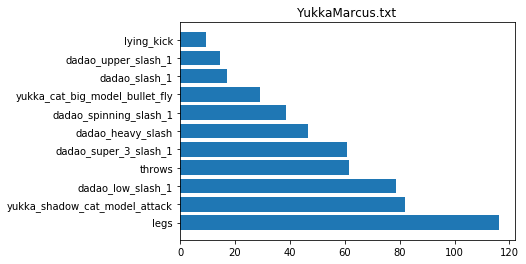

YukkaMidnight.txt


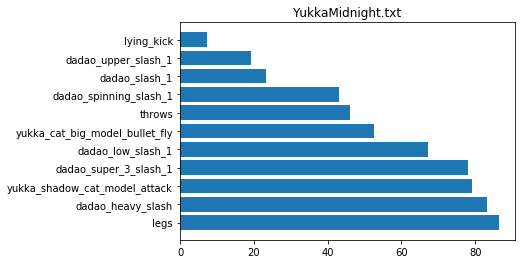

YukkaMonk.txt


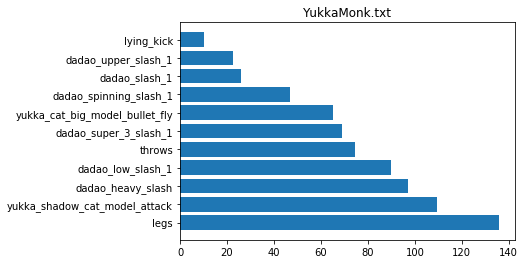

YukkaMonkey_King.txt


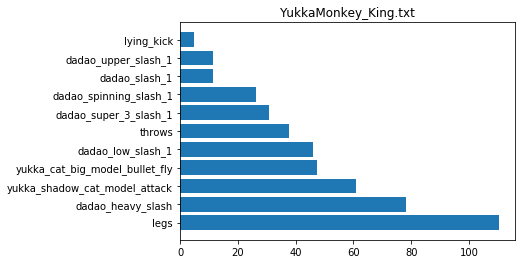

YukkaSarge.txt


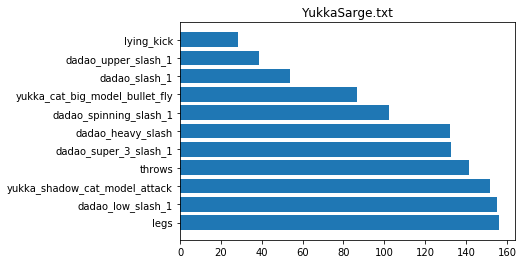

YukkaYukka.txt


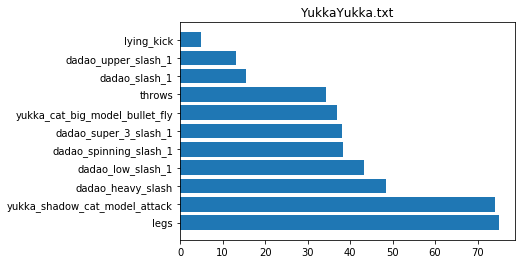

In [44]:
onlyfilesMain = [f for f in listdir("actionsDmg/byHero/above3000") if isfile(join("actionsDmg/byHero/above3000", f))]
onlyfilesOther = [f for f in listdir("actionsDmg/byMatchup/above3000") if isfile(join("actionsDmg/byMatchup/above3000", f))]

p = EhShasBiPoprogat()

writer = pd.ExcelWriter('Dmg_plots.xlsx', engine = 'xlsxwriter')
dfempty = pd.DataFrame([['','']],columns=['',''])

padding = 4

for f,i in zip(onlyfilesMain, range(len(onlyfilesMain))):
    print(f)
    dfempty.to_excel(writer, sheet_name = f)
    worksheet = writer.sheets[f]
    p.operate_file(f, padding, worksheet, True)
    j = 0
    for ff,ii in zip(onlyfilesOther, range(len(onlyfilesOther))):
        print(ff)
        if ff.startswith(f[:-4]):
            j = j + 1
            p.operate_file(ff, padding + 1 + j*20, worksheet, False)
        
writer.save()
writer.close()

In [ ]:
fig, ax = plt.subplots()
ax.pie(df["amount"][:10], labels=df["source"][:10])
ax.axis("equal")

In [18]:
text_file = open("SameAttacks.txt", "r", encoding='utf-8')
        
data = text_file.read()
data = StringIO(data)

df_same = pd.read_csv(data, sep=" ")
df_same = df_same.apply(lambda x: x.str.lower())

In [41]:
file = "actionsDmg/byHero/above3000" + "/" + "Fireguard.txt"

fp = open(file, encoding='utf-8')

data = fp.read()
data = StringIO(data)

dftmp = pd.read_csv(data, sep=" ")
dfb = dftmp.loc["[B]"].reset_index(inplace=True, drop=True)
dfbs = dftmp.loc["[BS]"].reset_index(inplace=True, drop=True)
dfs = dftmp.loc["[S]"].reset_index(inplace=True, drop=True)
df = dftmp.loc[dftmp.index.difference(["[B]", "[BS]", "[S]"])]
df['amount'] = df['source']
df['source'] = df.index
df.reset_index(inplace=True, drop=True)
df = df[~df["amount"].str.startswith("animation]")]
df = df.astype({"amount": float})
print(df)

                                               source   amount
0                               dual_kama_heavy_slash  1137.31
1                                 dual_kama_low_slash  1495.26
2                                   dual_kama_slash_1   844.10
3                                   dual_kama_slash_2   445.53
4                            dual_kama_spinning_slash   898.45
5                            dual_kama_super_1_active   504.31
6                           dual_kama_super_1_slash_1   718.31
7                           dual_kama_super_1_slash_2   705.82
8                               dual_kama_upper_slash   629.22
9                       fireguard_burning_zone_attack     0.00
10                   fireguard_explosion_model_attack  4250.93
11                  fireguard_flame_spit_model_attack   753.54
12                        fireguard_shadow_fly_attack  1414.85
13                          fireguard_shadow_fly_miss   792.06
14                   fireguard_shadow_fly_miss_mirror  

In [42]:
dfbuf = df
for index, row in df.iterrows():  
    add = 0
    tmp = df_same[df_same['AddName'].str.fullmatch(row['source'])]["MainName"]
    if not tmp.empty:
        add = dfbuf[dfbuf["source"].str.fullmatch(row['source'])].amount.values[0]
        dfbuf.loc[df.source == tmp.astype("string").values[0], 'amount'] += add
    if not row['source'] in df_same.values:
        dfbuf.at[index, 'amount'] = df.groupby(df["source"].str.startswith(row['source'][:-1]))["amount"].sum()[True]
dfbuf

source   amount
0                               dual_kama_heavy_slash  1137.31
1                                 dual_kama_low_slash  1495.26
2                                   dual_kama_slash_1  1289.63
3                                   dual_kama_slash_2  1735.16
4                            dual_kama_spinning_slash   898.45
5                            dual_kama_super_1_active   504.31
6                           dual_kama_super_1_slash_1  1222.62
7                           dual_kama_super_1_slash_2  1928.44
8                               dual_kama_upper_slash   629.22
9                       fireguard_burning_zone_attack     0.00
10                   fireguard_explosion_model_attack  4250.93
11                  fireguard_flame_spit_model_attack   753.54
12                        fireguard_shadow_fly_attack  1414.85
13                          fireguard_shadow_fly_miss  2767.94
14                   fireguard_shadow_fly_miss_mirror   561.03
15                                   k_prc_front_kick   103.56
16                                   k_prc_jump_front  2186.98
17                             k_prc_jump_front_heavy  1838.30
18                                      k_prc_jump_up    35.26
19                                       k_prc_kick_1   411.19
20                                       k_prc_kick_2   611.93
21                                          k_prc_low   219.55
22                                k_prc_spinning_kick   150.59
23         kibo_last_life_explosion_self_model_attack     0.00
24                               lying_kick_face_back    53.54
25                              lying_kick_face_front   150.40
26                              lying_kick_spine_back    89.27
27                             lying_kick_spine_front    55.07
28                shadow_dual_kama_slash_1_active_end  2076.43
29              shadow_dual_kama_slash_1_model_attack   566.66
30  shadow_ranged_precise_folding_shuriken_model_a...   368.75
31  shadow_ranged_precise_folding_shuriken_model_a...   642.14
32                           shadow_thud_model_attack   592.74
33                     shadow_thud_small_model_attack   503.21
34                               throw_forward_active  1549.15
35                                       throw_simple   481.51

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pandas

Requirement already up-to-date: pandas in c:\users\rubal\anaconda3\lib\site-packages (1.3.2)


In [ ]:
import sys
!{sys.executable} -m pip install --upgrade xlwings